<a href="https://colab.research.google.com/github/aayush1324/Scaler_DSML2022/blob/main/Loan_tapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import binom , norm , poisson , expon ,geom

In [ ]:
from scipy.stats import ttest_ind , ttest_rel , f_oneway , kruskal
from scipy.stats import norm , chi2 , f
from scipy.stats import chi2_contingency , chisquare
from scipy.stats import pearsonr , spearmanr
from scipy.stats import kstest

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
! wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921" -O loantap.csv

--2023-02-19 17:49:53--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100353395 (96M) [text/plain]
Saving to: ‘loantap.csv’

loantap.csv         100%[===================>]  95.70M  60.2MB/s    in 1.6s    

2023-02-19 17:49:54 (60.2 MB/s) - ‘loantap.csv’ saved [100353395/100353395]



In [ ]:
df = pd.read_csv("loantap.csv")

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df1 =df.copy()

# **Observations**

In [ ]:
df.shape

(396030, 27)

In [ ]:
len(df)

396030

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include = "object")

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [ ]:
df.describe(include = "all")

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

# **Category Columns**

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [ ]:
for cat in cat_col:
  print(cat)
  print(df[cat].nunique())
  print("")

term
2

grade
7

sub_grade
35

emp_title
173105

emp_length
11

home_ownership
6

verification_status
3

issue_d
115

loan_status
2

purpose
14

title
48817

earliest_cr_line
684

initial_list_status
2

application_type
3

address
393700



In [ ]:
for cat in (cat_col):
  print(df[cat].value_counts())
  print("")
  print("")

 36 months    302005
 60 months     94025
Name: term, dtype: int64


B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64


B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64


Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title

# **Numerical Columns**

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
for num in num_col:
  print(num)
  print(df[num].nunique())
  print("")

loan_amnt
1397

int_rate
566

installment
55706

annual_inc
27197

dti
4262

open_acc
61

pub_rec
20

revol_bal
55622

revol_util
1226

total_acc
118

mort_acc
33

pub_rec_bankruptcies
9



In [ ]:
for num in (num_col):
  print(df[num].value_counts())
  print("")
  print("")

10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: loan_amnt, Length: 1397, dtype: int64


10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: int_rate, Length: 566, dtype: int64


327.34     968
332.10     791
491.01     736
336.90     686
392.81     683
          ... 
364.37       1
1015.29      1
398.04       1
544.94       1
572.44       1
Name: installment, Length: 55706, dtype: int64


60000.00    15313
50000.00    13303
65000.00    11333
70000.00    10674
40000.00    10629
            ...  
72179.00        1
50416.00        1
46820.80        1
10368.00        1
31789.88        1
Name: annual_inc, Length: 27197, dtype: int64


0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37  

# **Drop Columns**

In [ ]:
df = df.drop(["title" , "emp_title" , "address"] , axis = 1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


# **Univariate**

In [ ]:
x = df.columns
x

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [ ]:
c = len(cat_col)
c

12

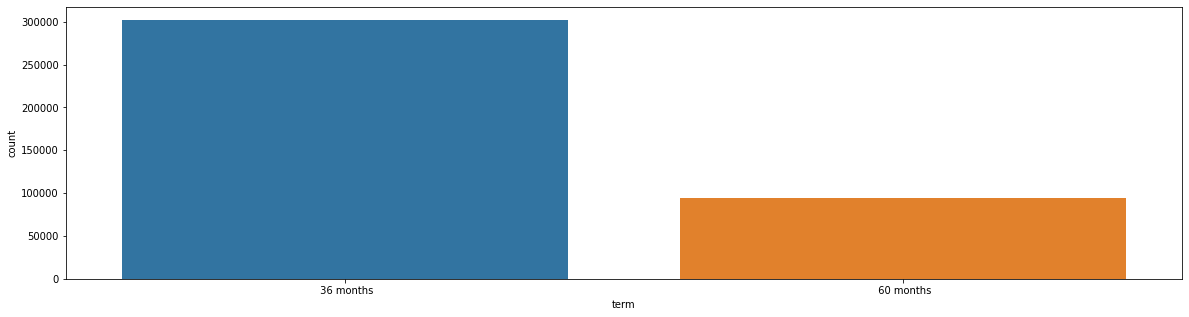


**************************************************



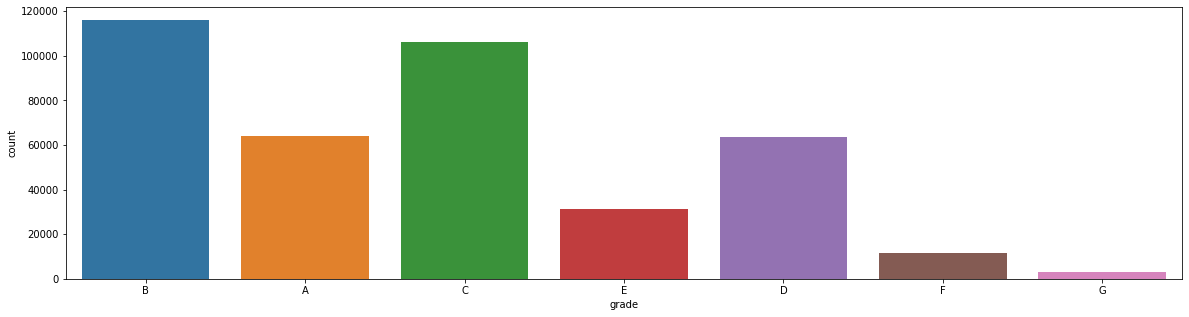


**************************************************



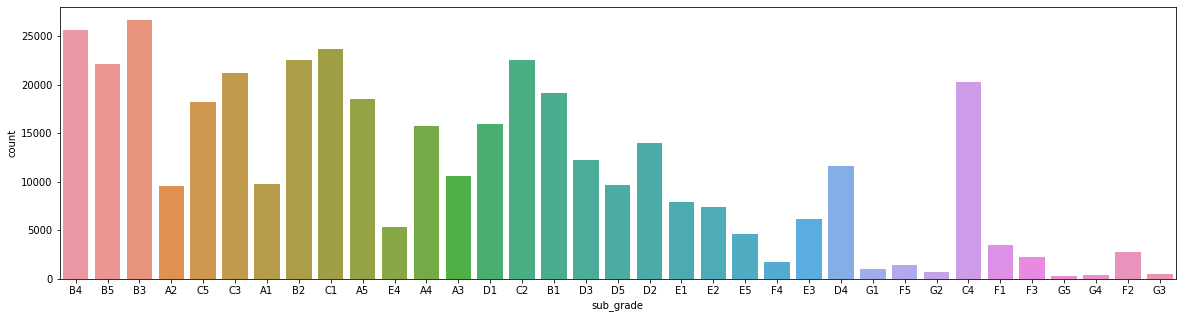


**************************************************



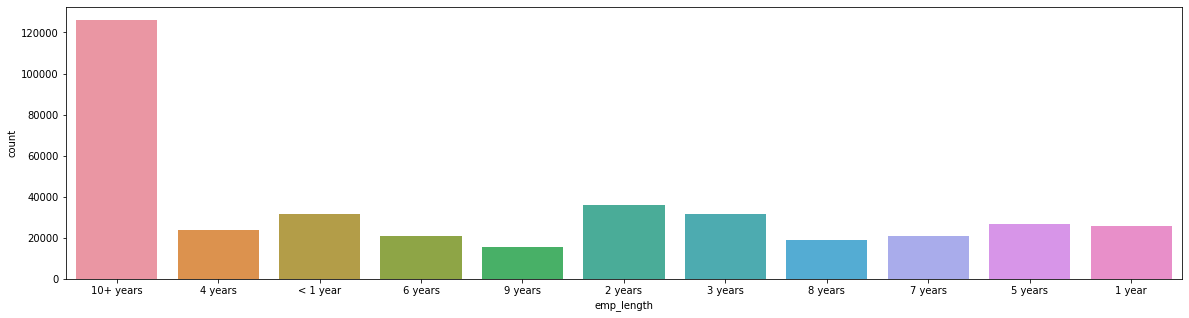


**************************************************



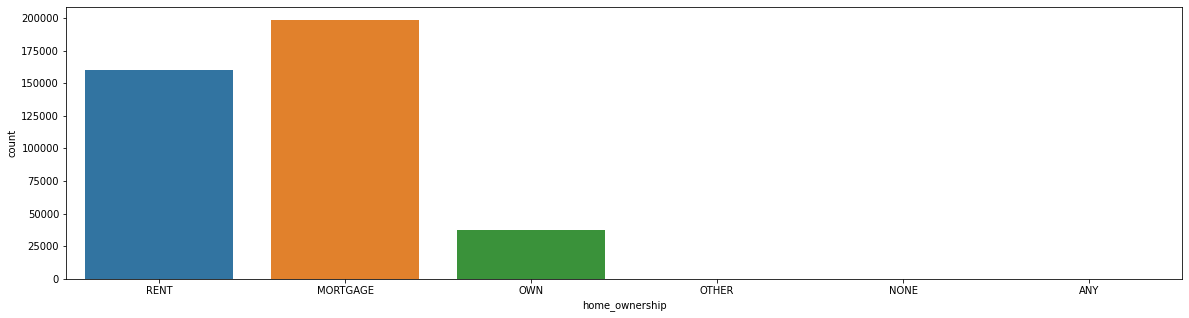


**************************************************



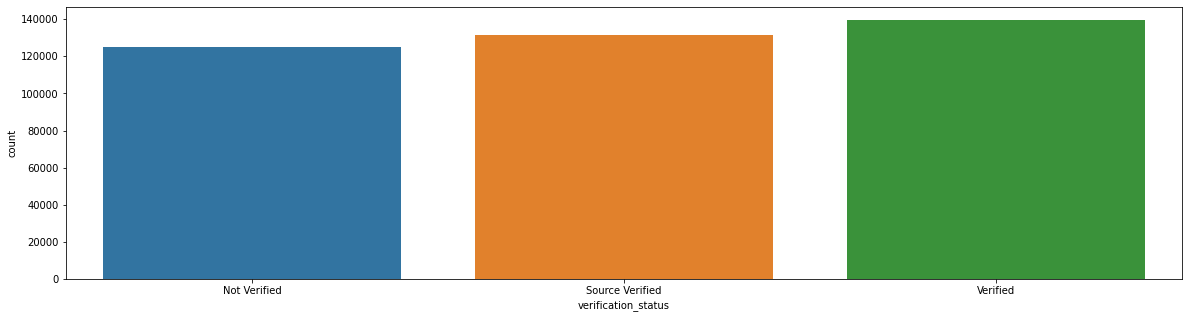


**************************************************



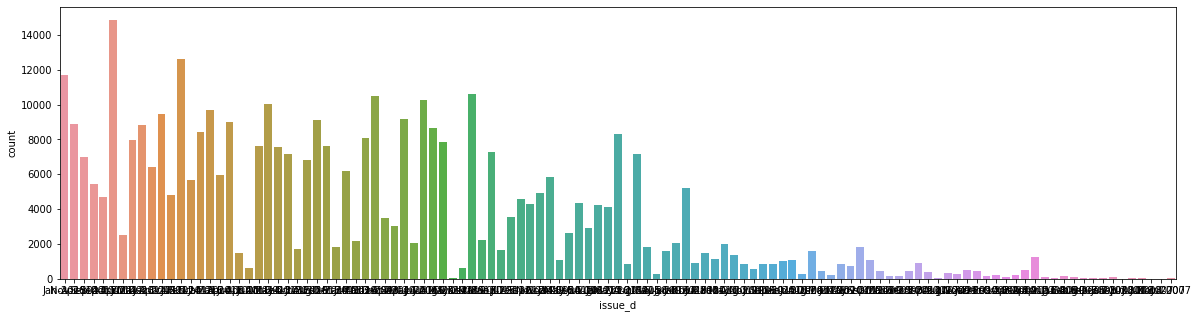


**************************************************



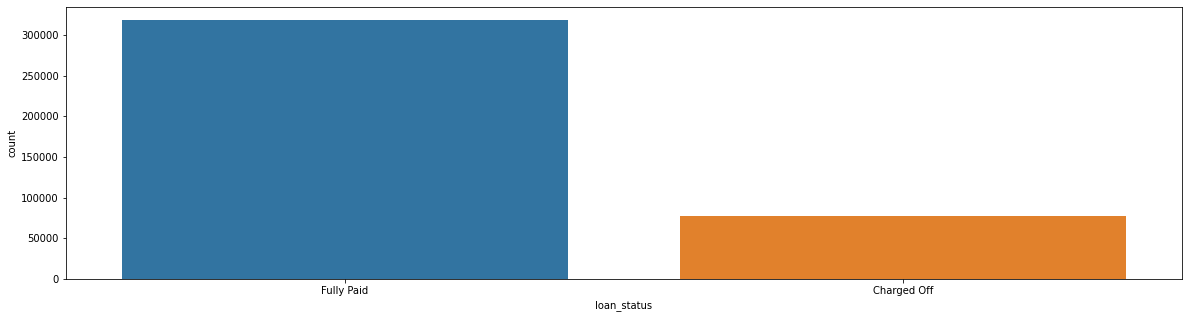


**************************************************



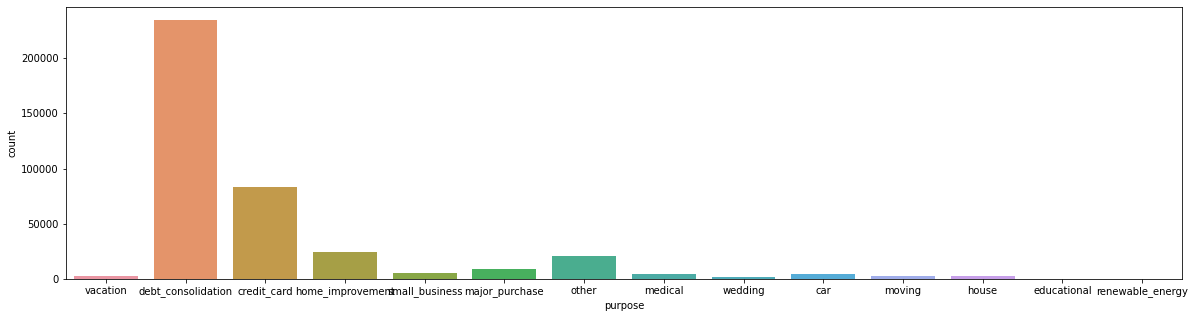


**************************************************



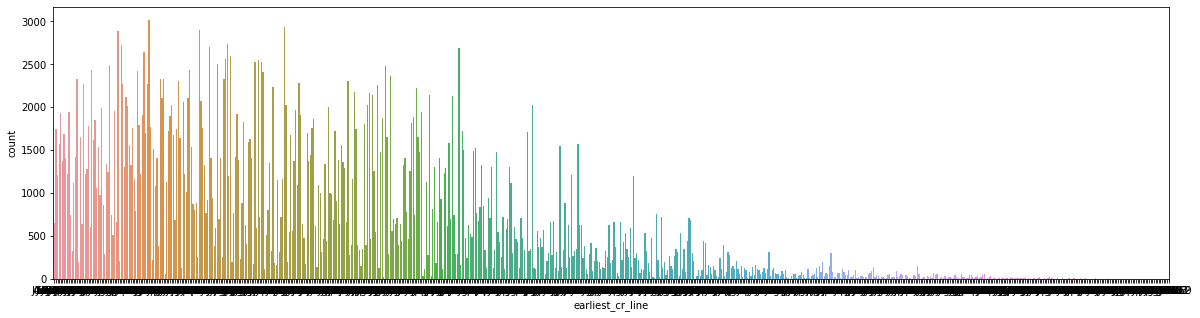


**************************************************



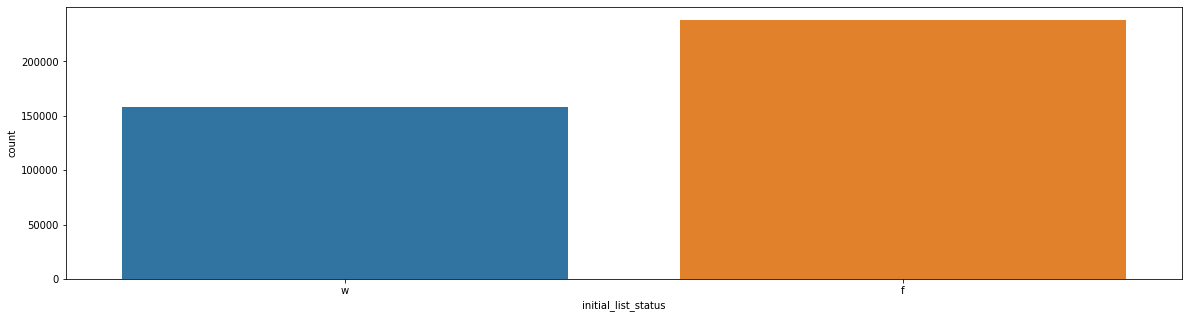


**************************************************



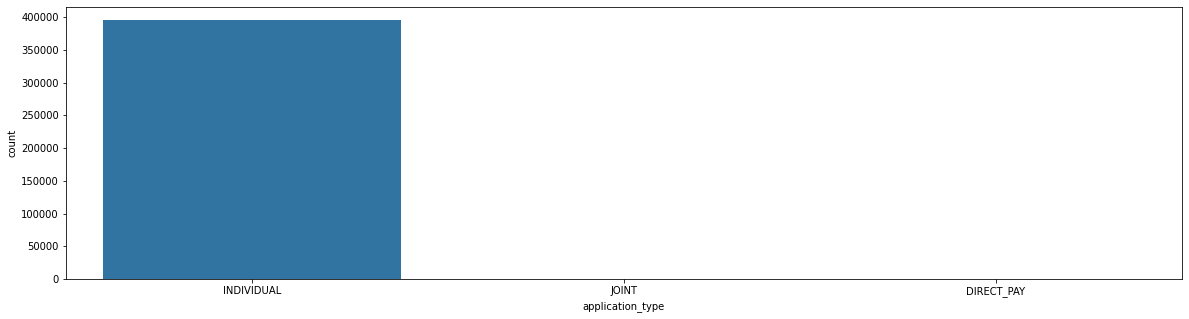


**************************************************



In [ ]:
for i in range (c):

  plt.figure(figsize = (20,5))
  sns.countplot(x=df[cat_col[i]] , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
n = len(num_col)
n

12

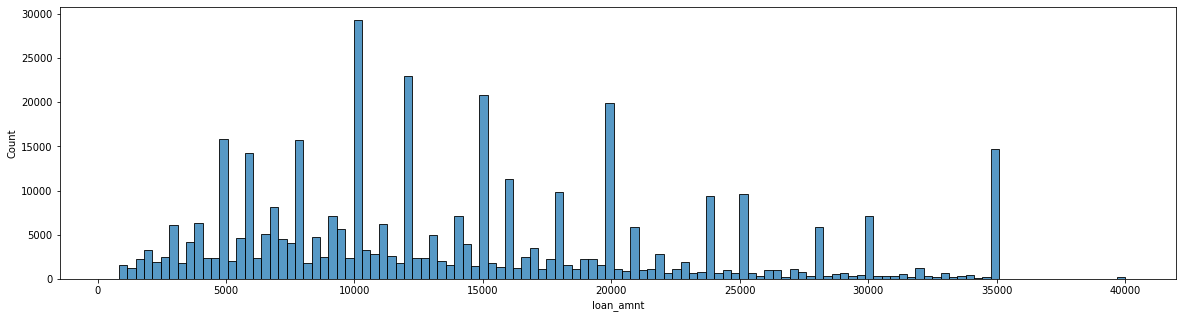


**************************************************



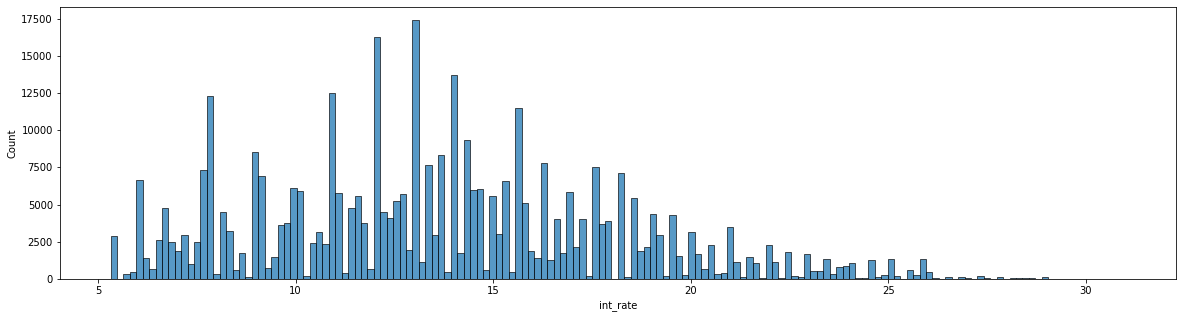


**************************************************



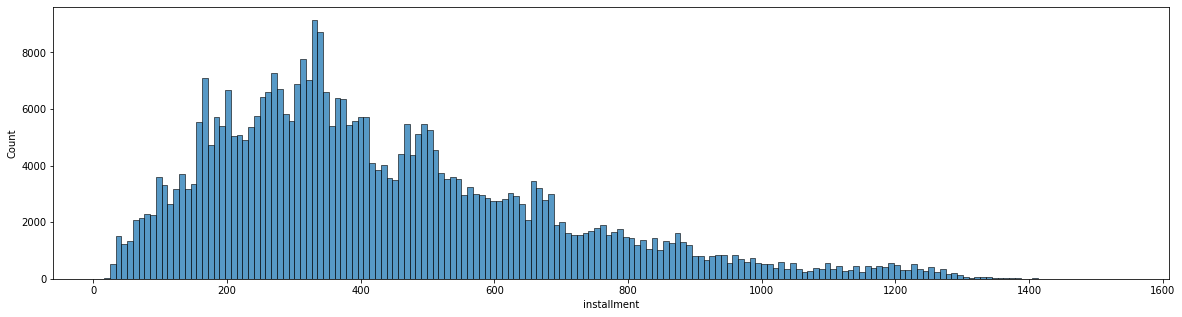


**************************************************



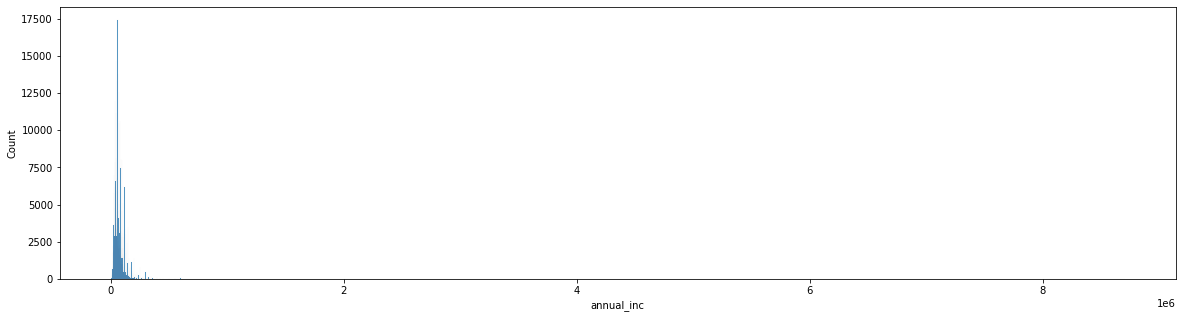


**************************************************



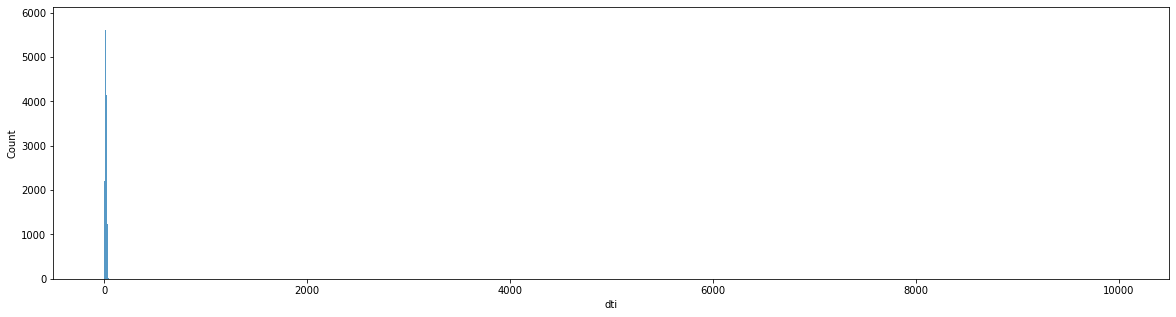


**************************************************



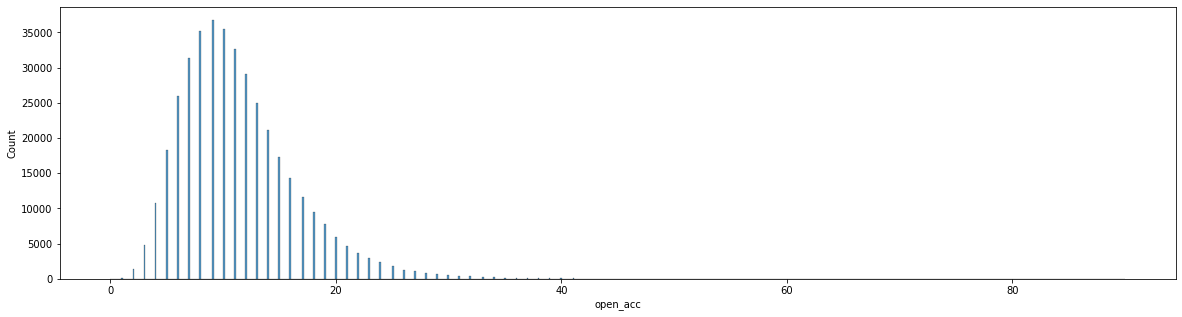


**************************************************



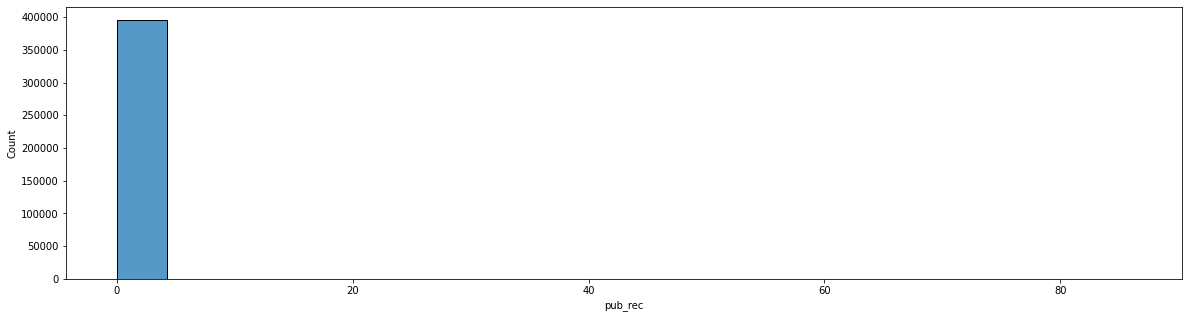


**************************************************



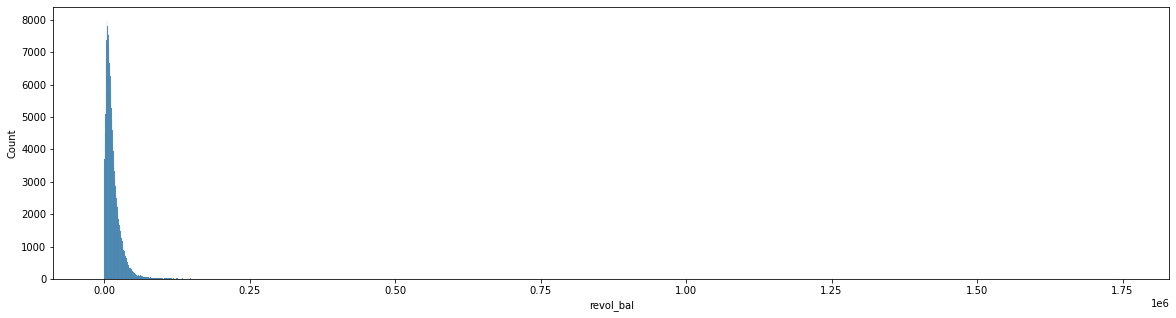


**************************************************



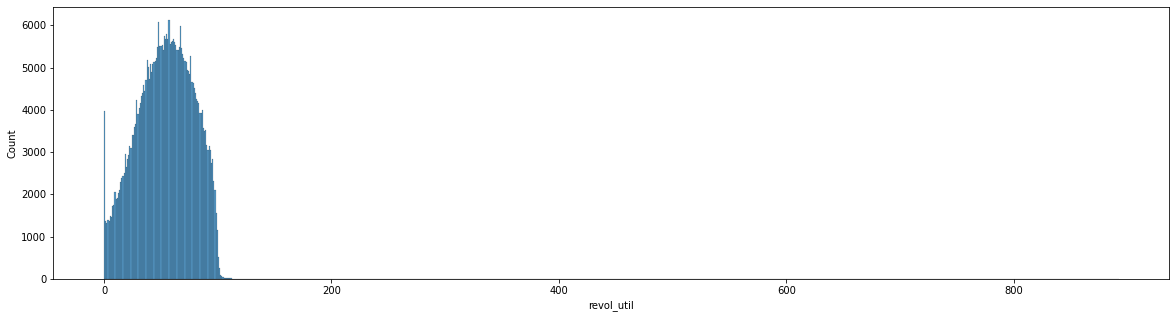


**************************************************



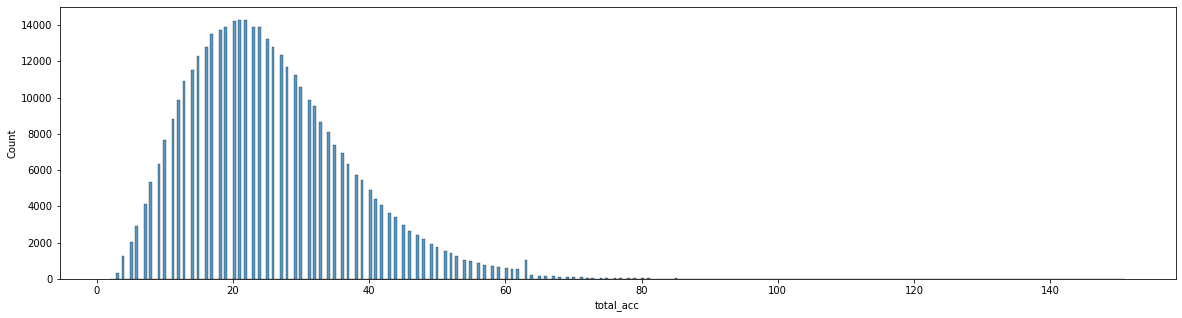


**************************************************



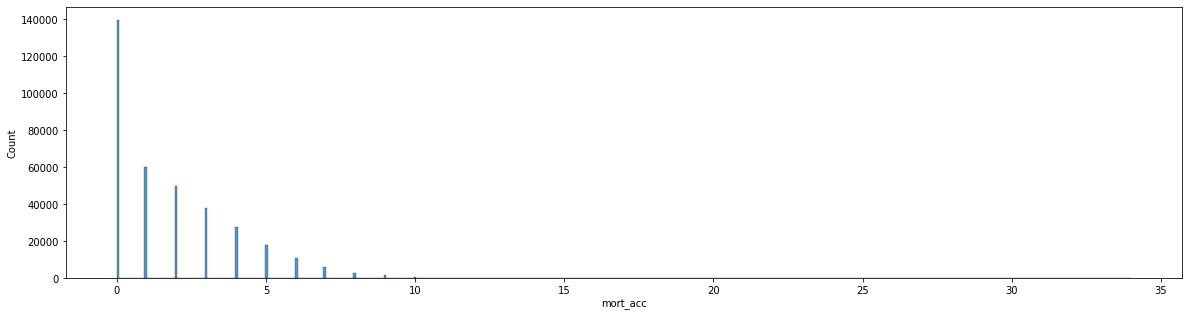


**************************************************



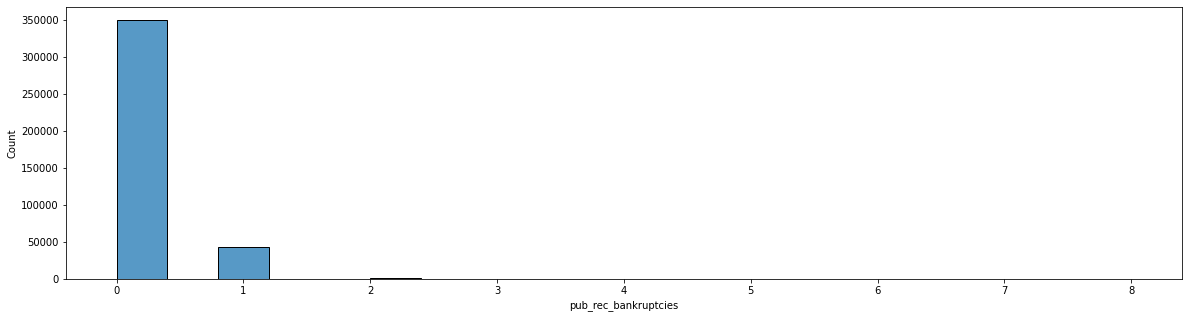


**************************************************



In [ ]:
for i in range (n):

  plt.figure(figsize = (20,5))
  sns.histplot(x=df[num_col[i]] , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

# **Bivariate**

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
for num in num_col:
  print(num)
  print(df[num].nunique())
  print("")

loan_amnt
1397

int_rate
566

installment
55706

annual_inc
27197

dti
4262

open_acc
61

pub_rec
20

revol_bal
55622

revol_util
1226

total_acc
118

mort_acc
33

pub_rec_bankruptcies
9



In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)

cat_cols = []

for cat in cat_col:
  if (df[cat].nunique() <= 15):
    cat_cols.append(cat)

for cats in cat_cols:
  print(cats)
  print(df[cats].nunique())
  print("")


  

term
2

grade
7

emp_length
11

home_ownership
6

verification_status
3

loan_status
2

purpose
14

initial_list_status
2

application_type
3



In [ ]:
c = len(cat_cols)
c

9

In [ ]:
n = len(num_col)
n

12

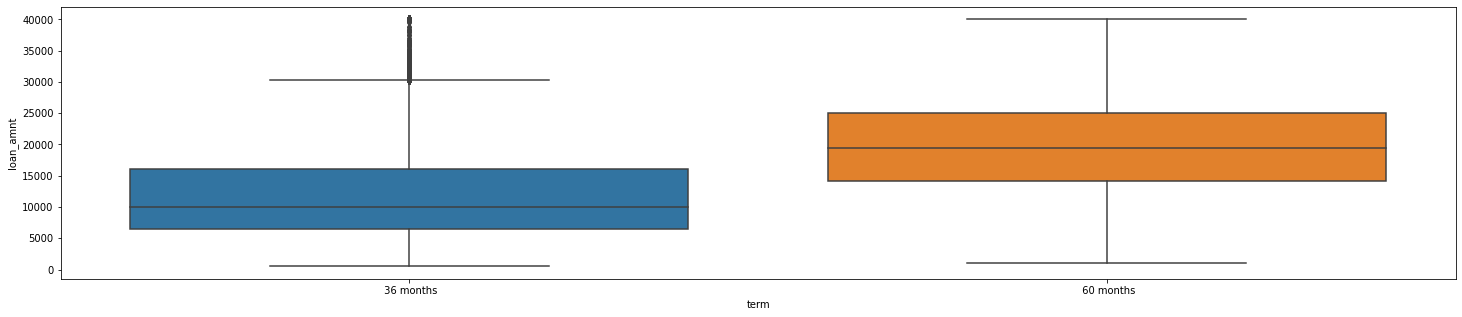

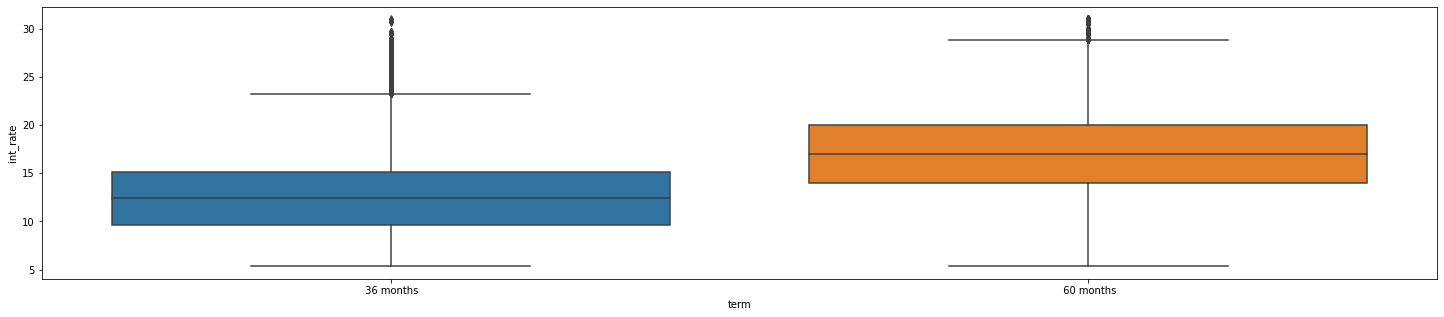

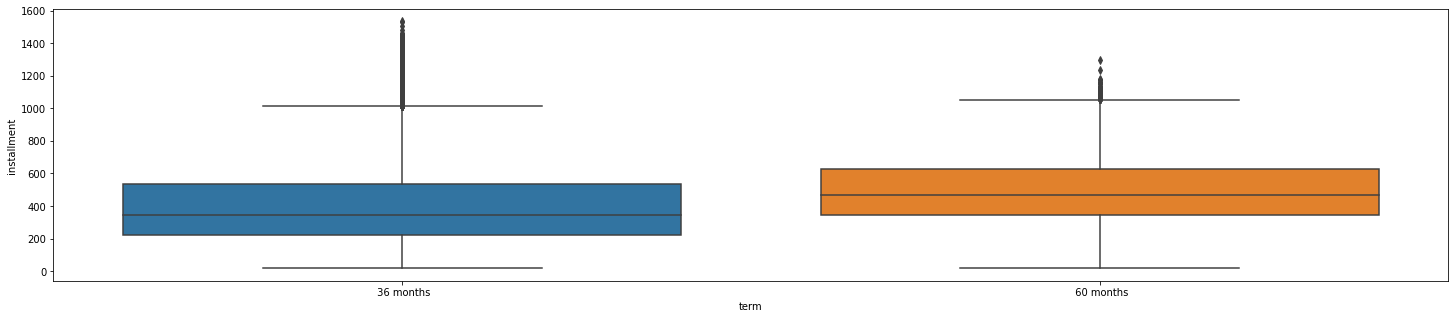

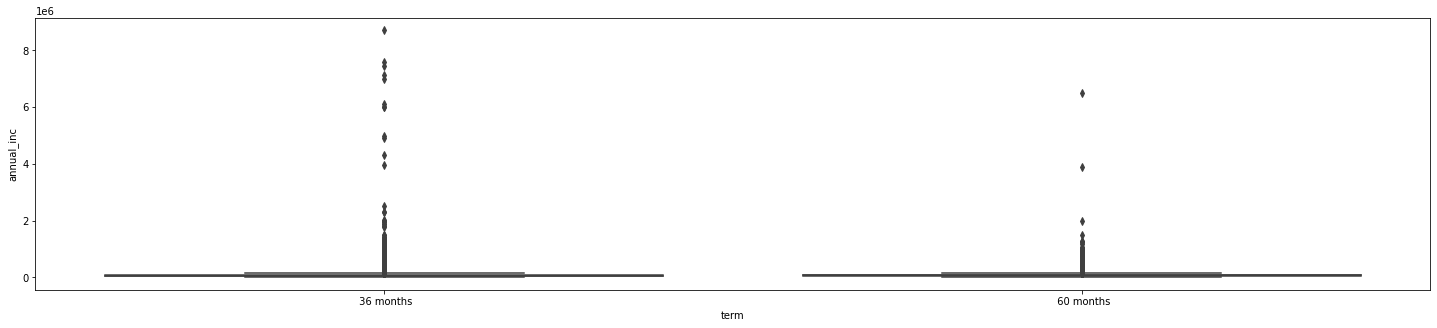

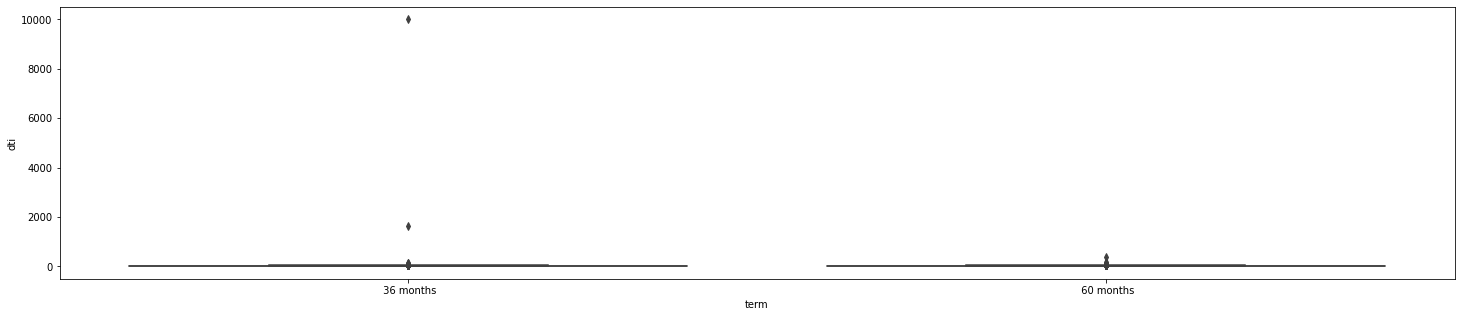

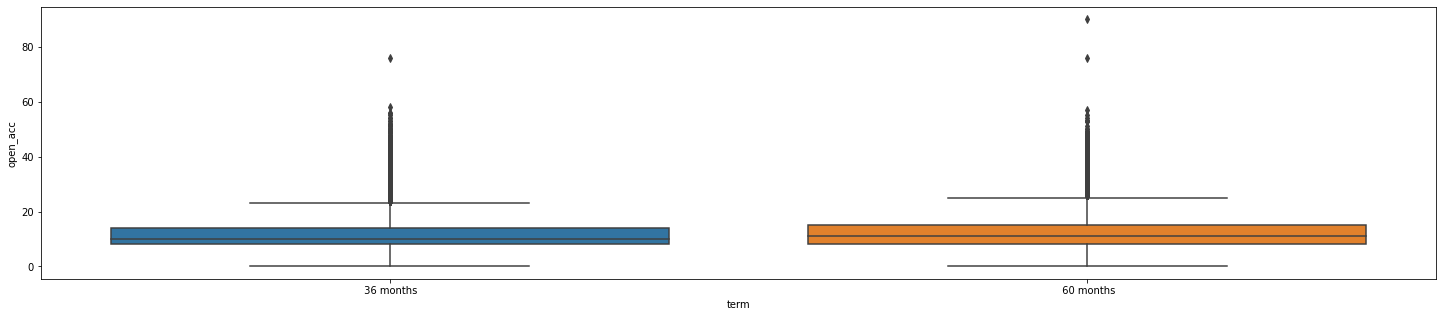

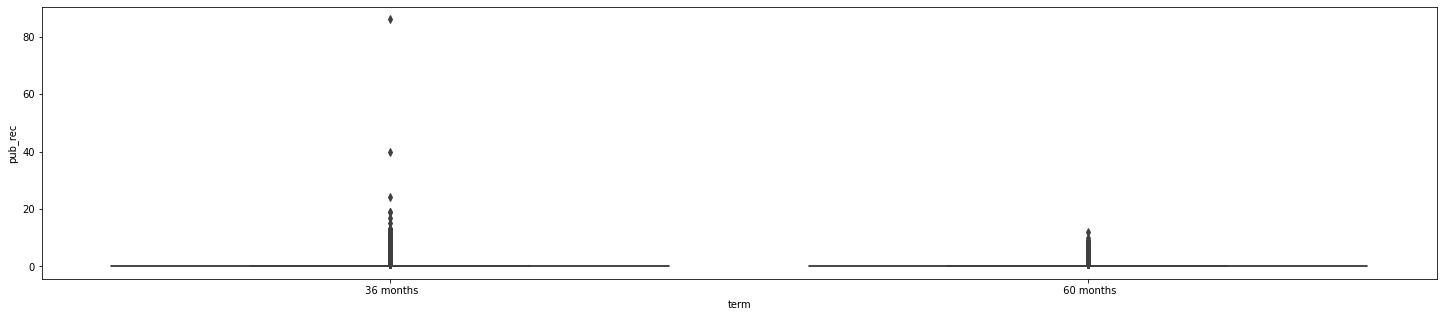

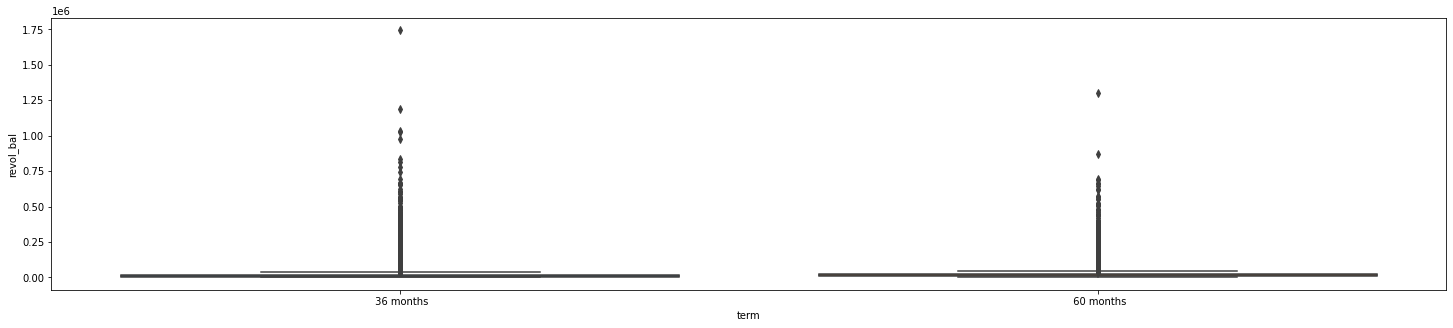

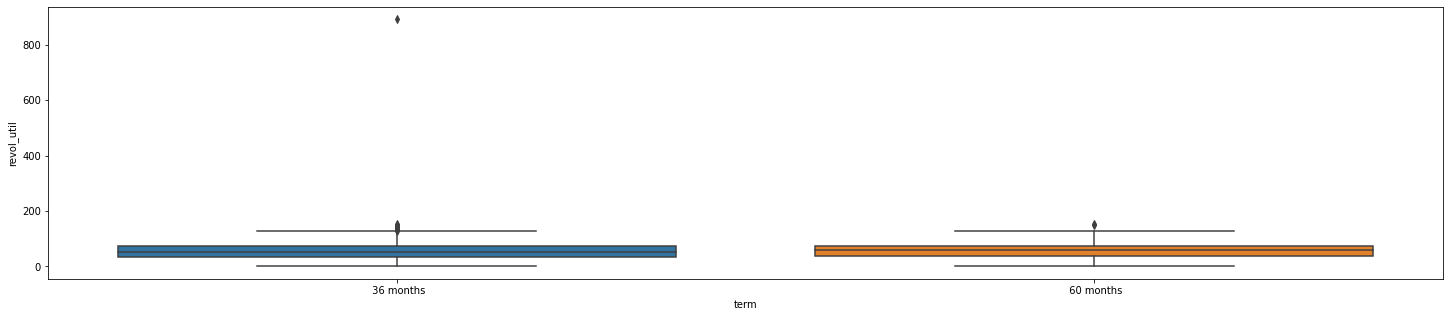

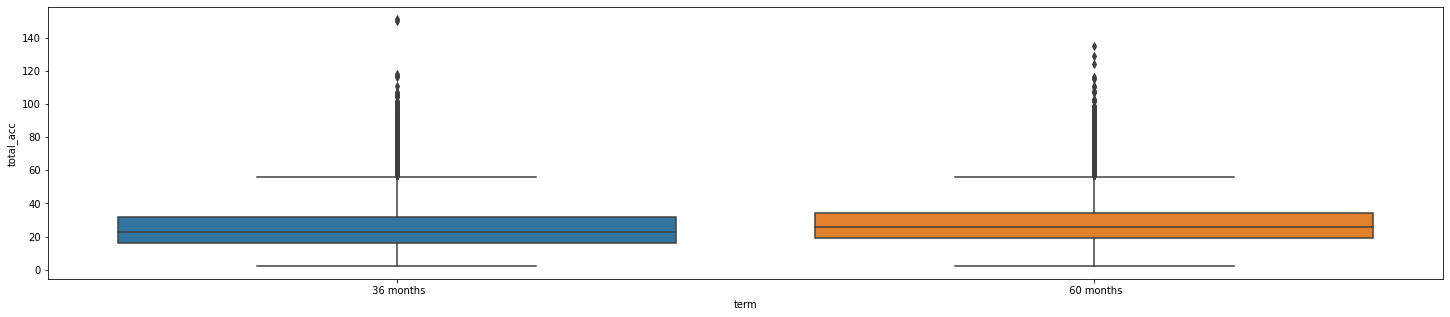

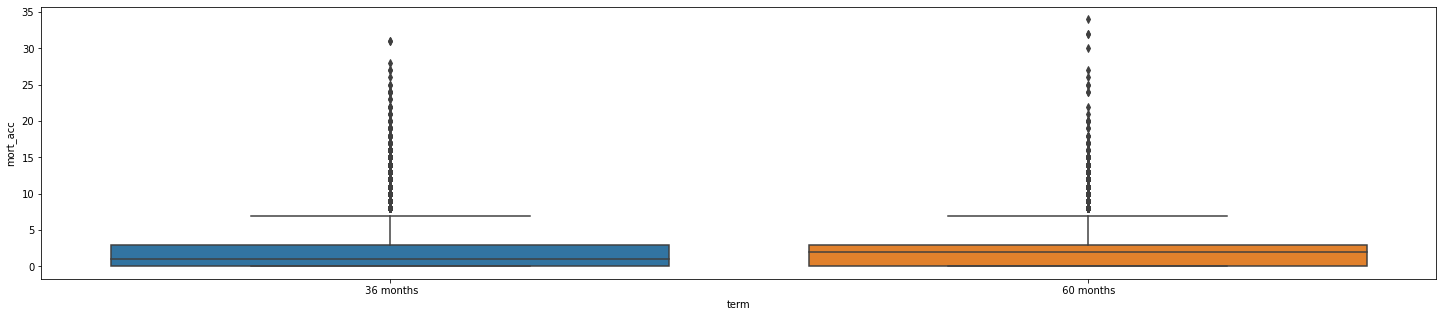

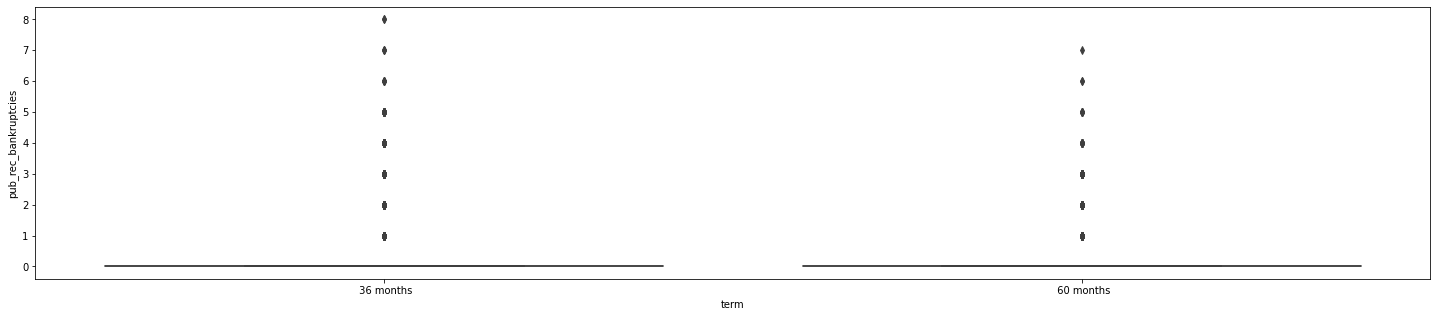

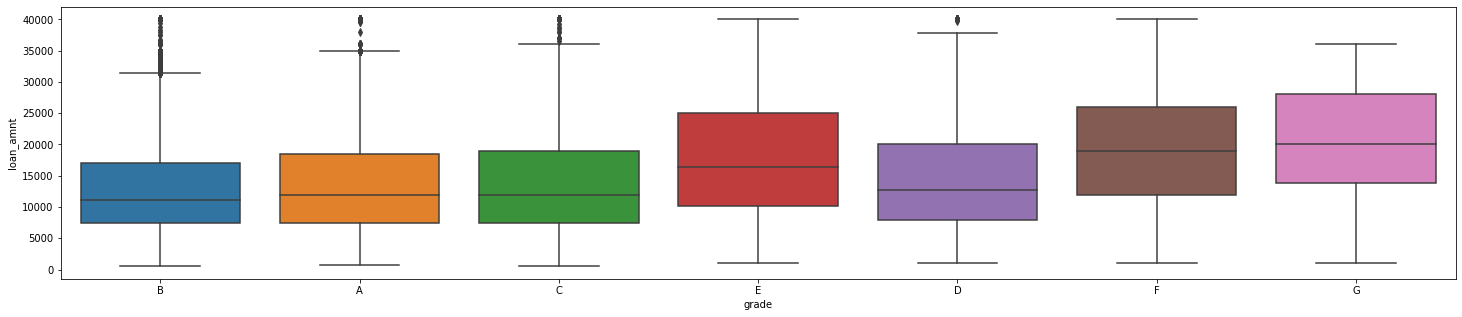

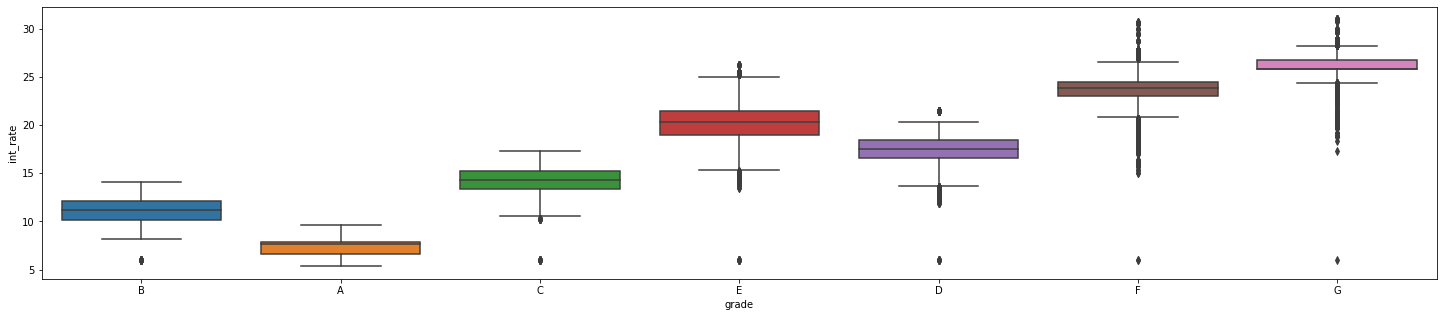

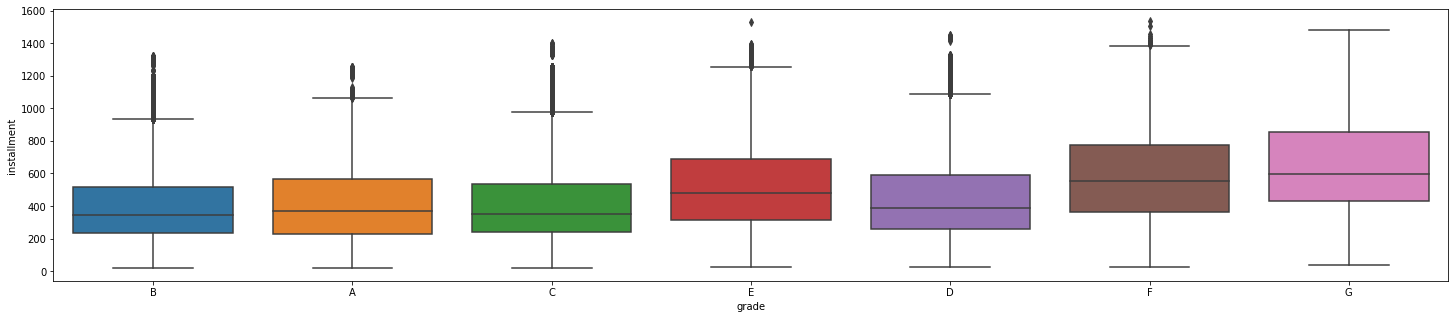

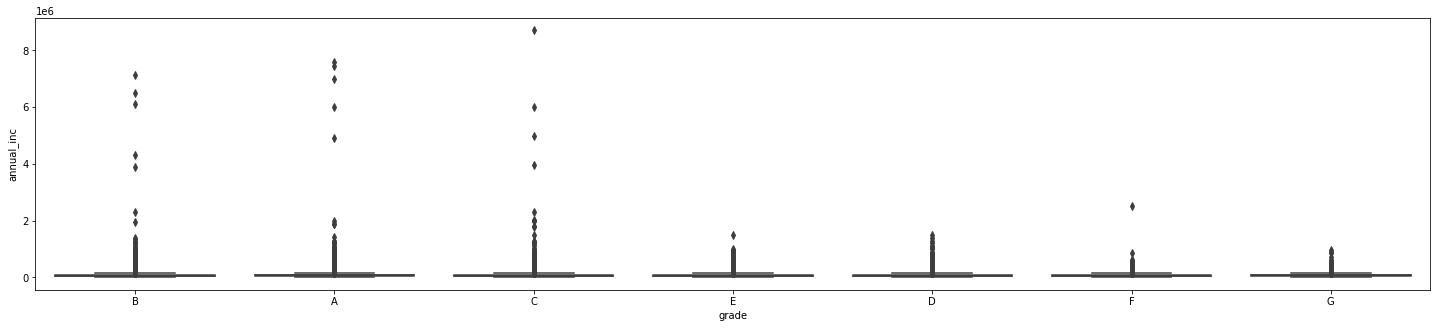

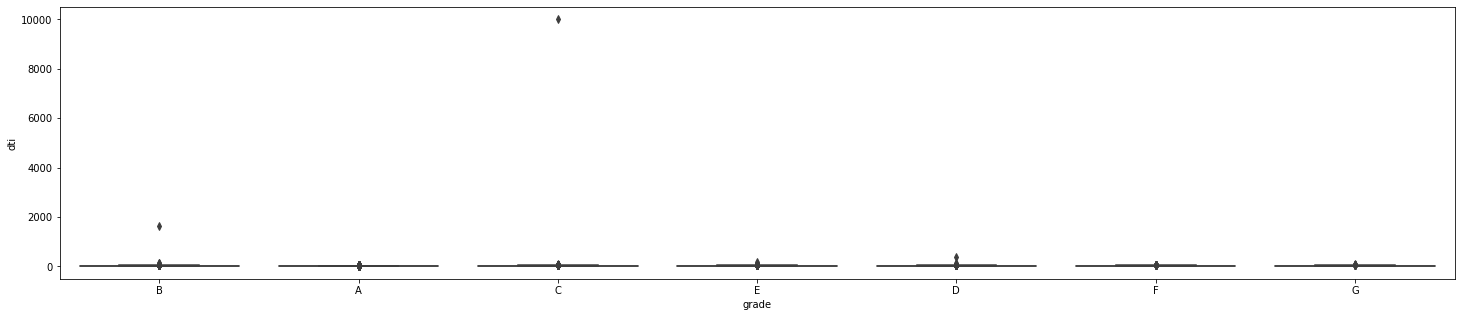

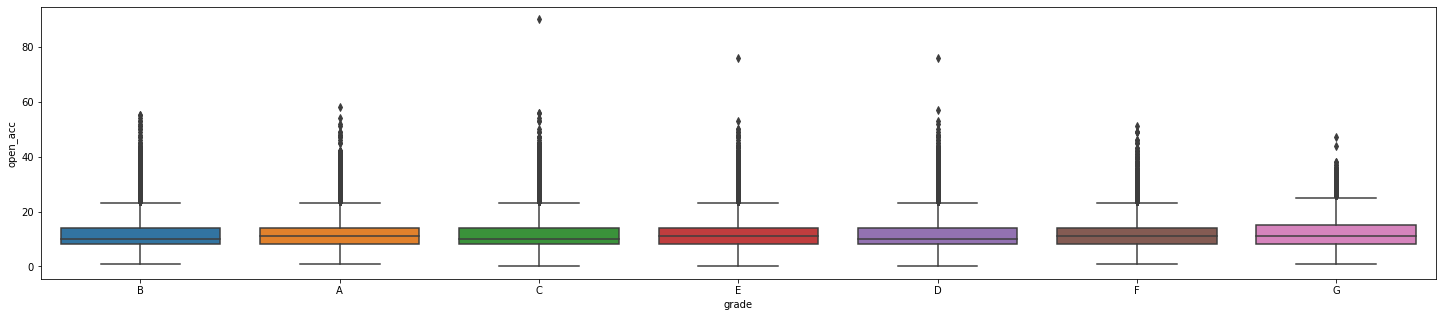

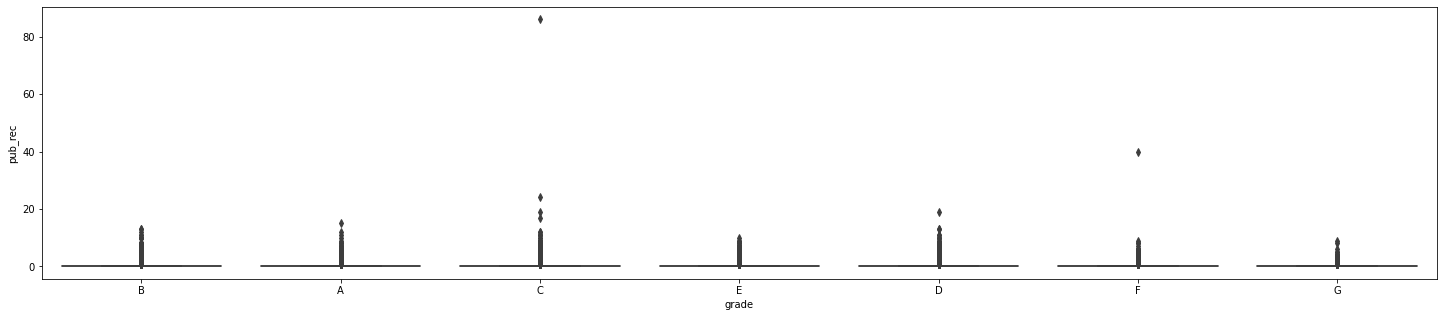

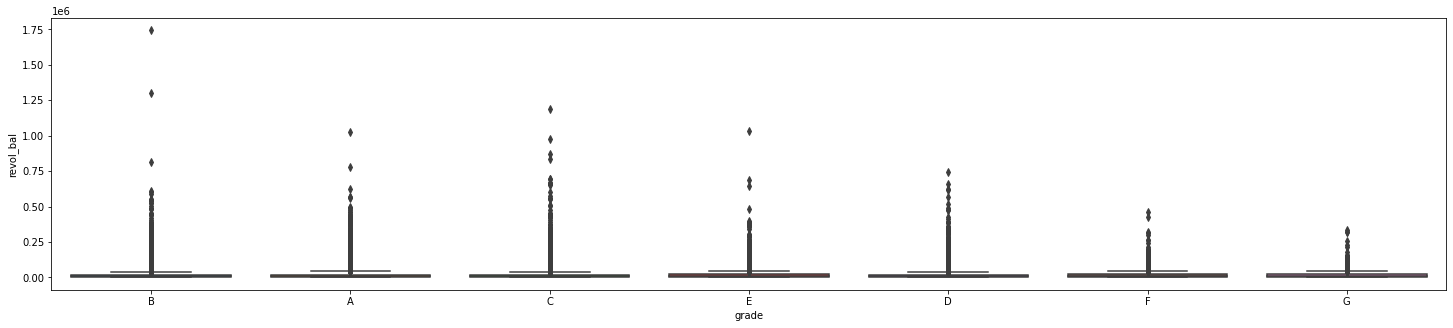

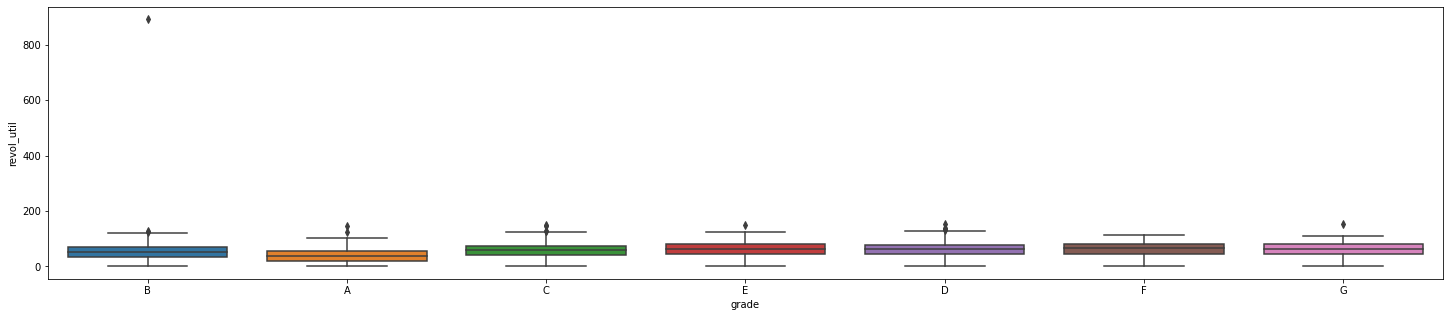

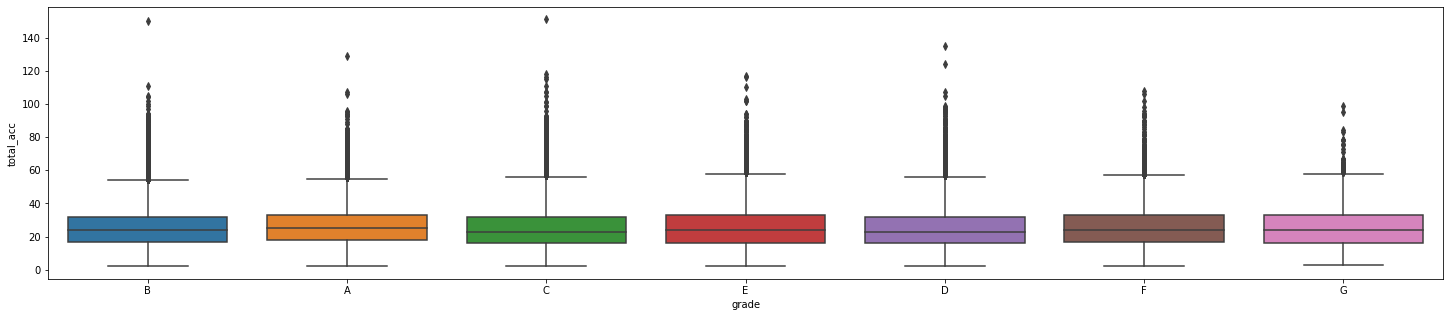

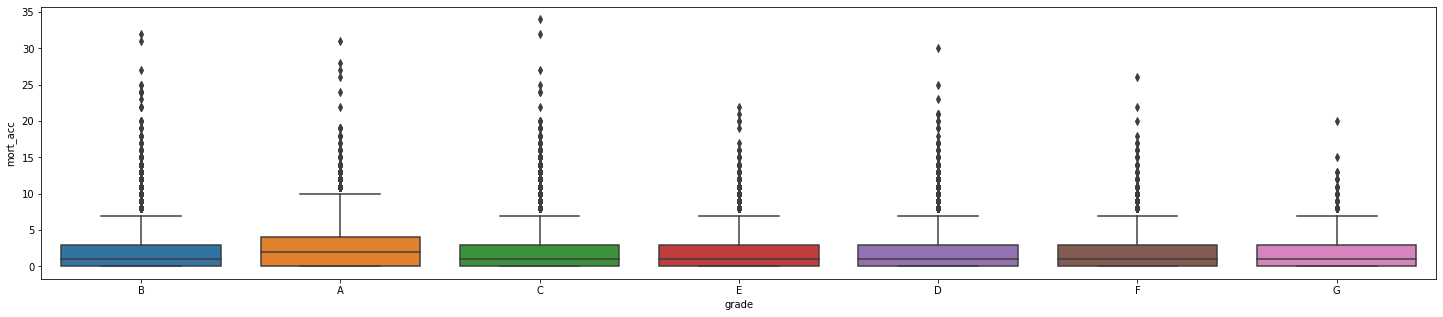

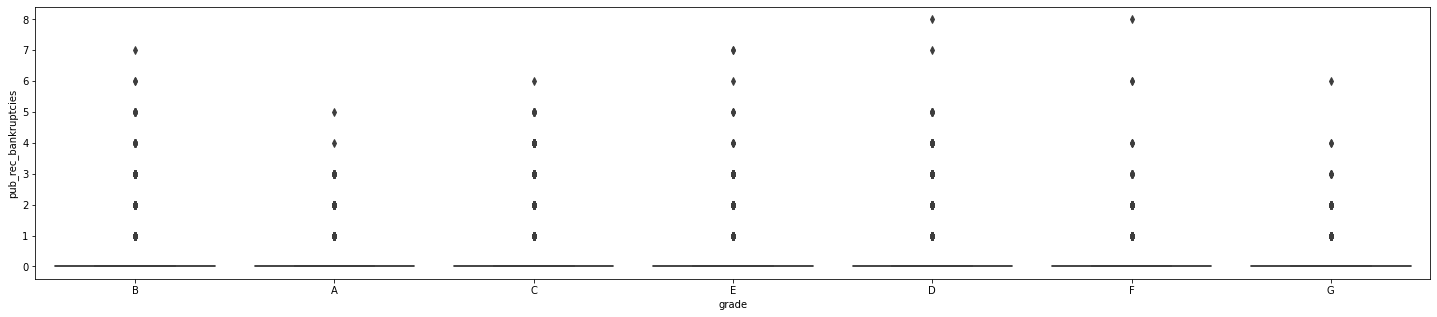

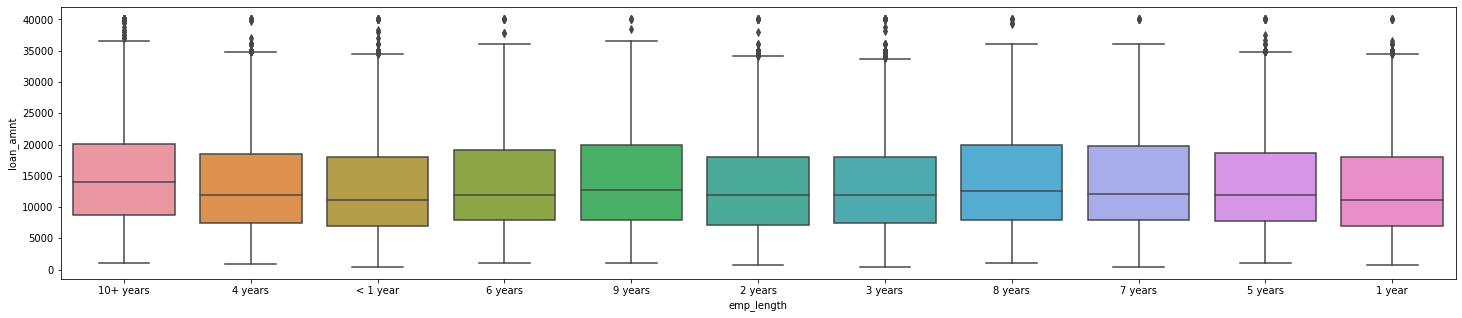

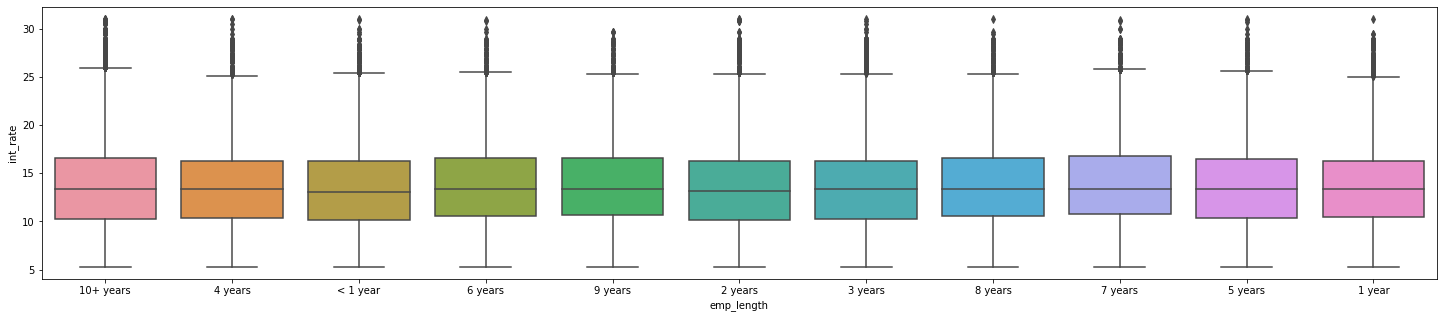

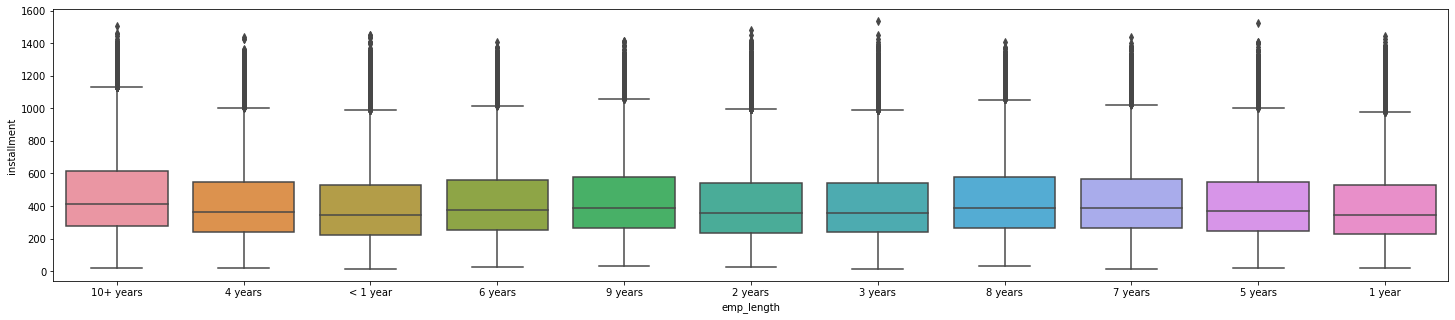

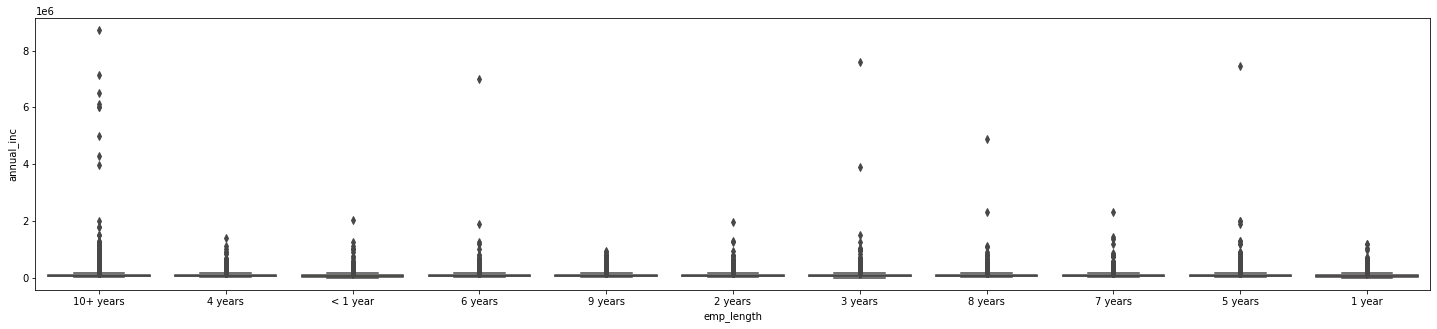

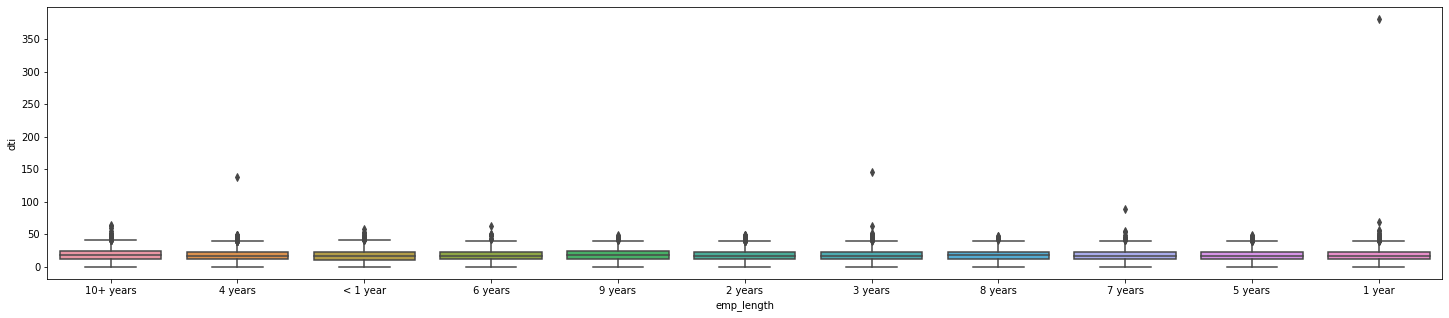

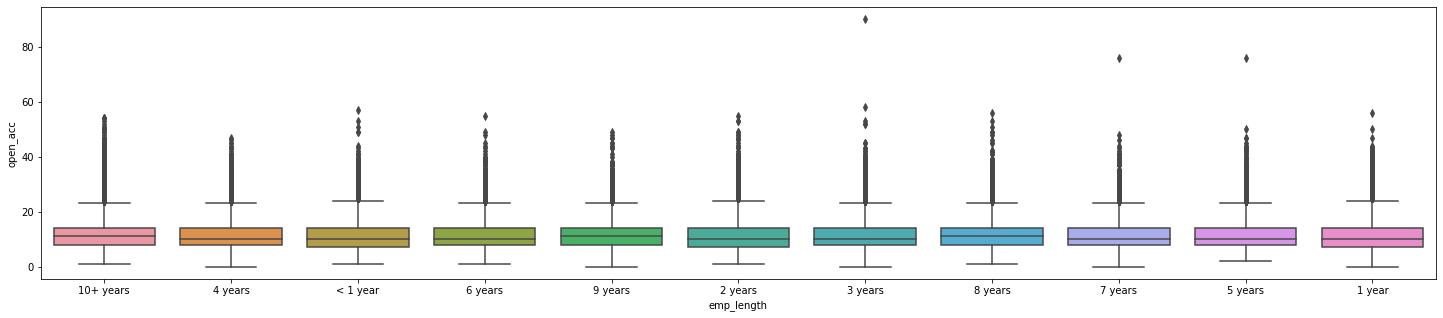

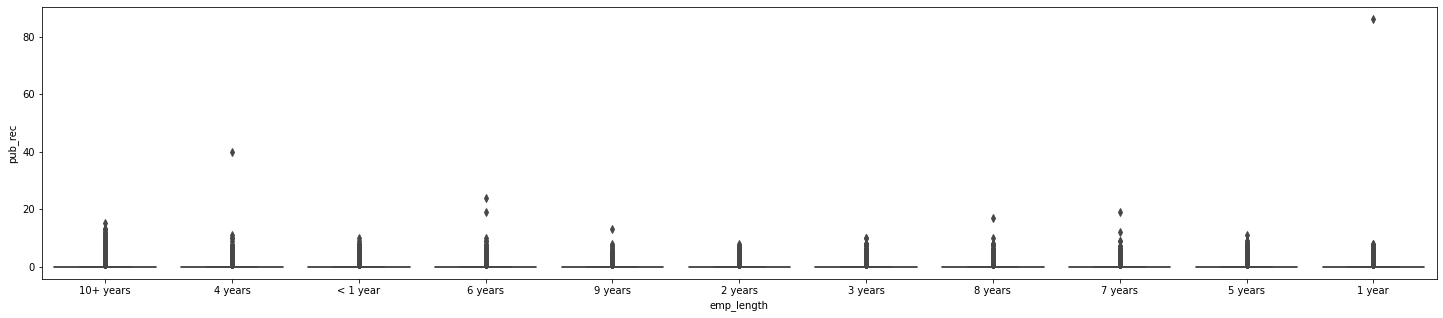

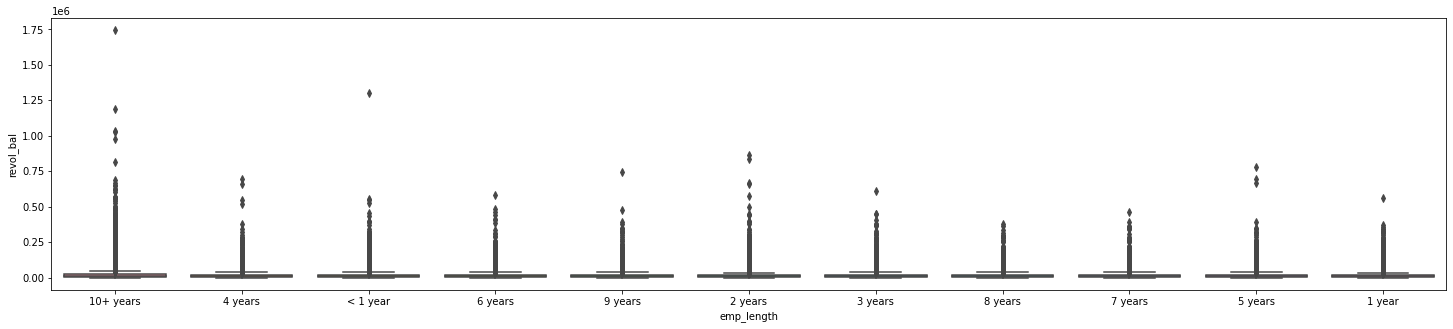

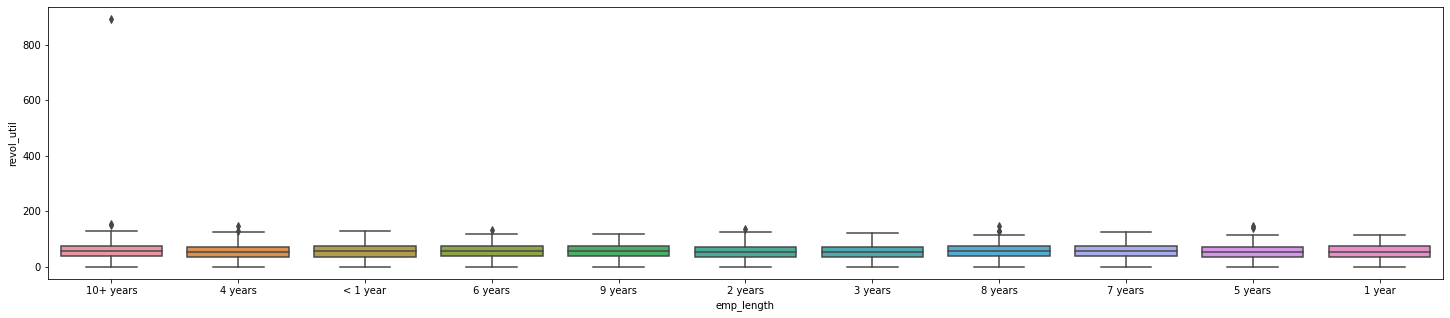

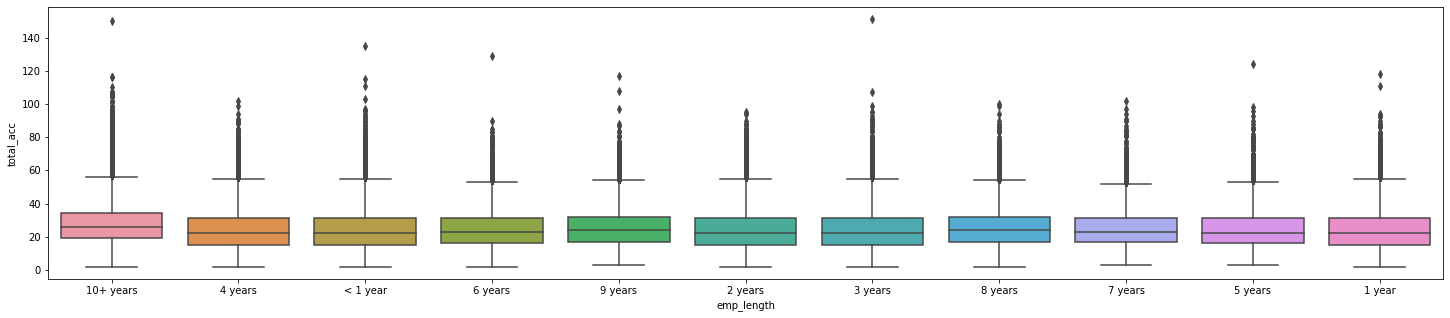

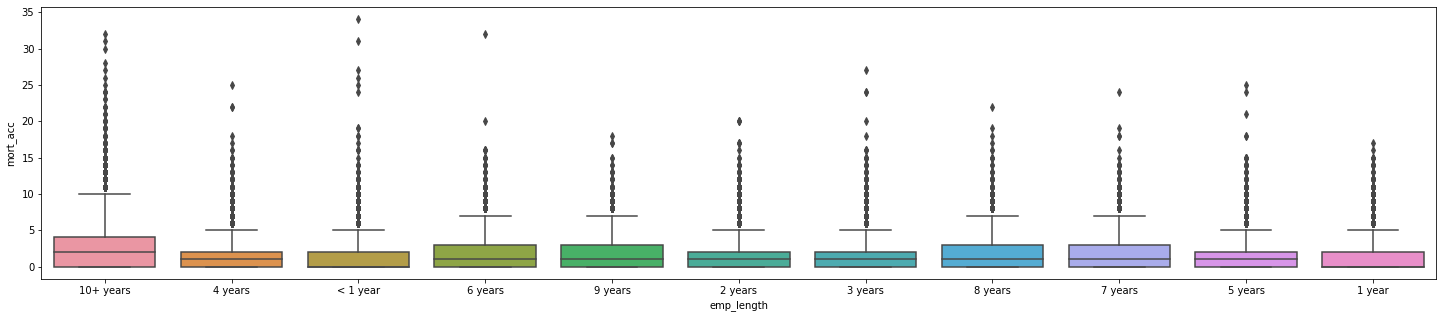

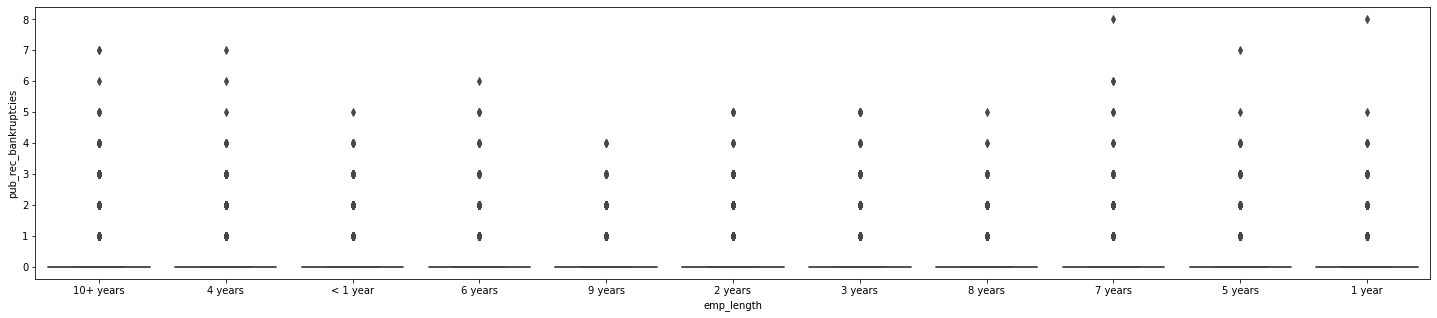

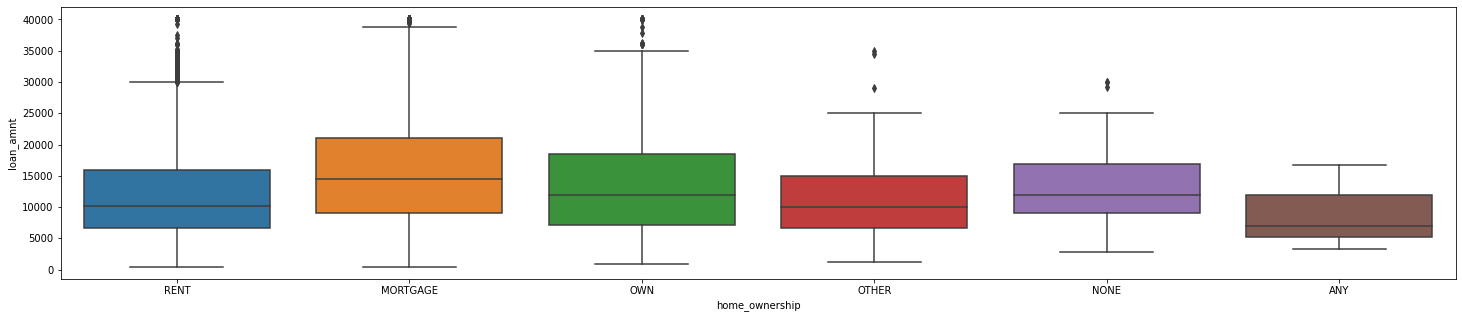

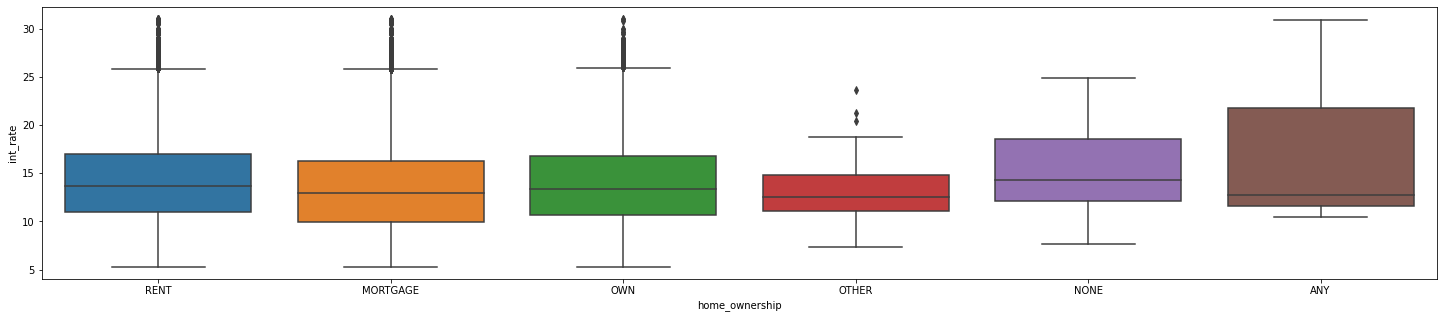

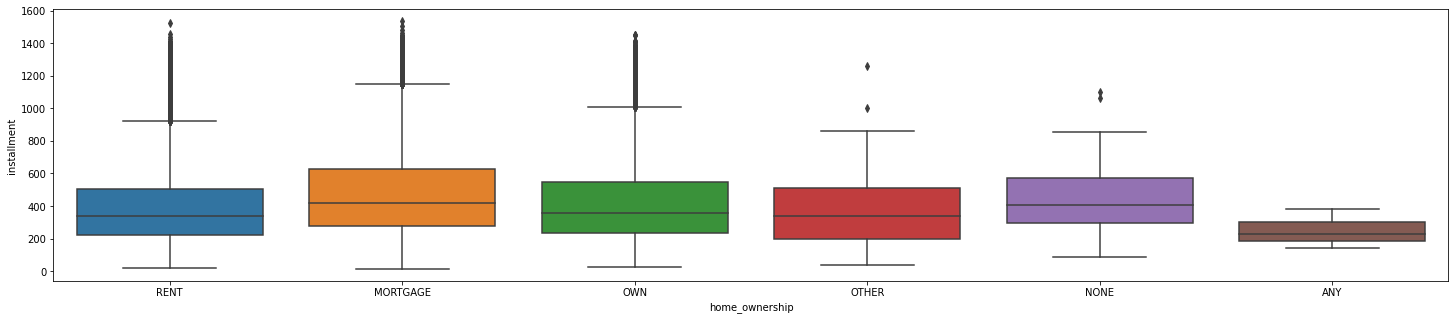

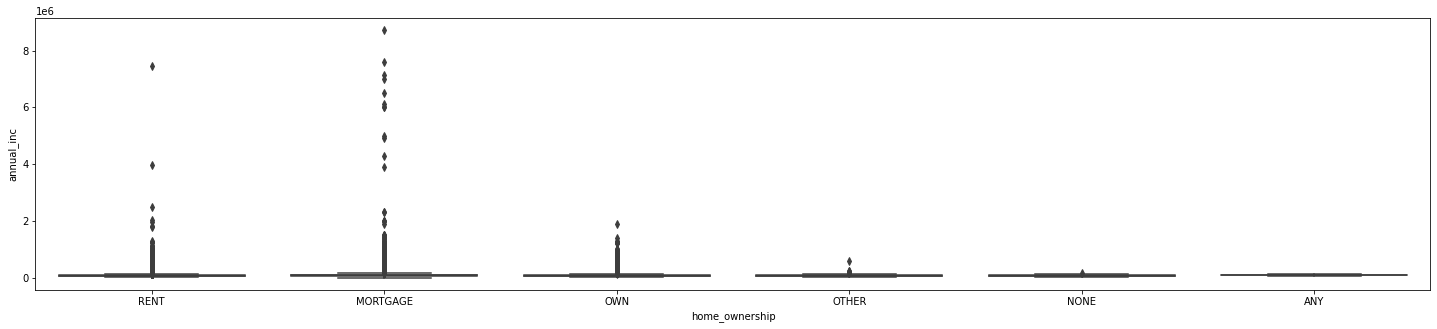

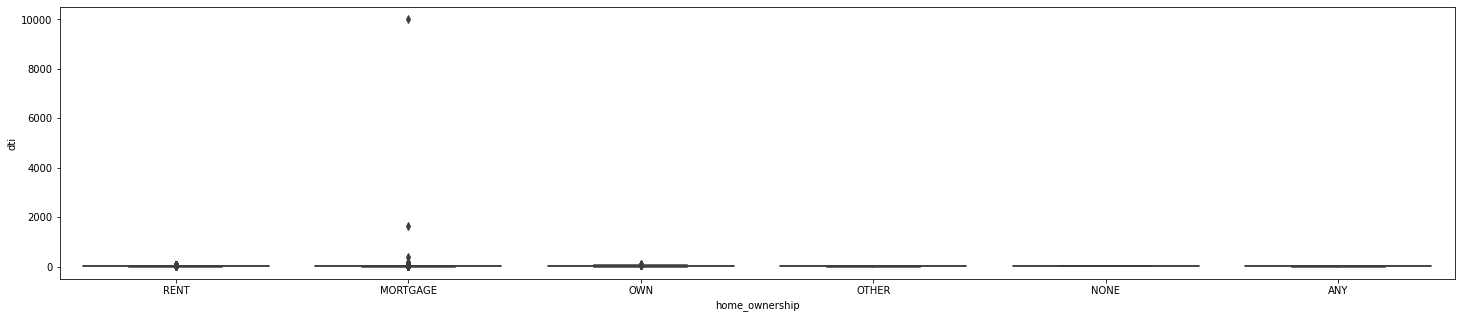

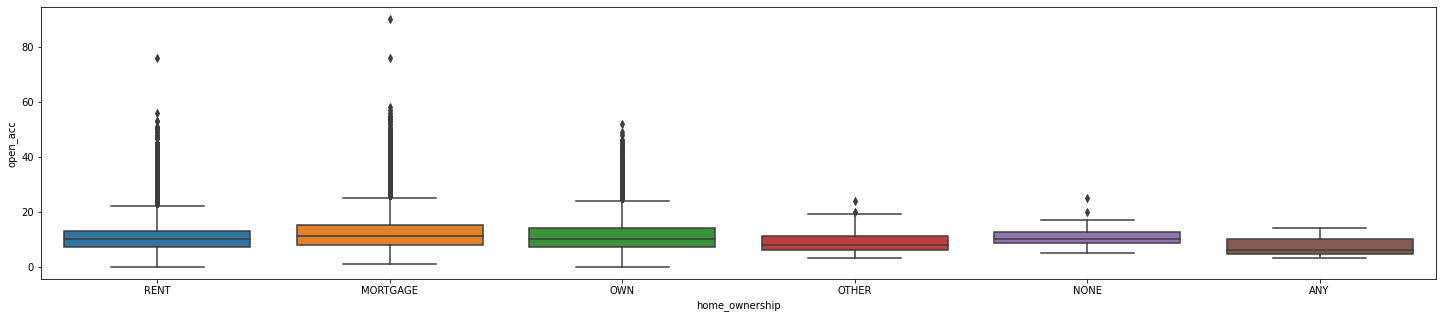

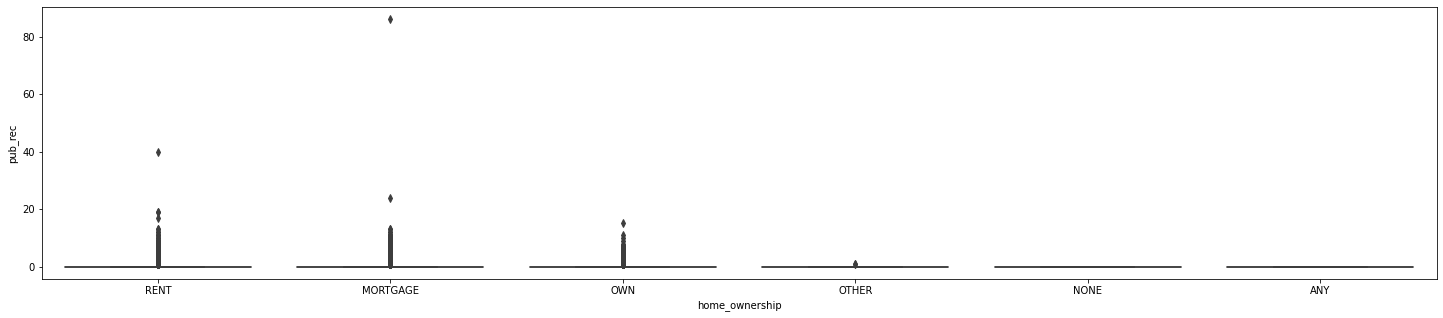

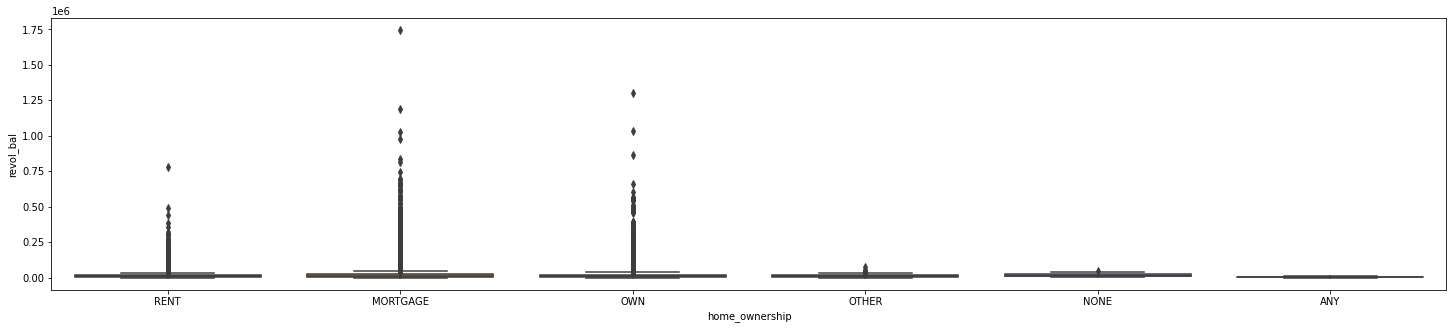

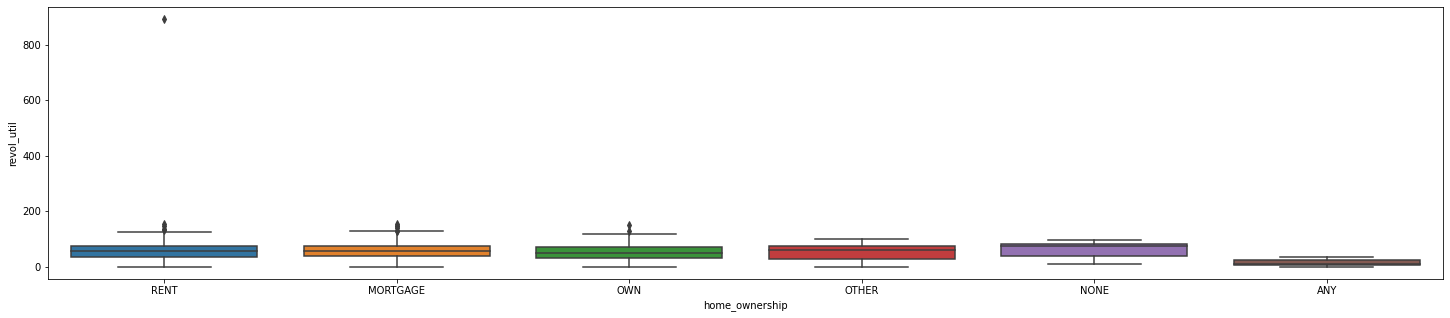

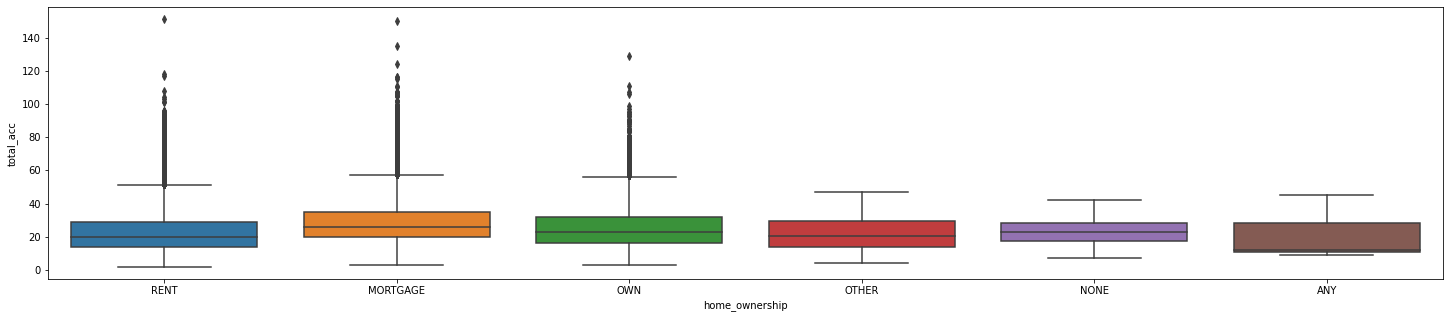

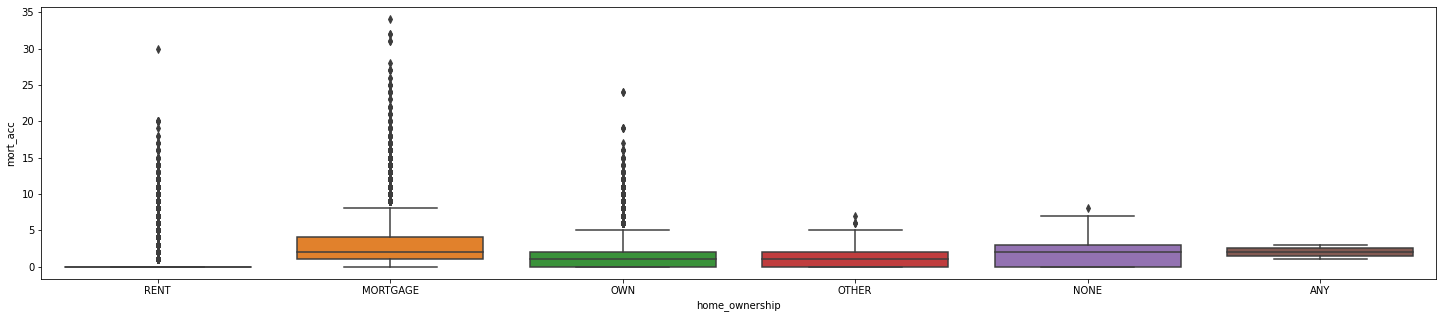

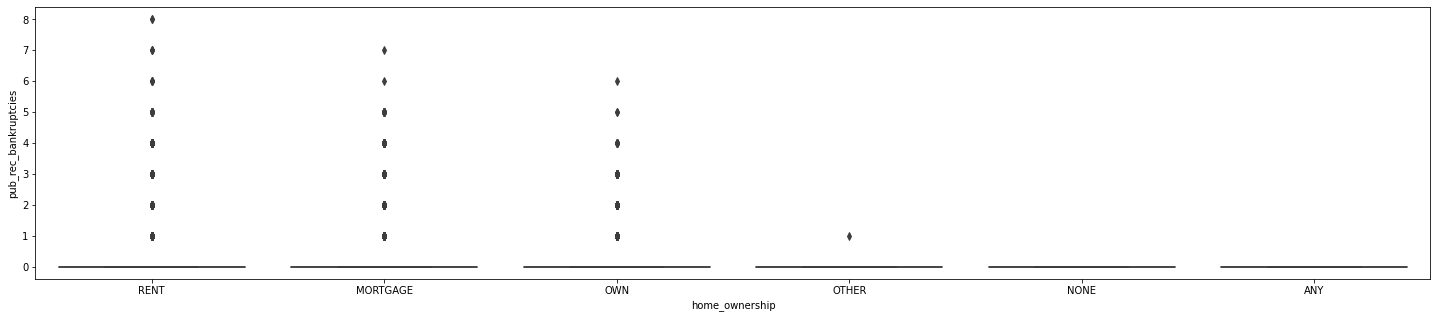

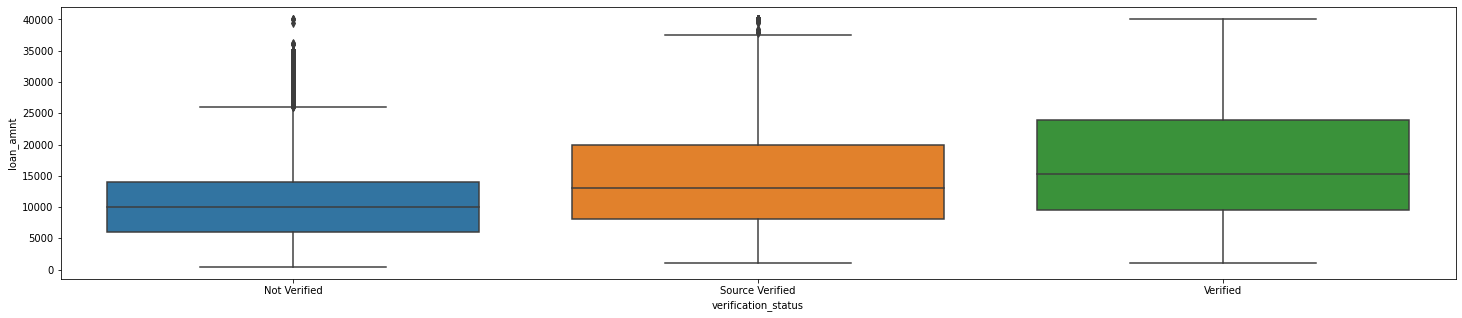

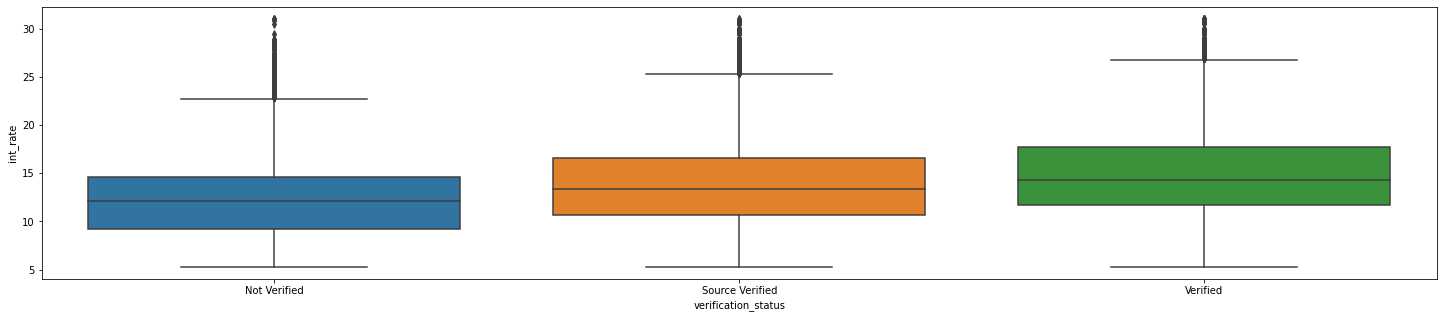

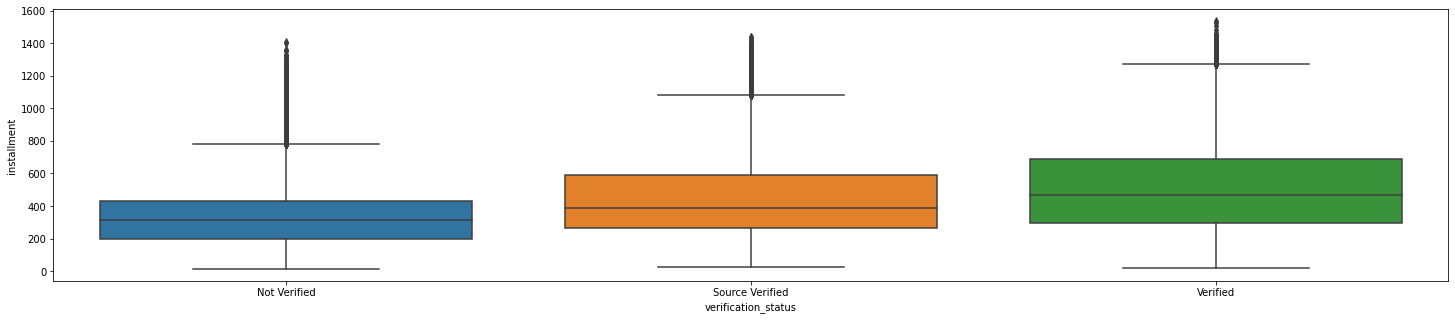

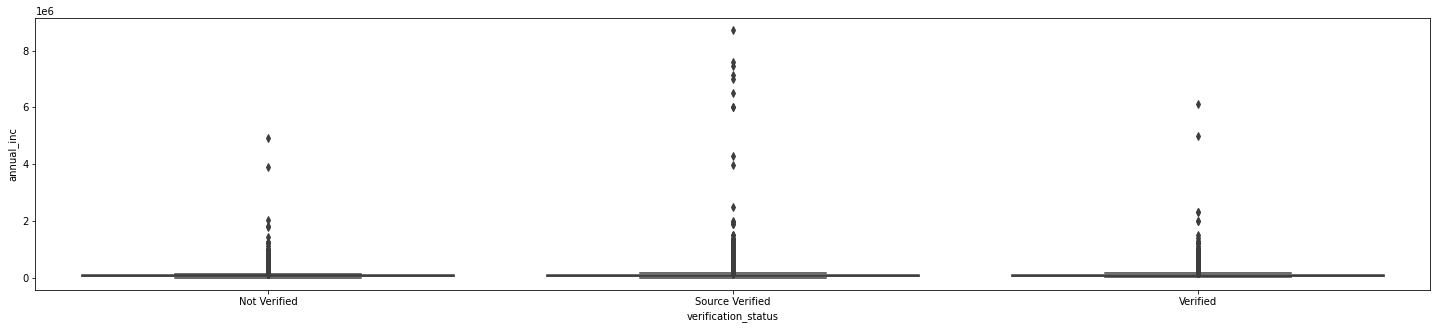

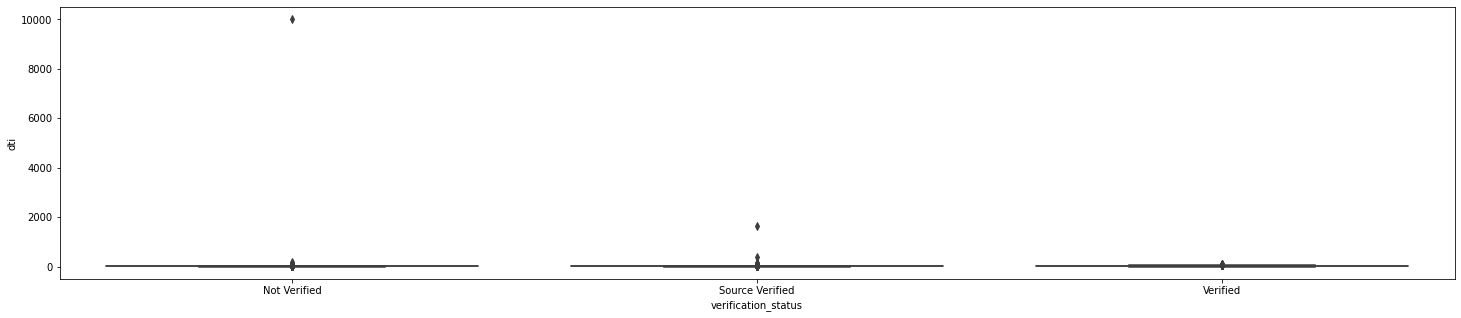

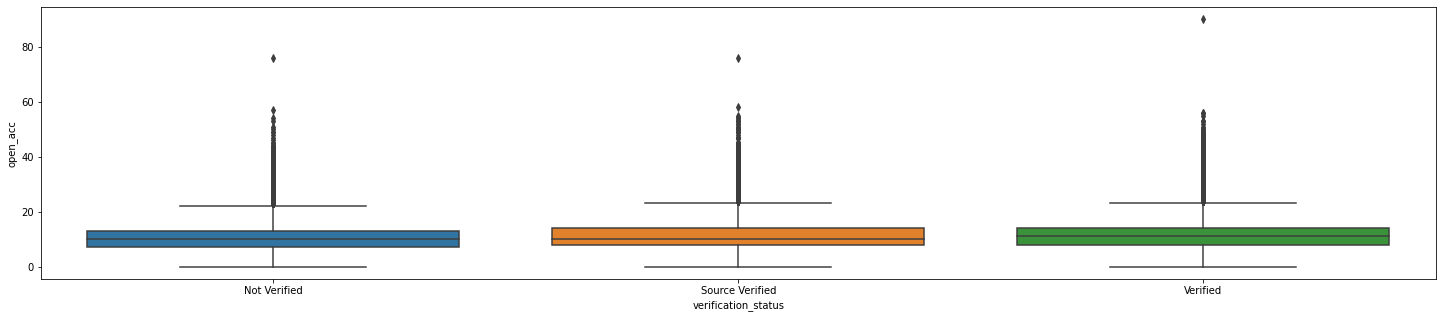

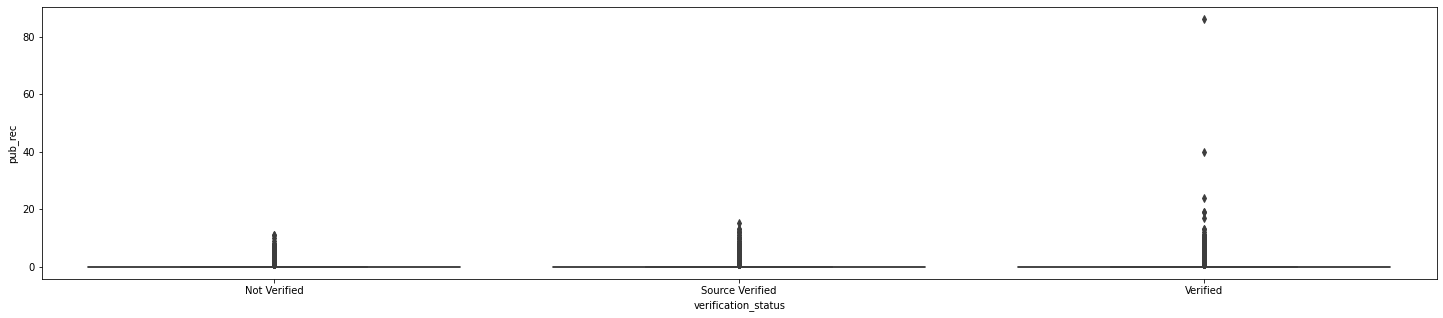

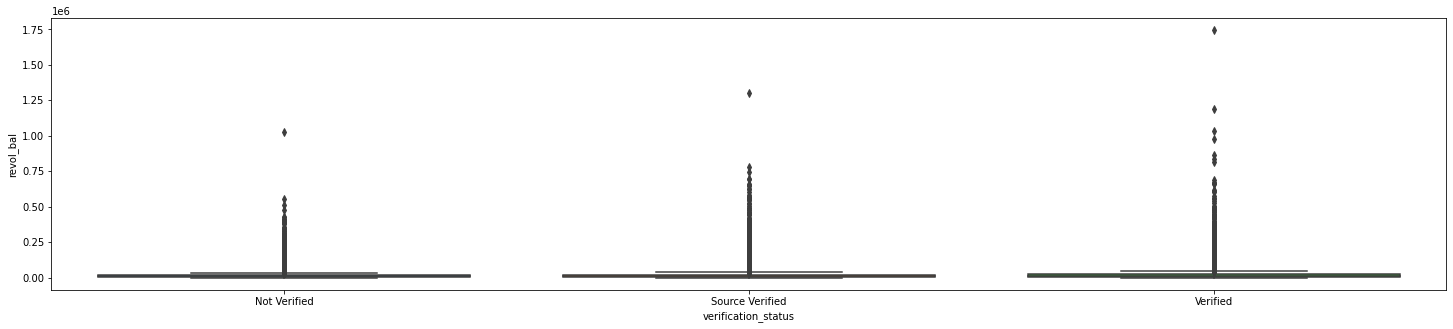

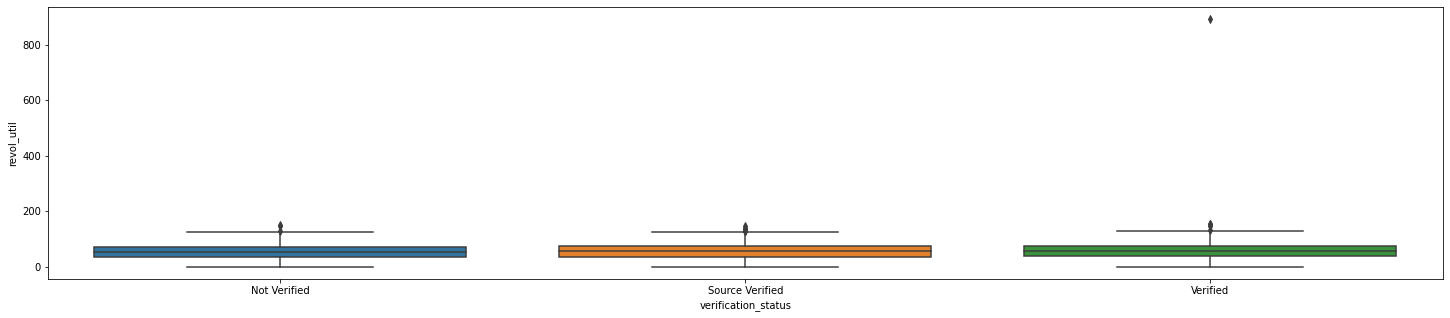

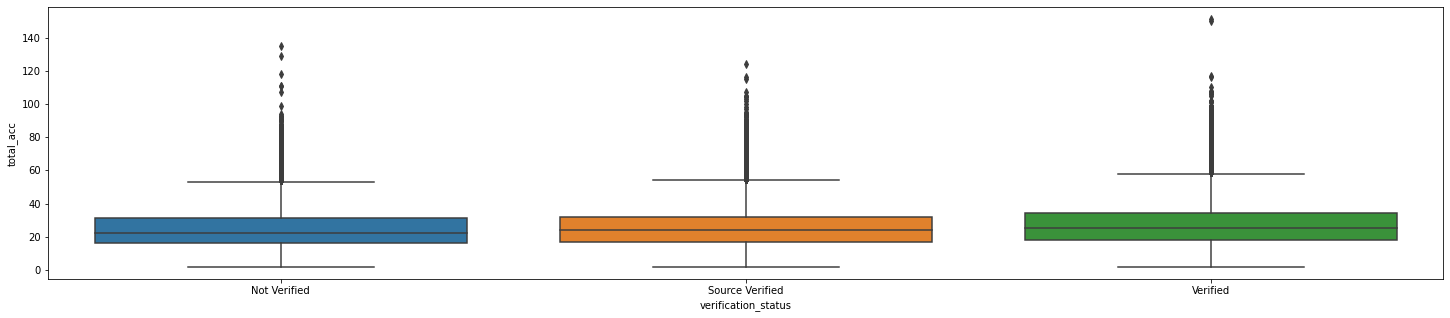

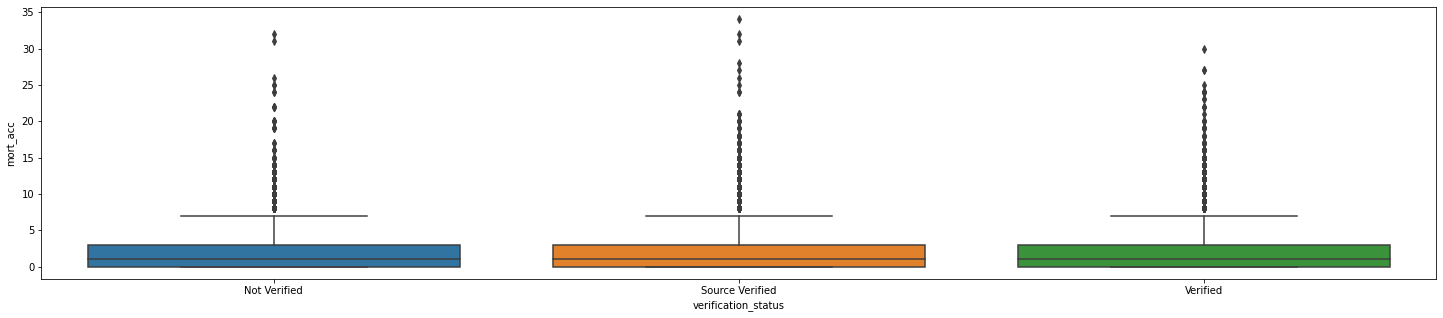

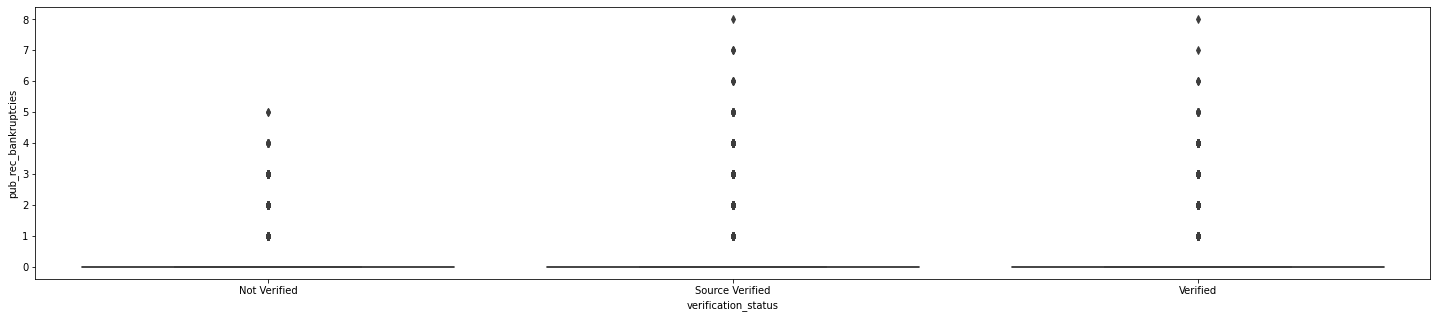

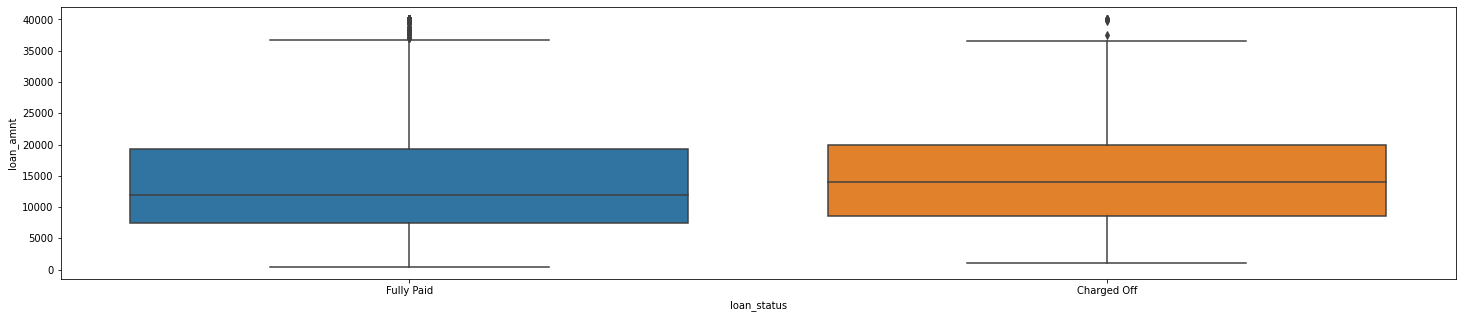

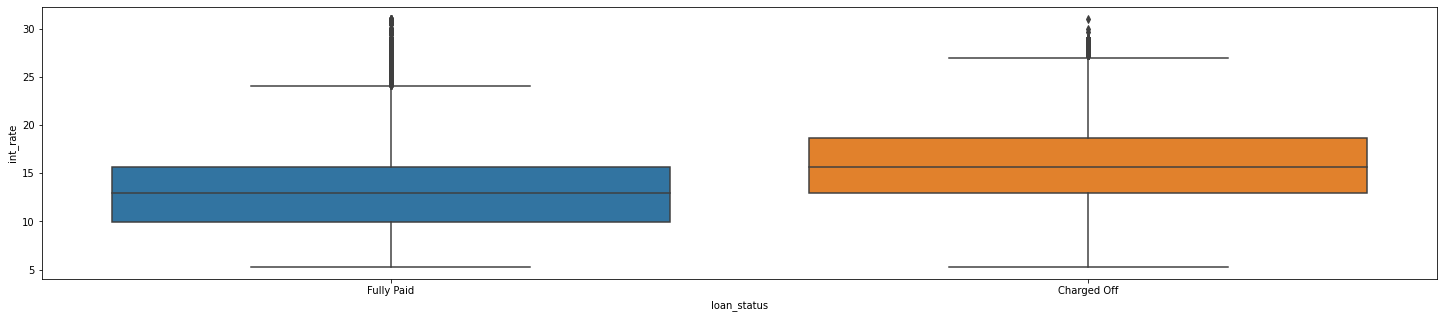

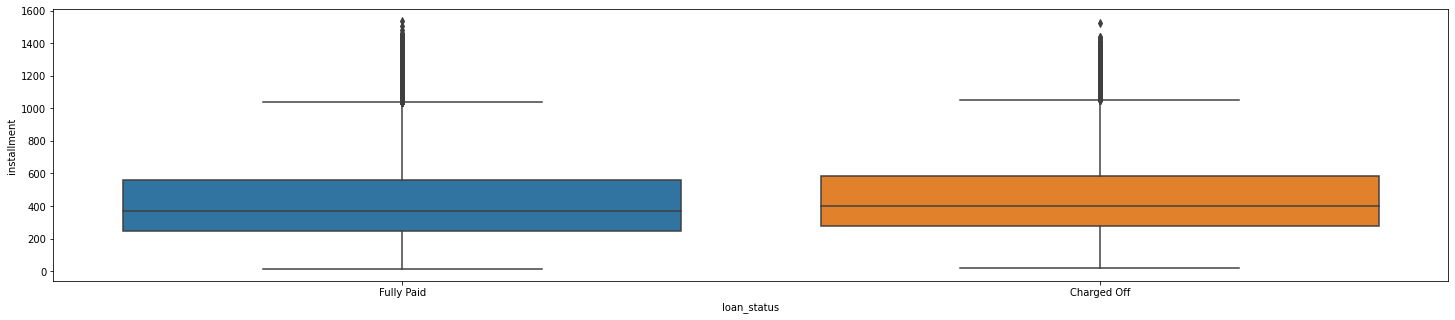

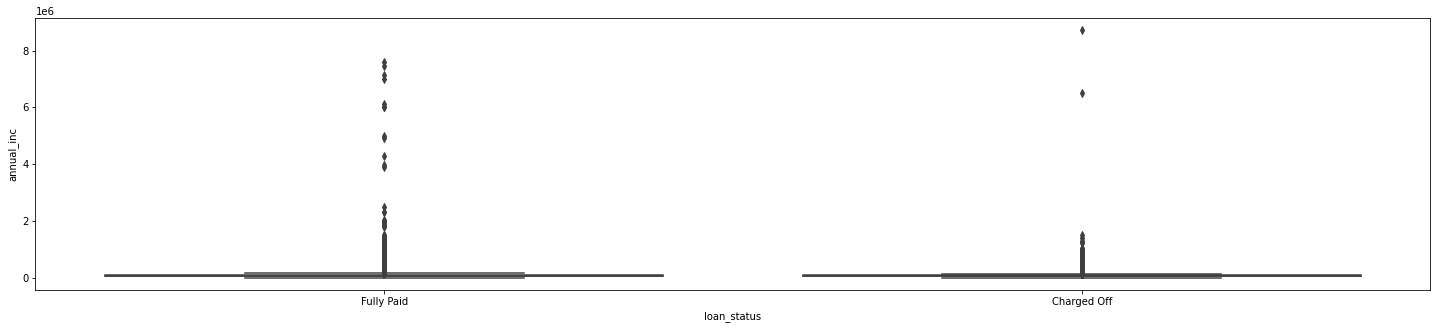

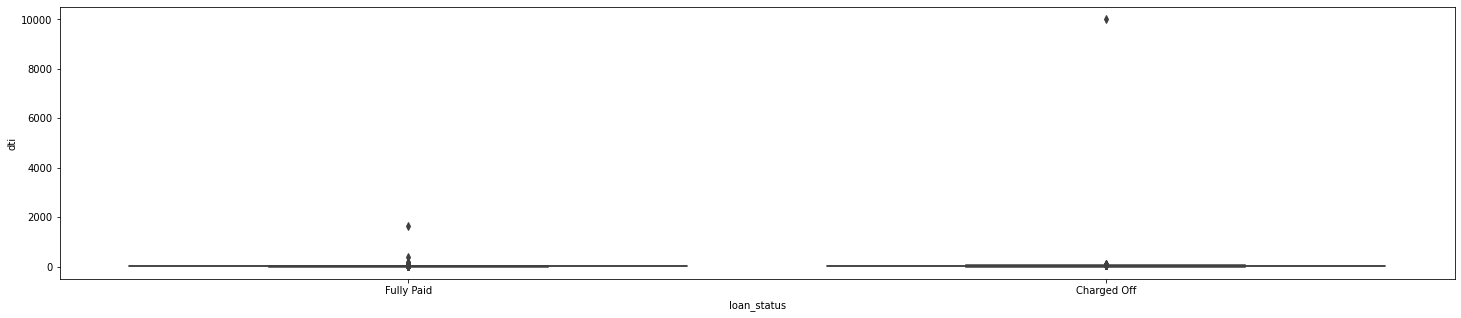

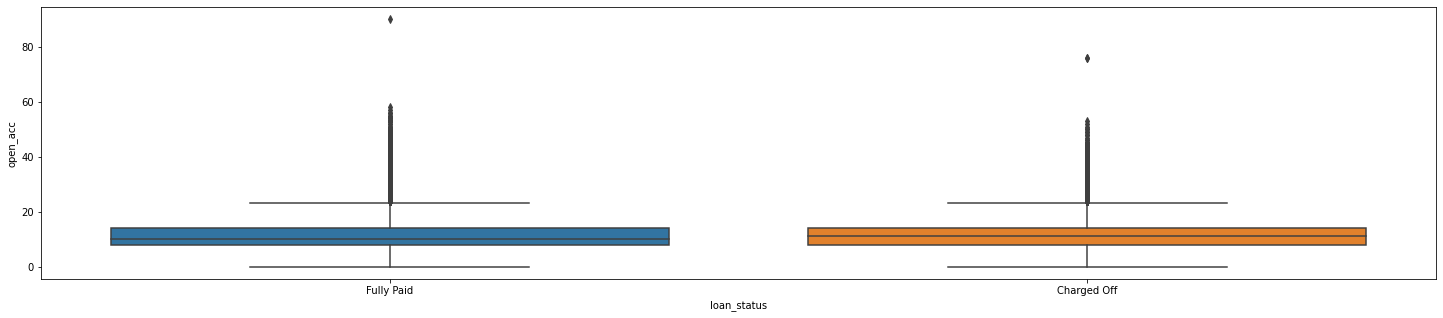

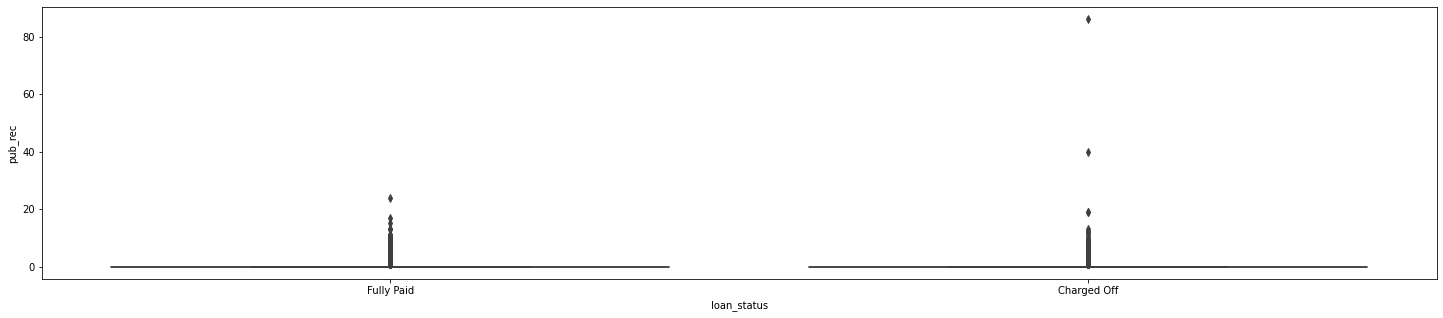

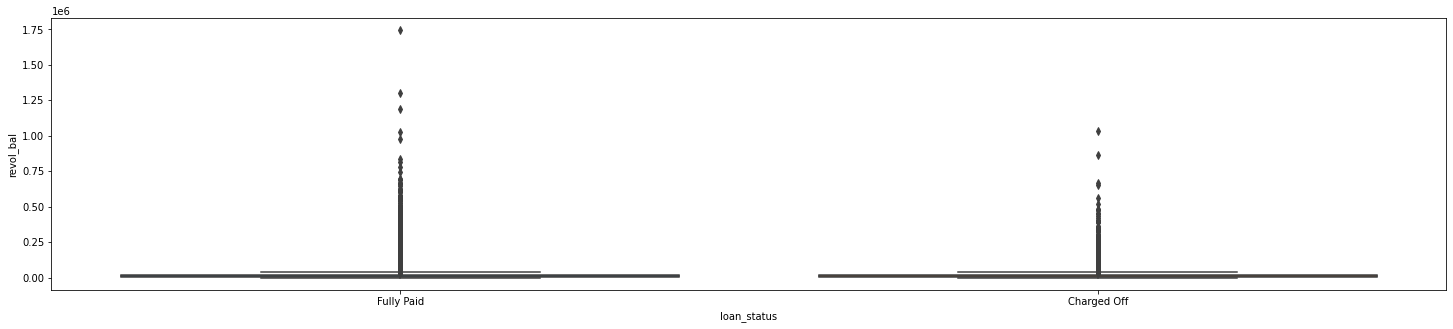

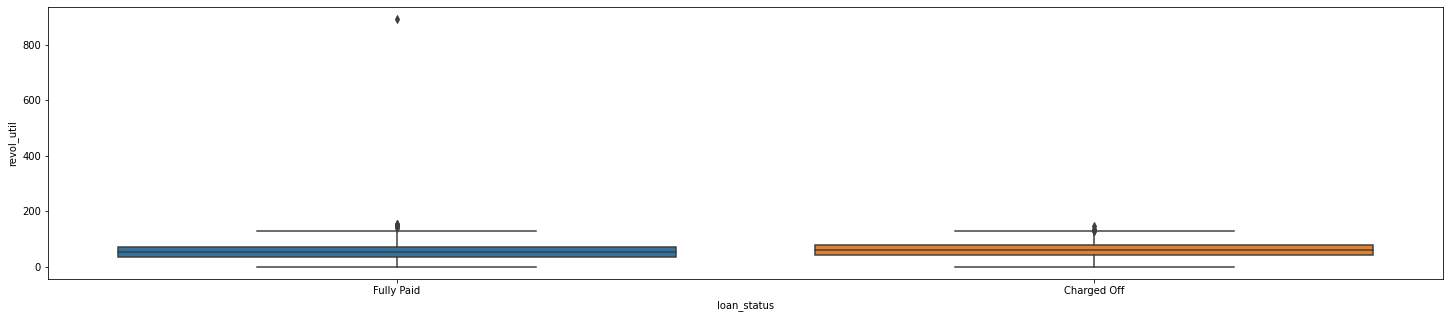

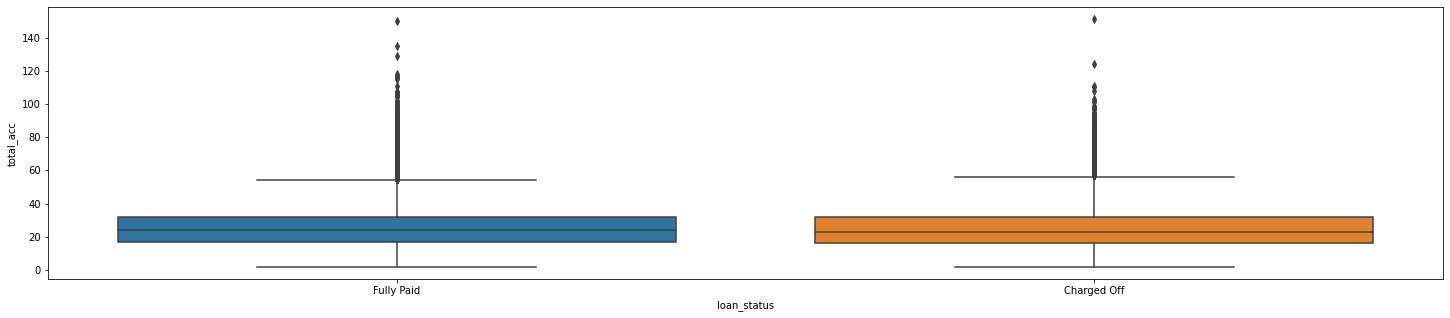

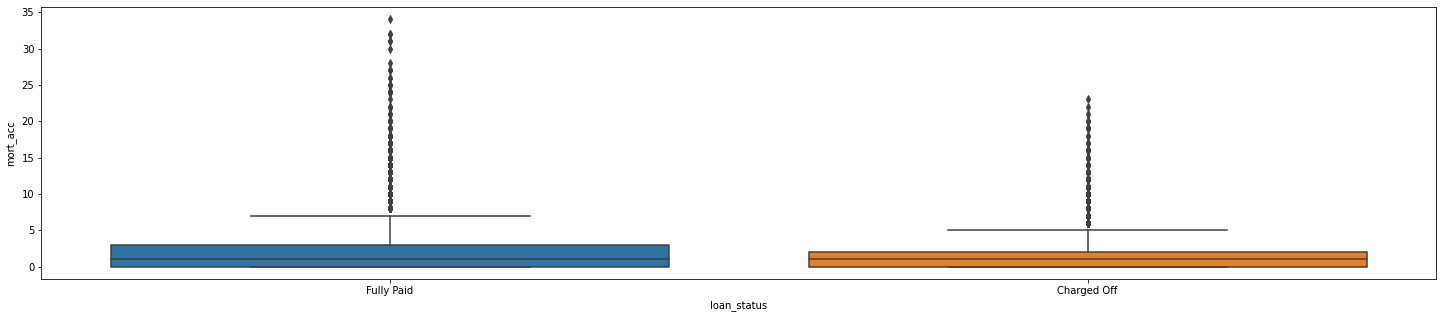

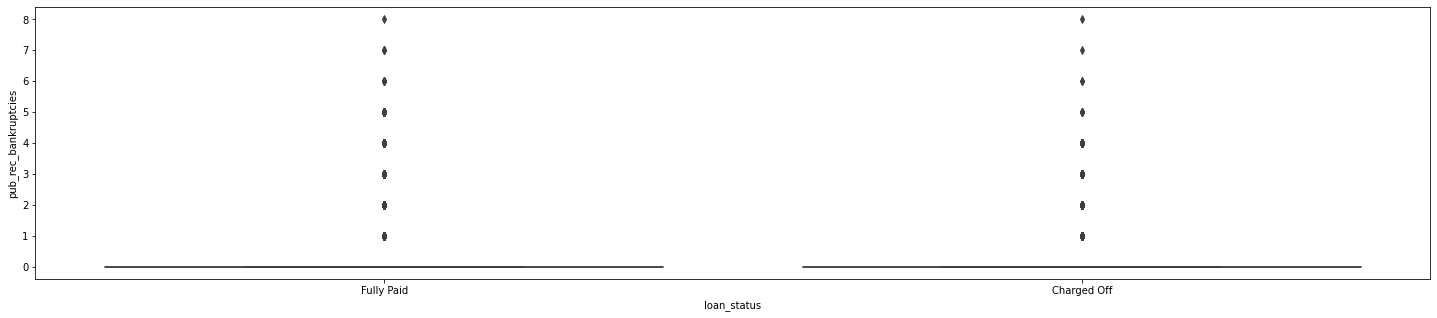

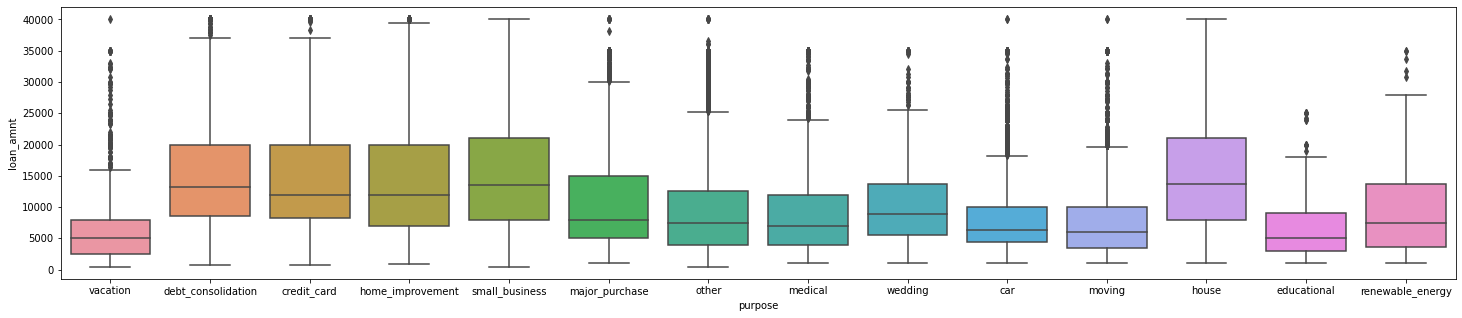

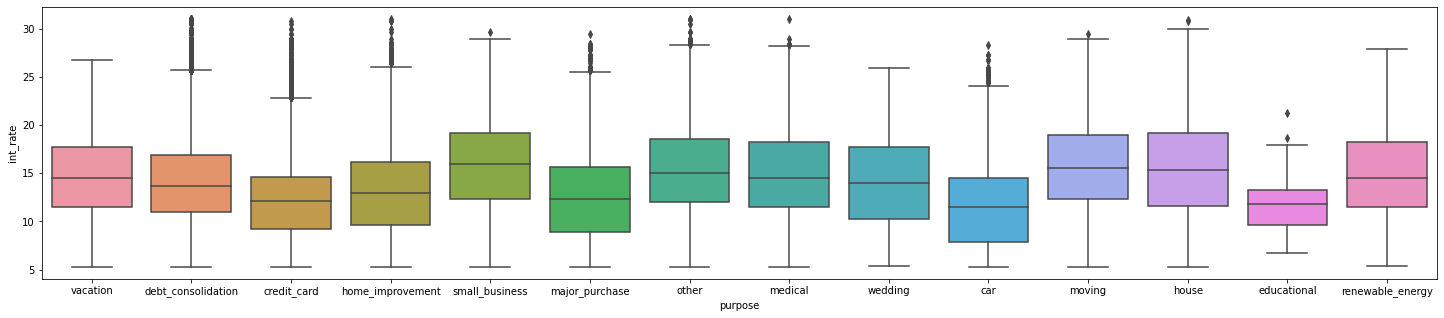

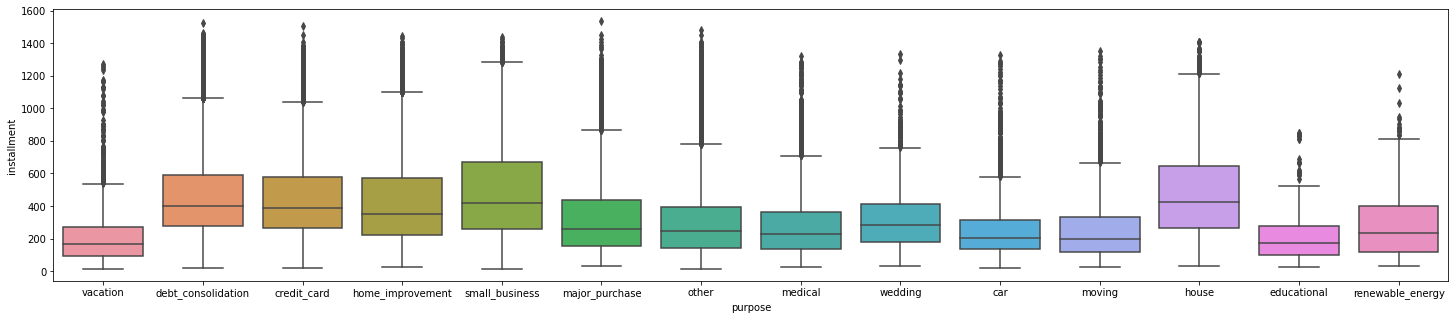

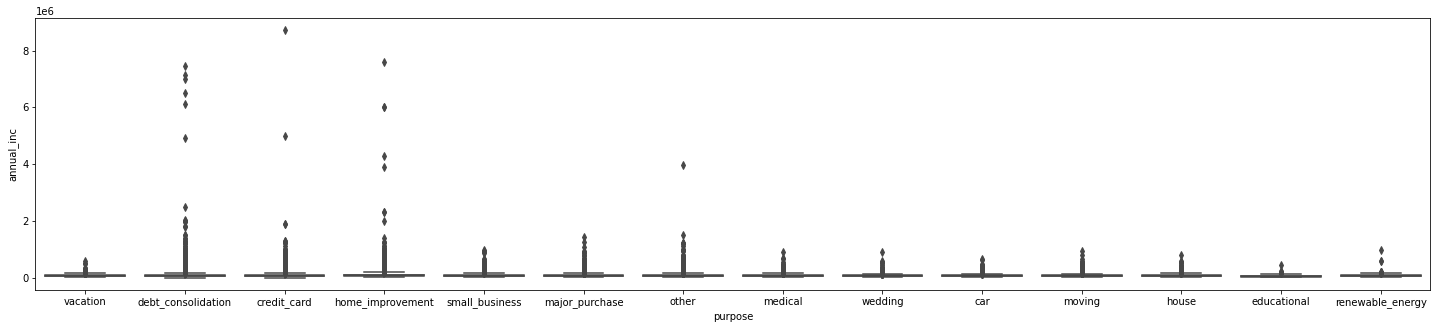

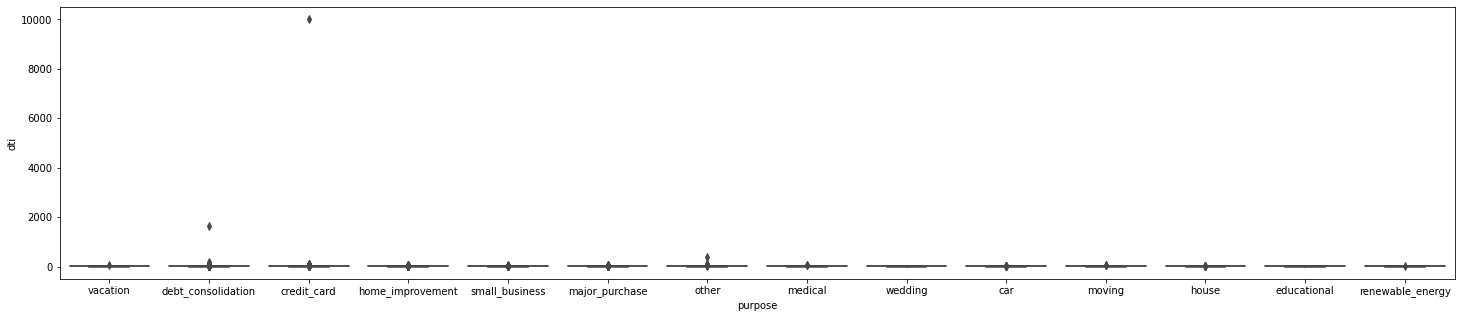

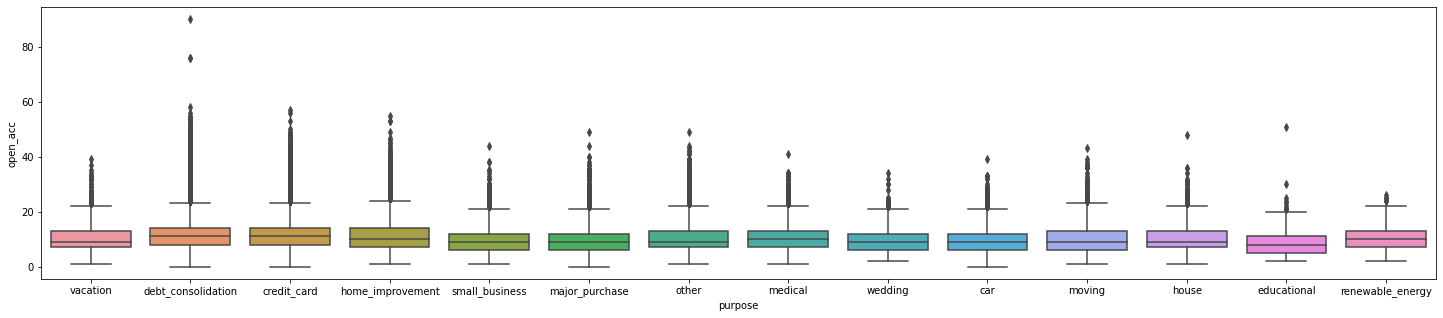

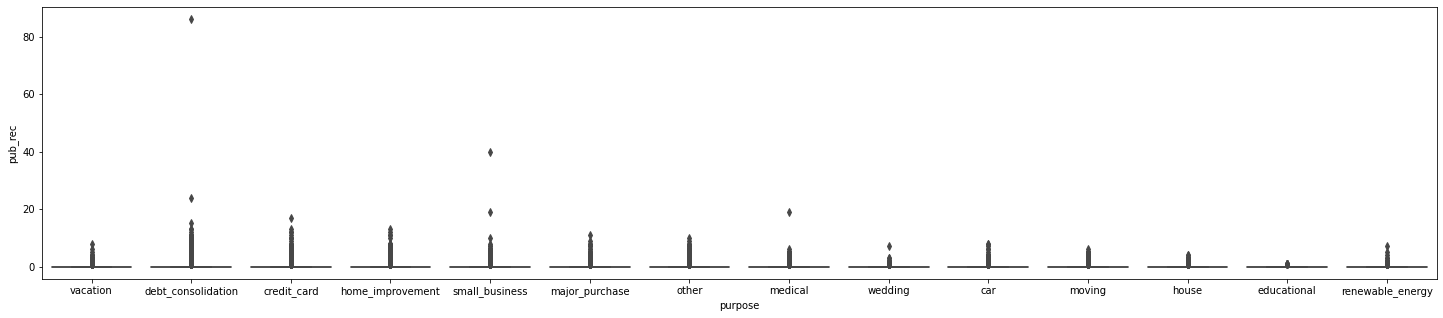

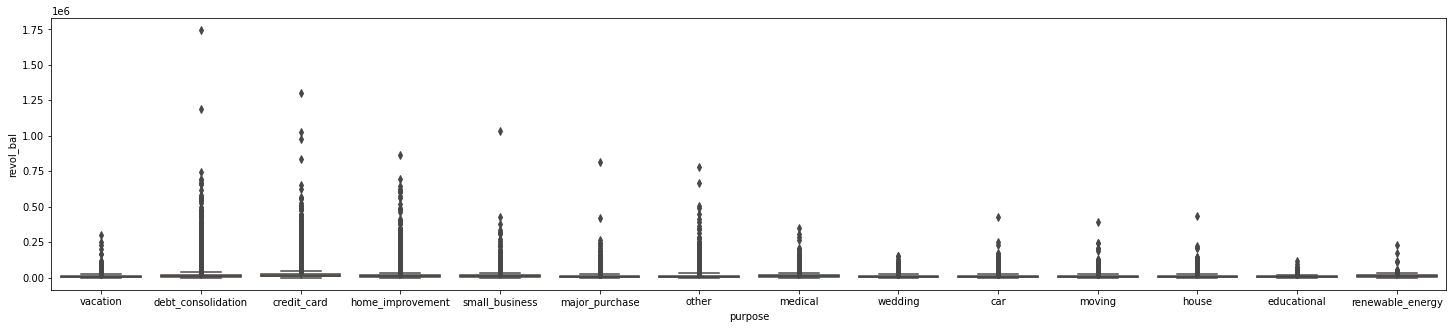

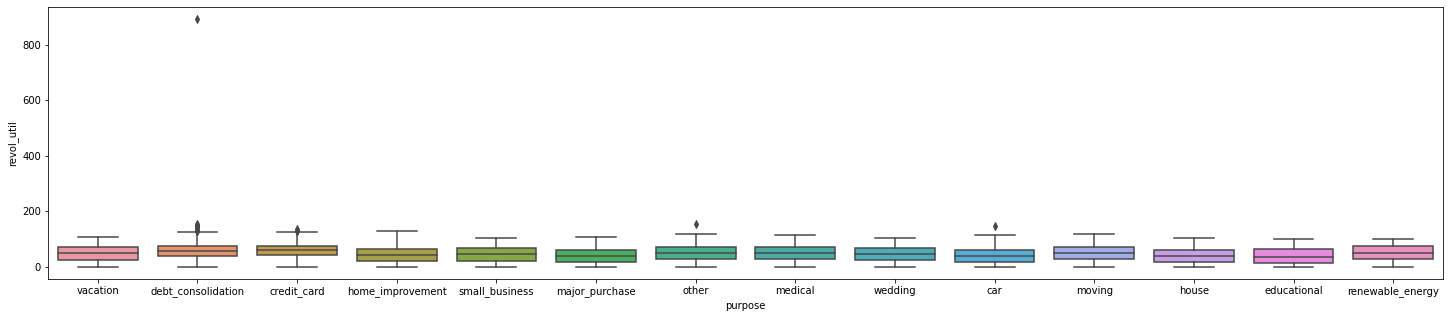

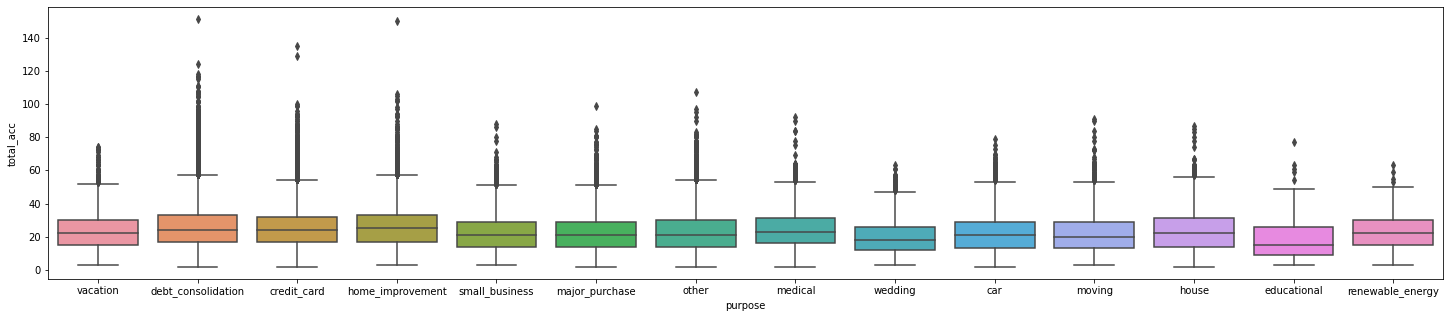

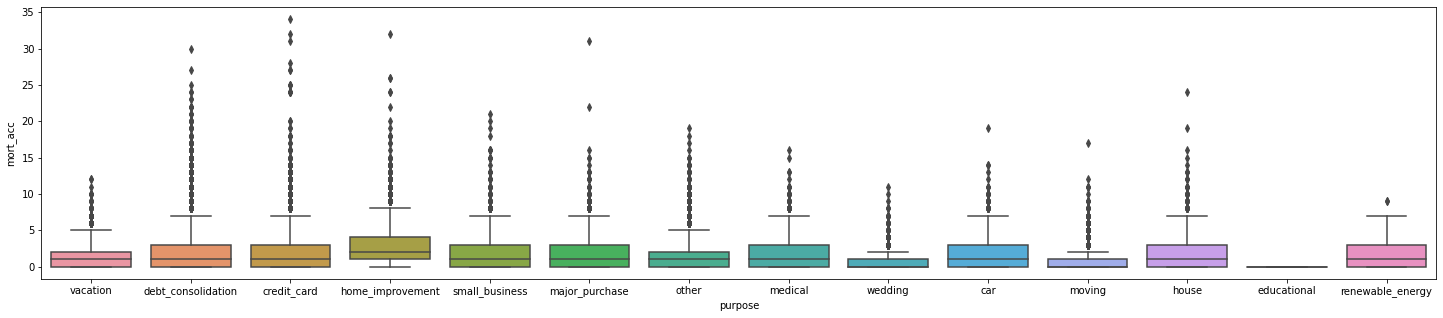

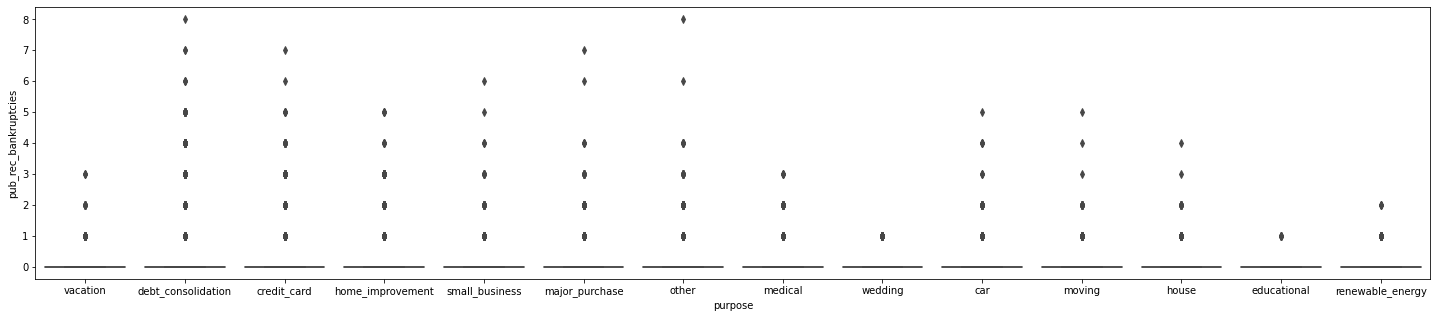

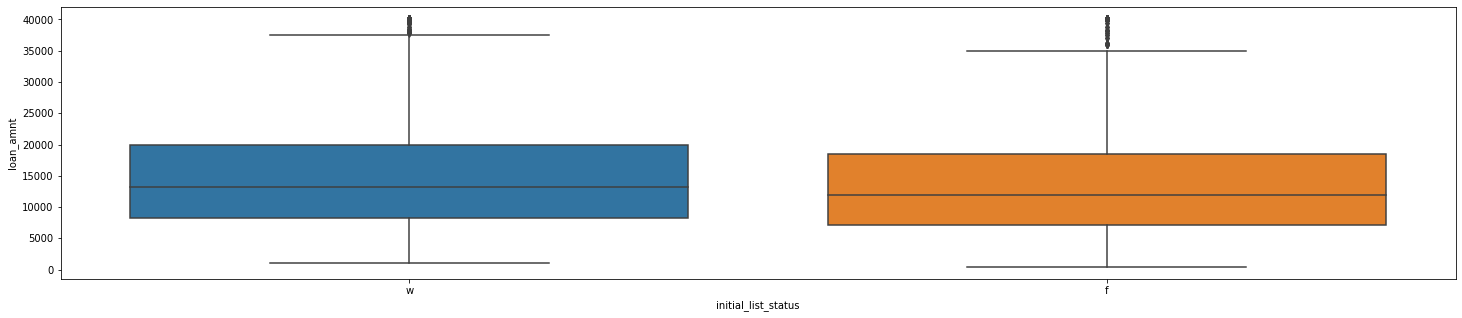

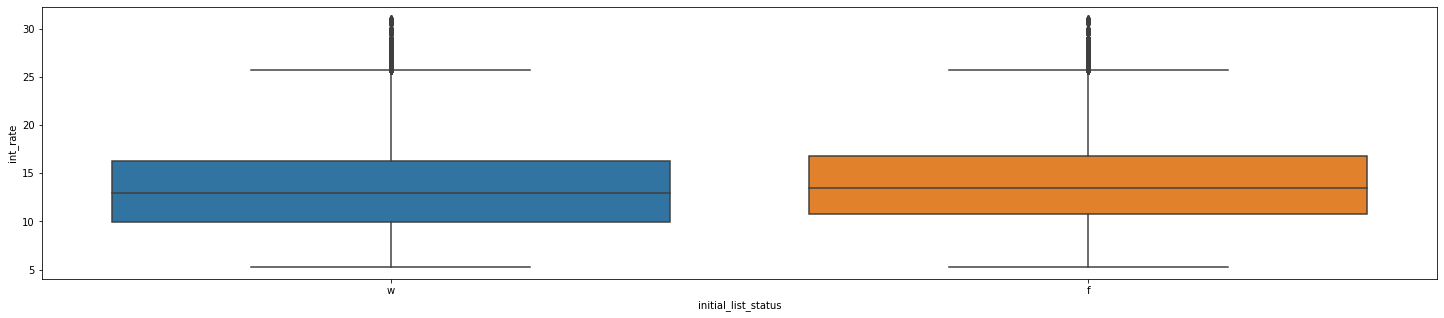

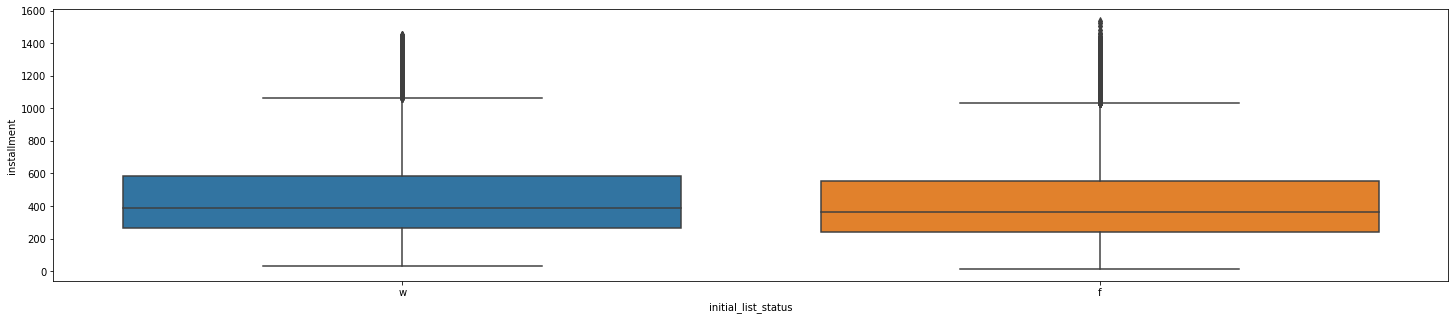

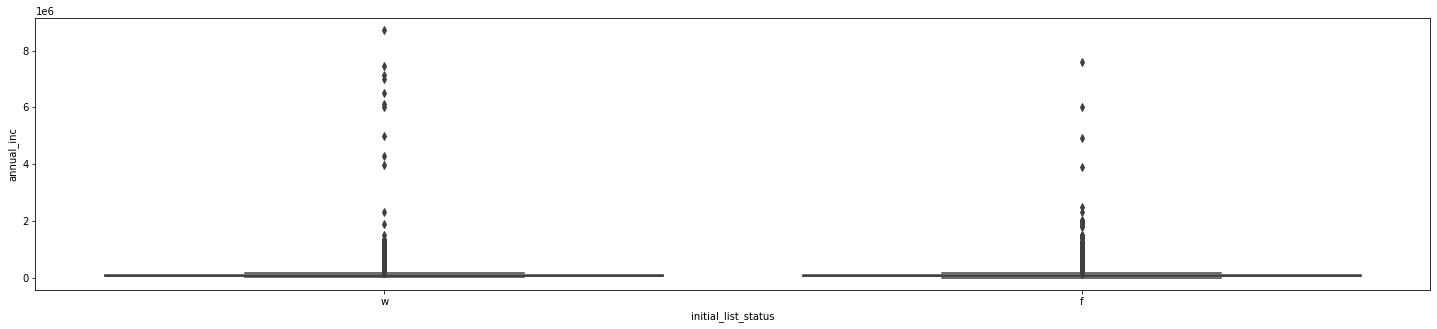

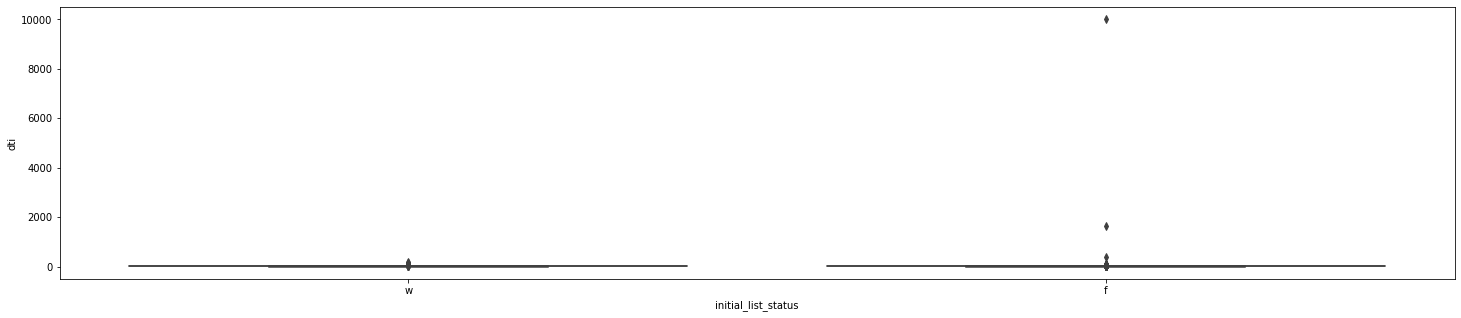

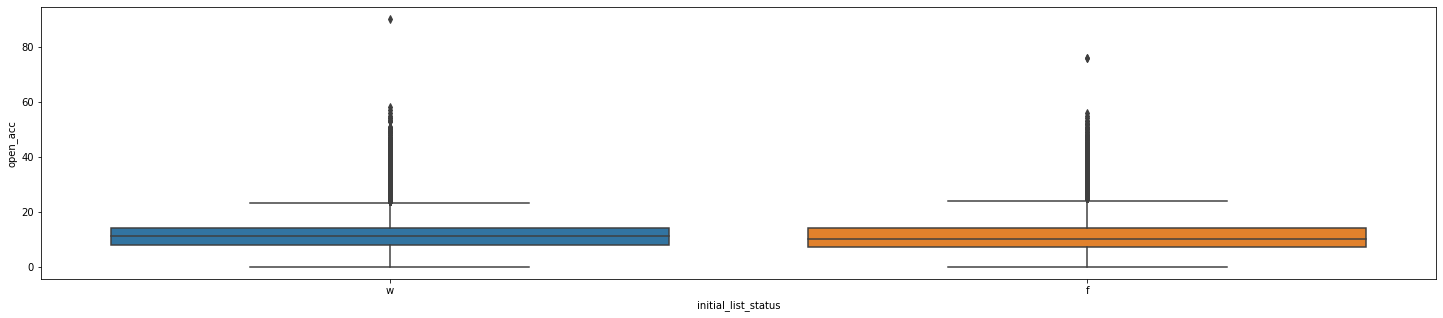

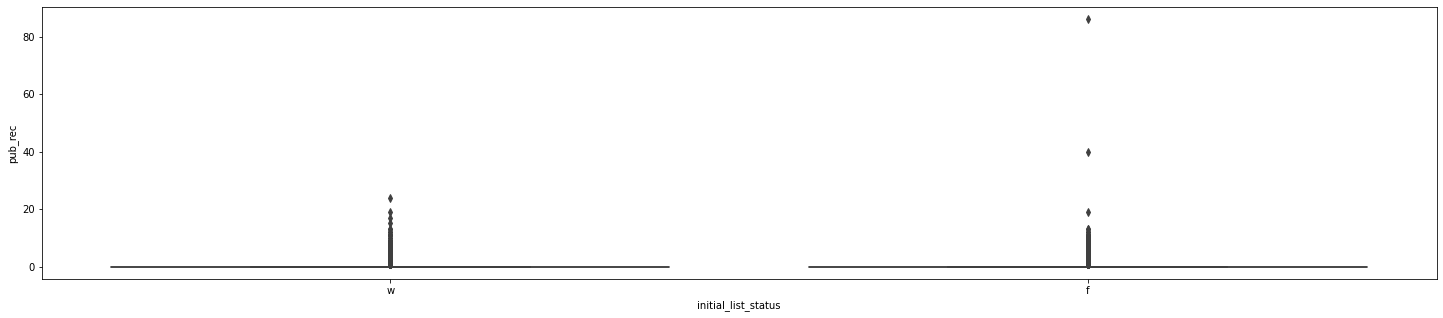

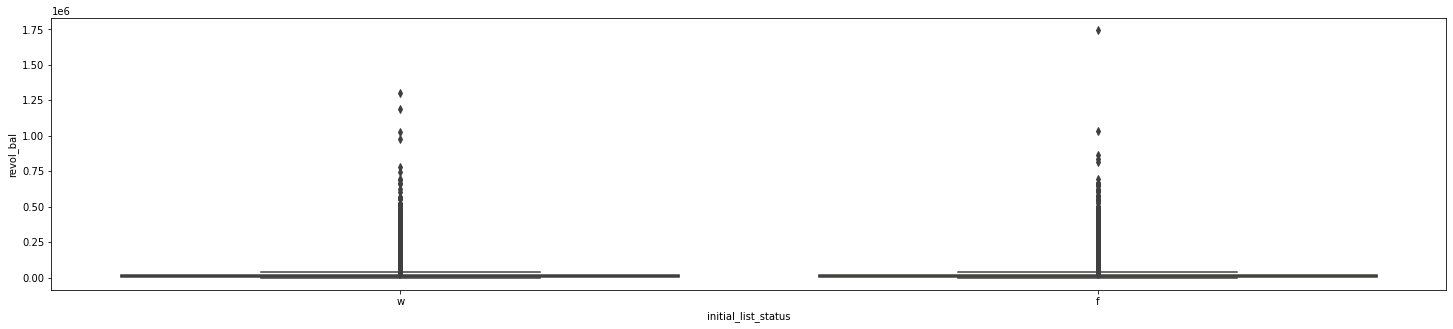

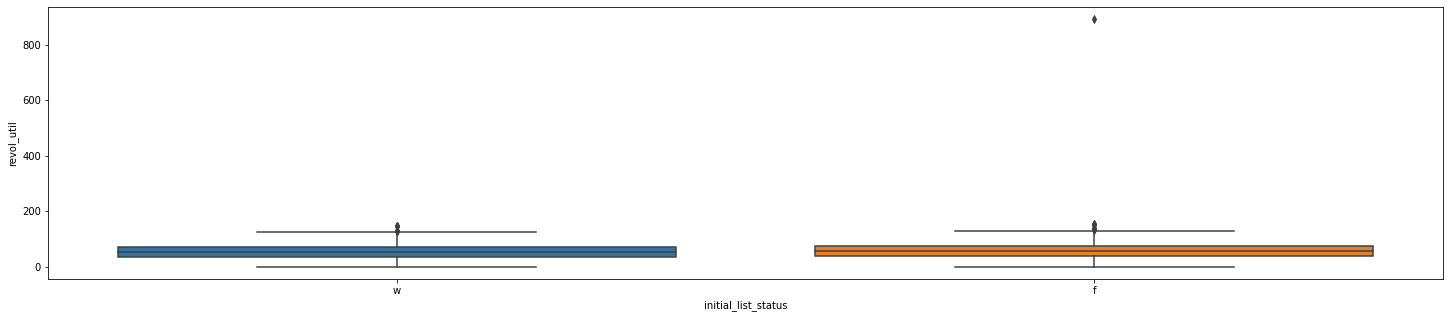

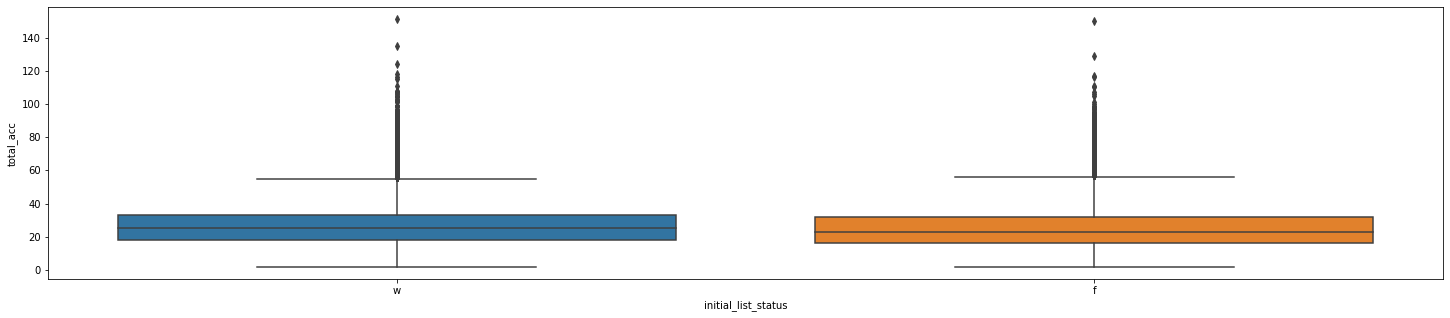

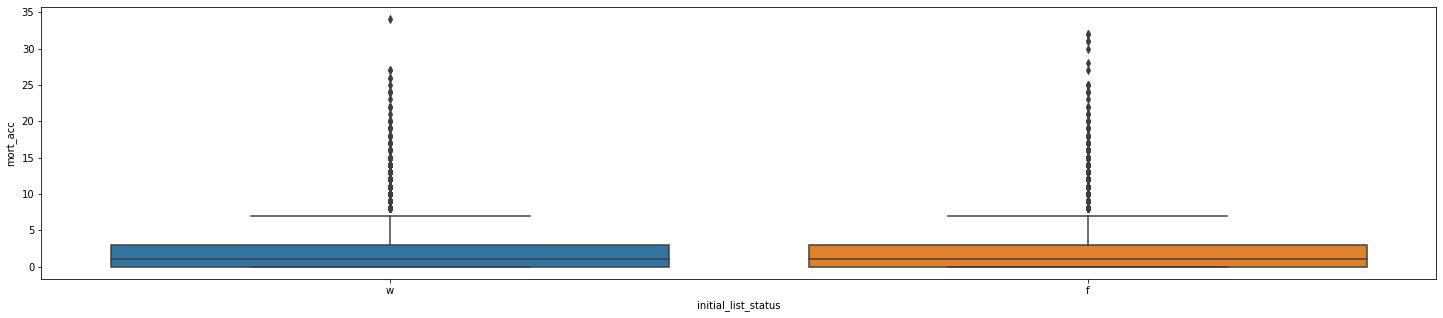

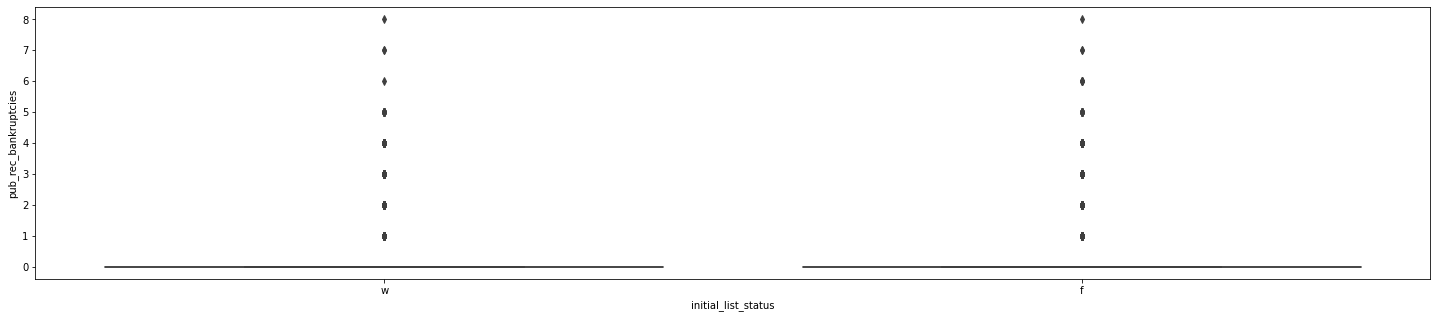

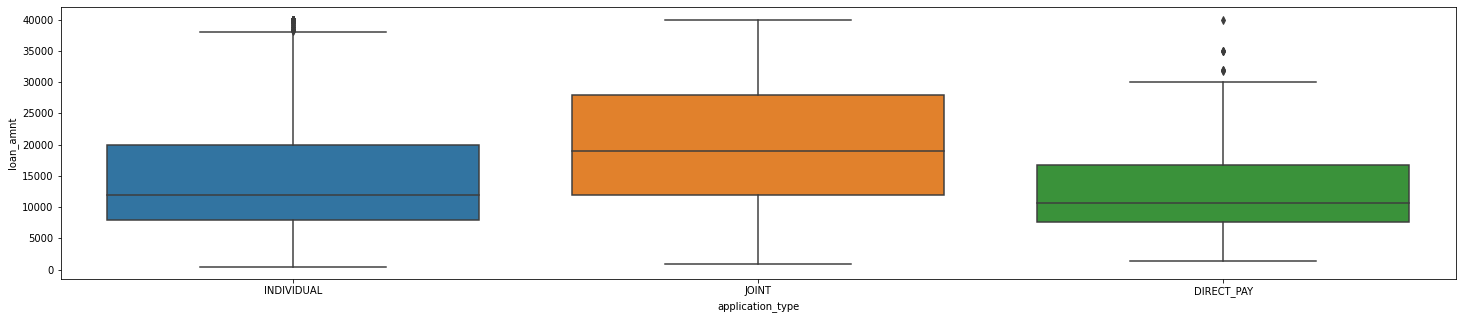

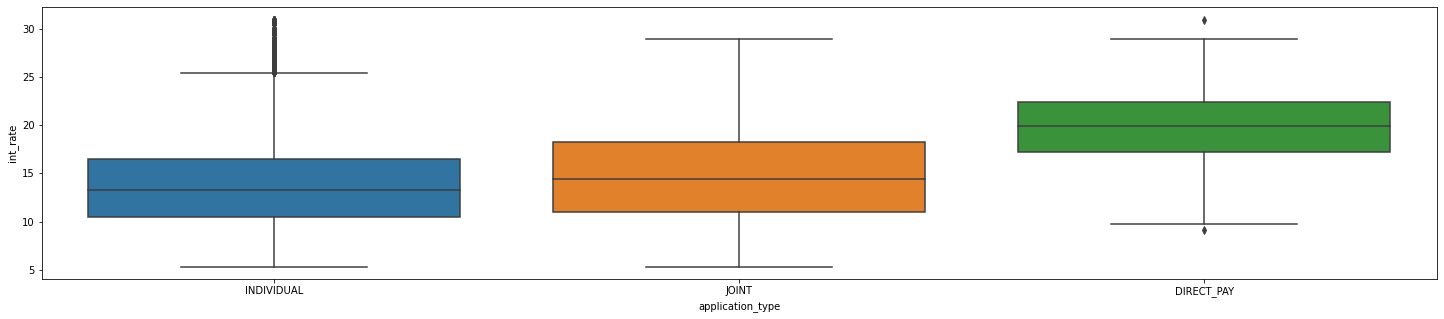

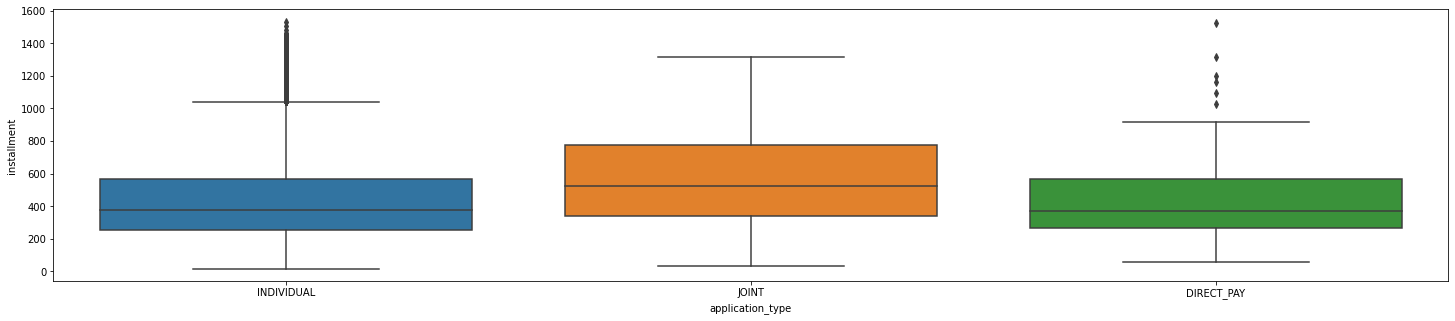

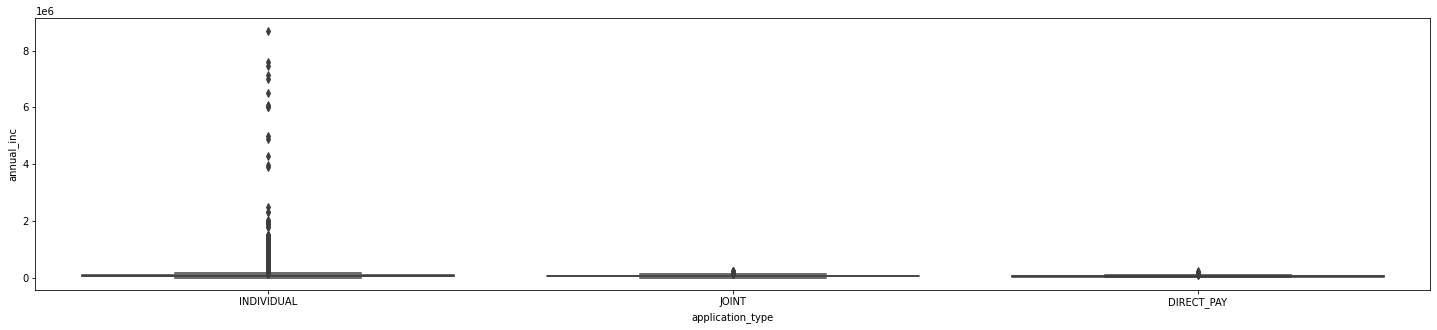

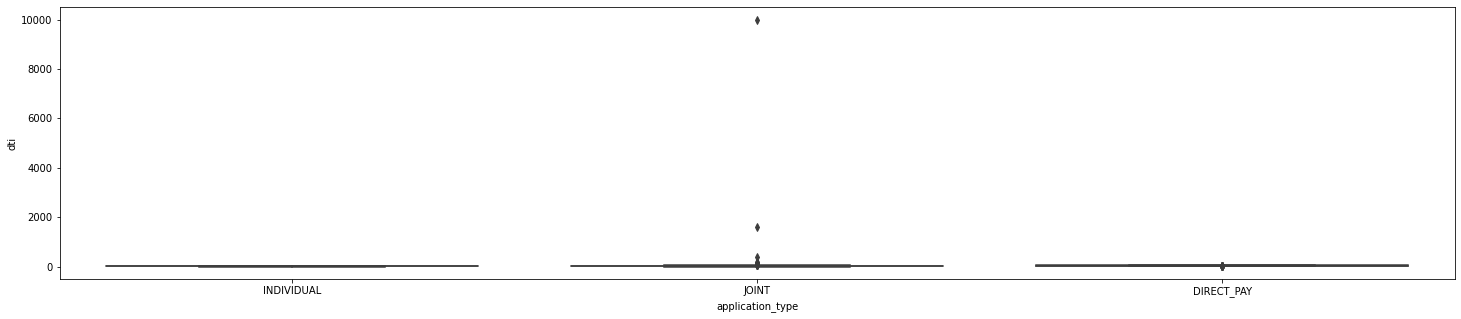

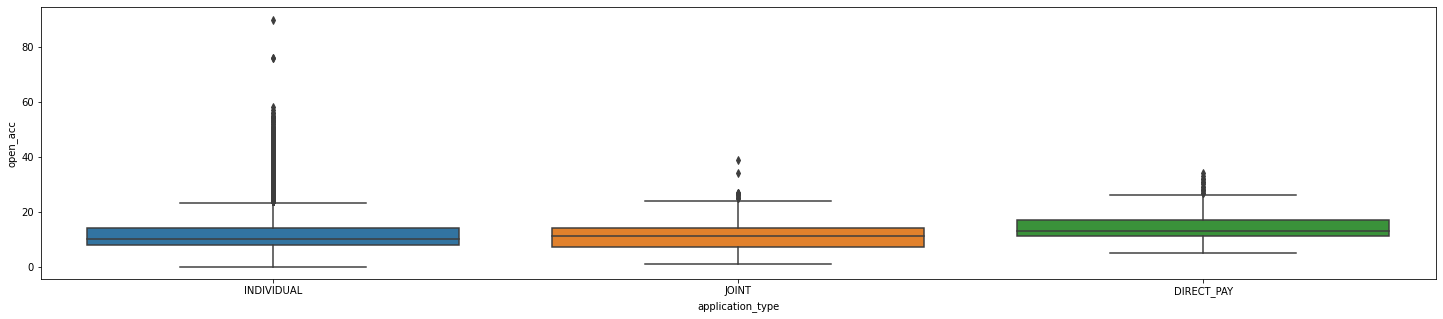

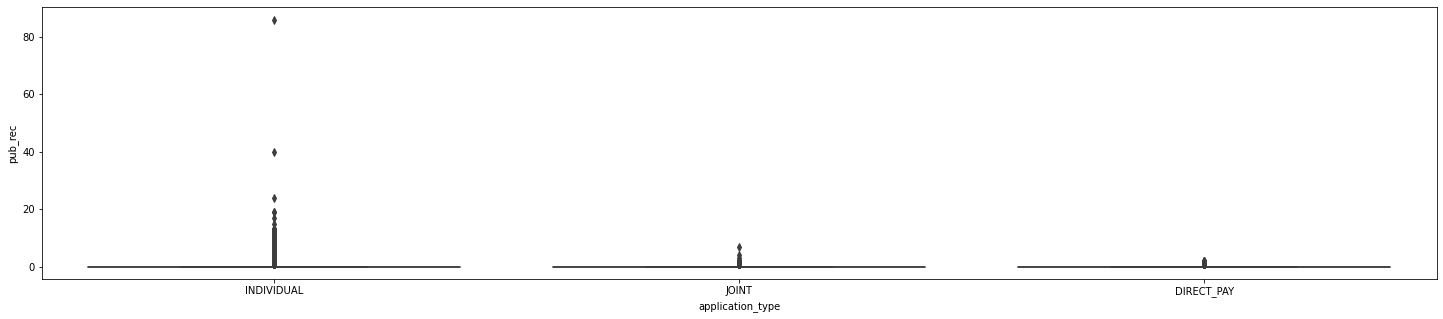

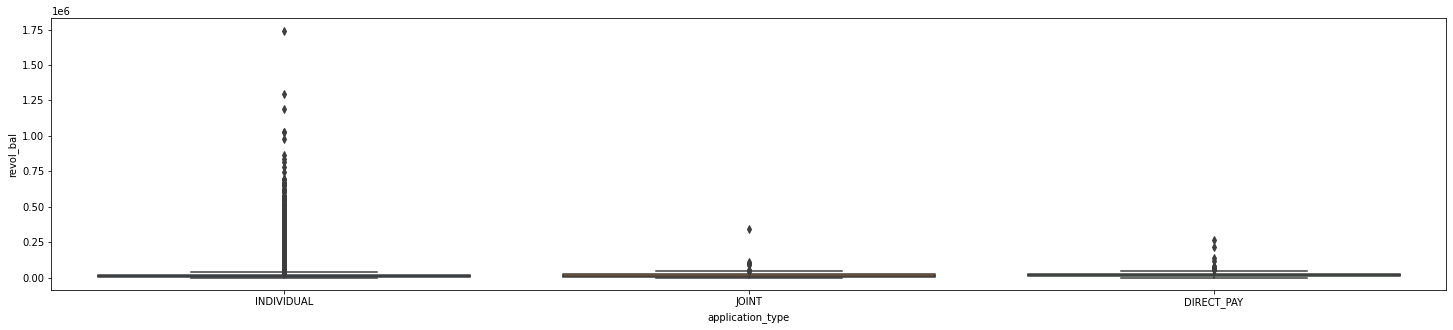

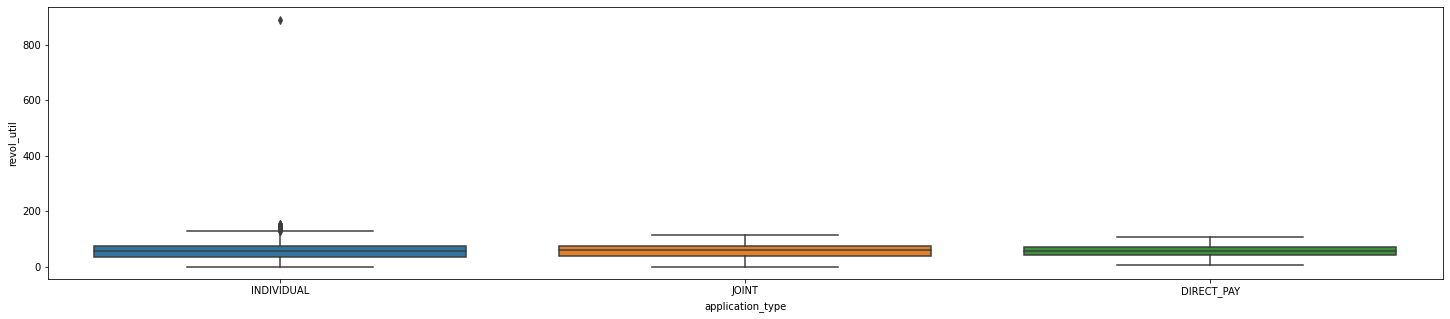

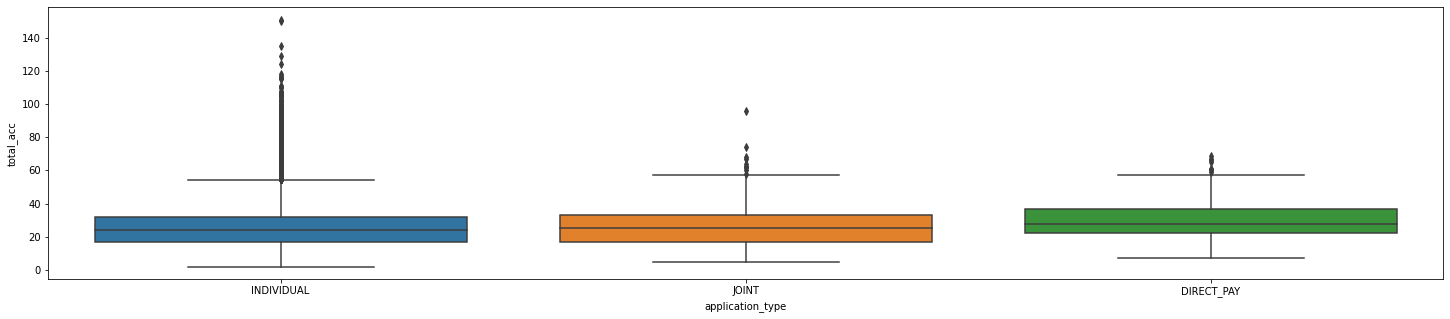

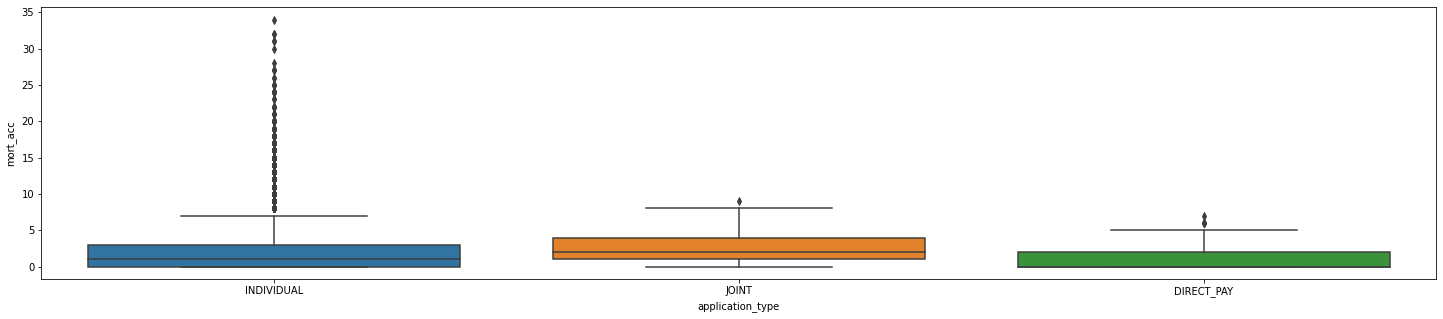

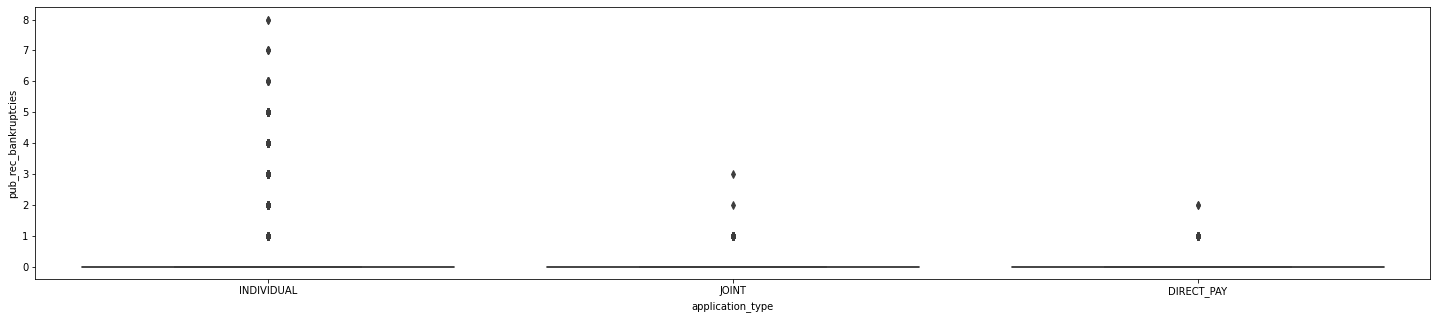

In [ ]:
for i in range (c):
  for j in range (n):

    plt.figure(figsize = (25,5))
    sns.boxplot(x = cat_cols[i] , y = num_col[j] , data =df)
    plt.show()

# **Multivariate**

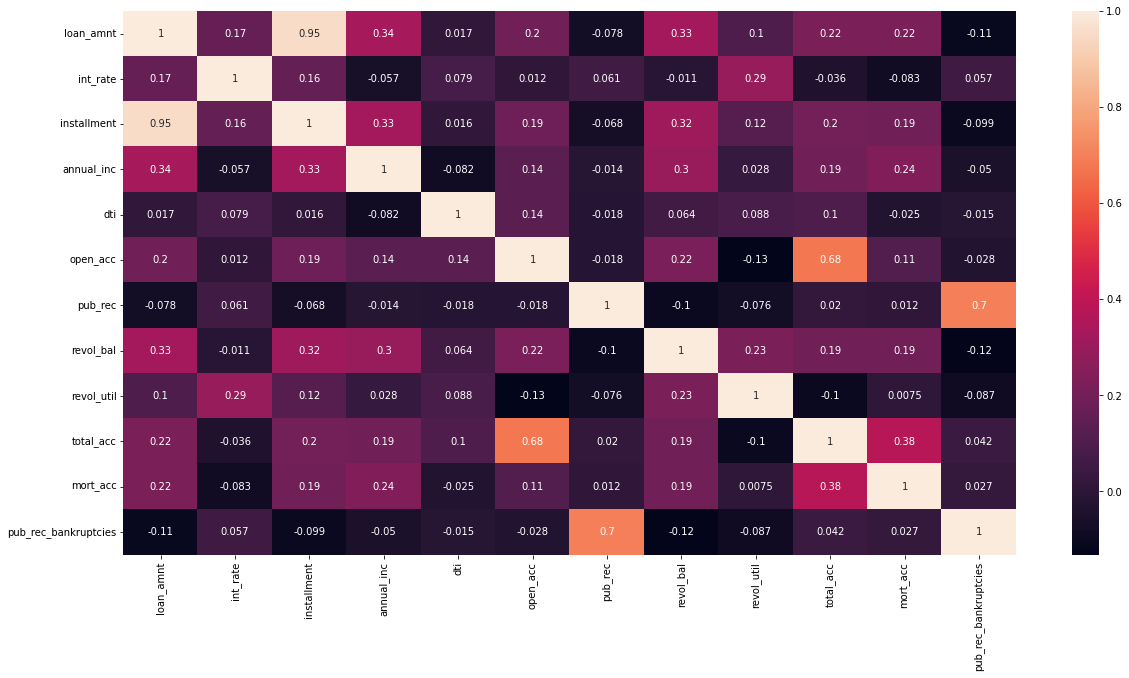

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data = df.corr() , annot=True)
plt.show()

# **Loan_Status**

In [ ]:
df["loan_status"]

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [ ]:
df["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [ ]:
c = len(cat_col)
c

12

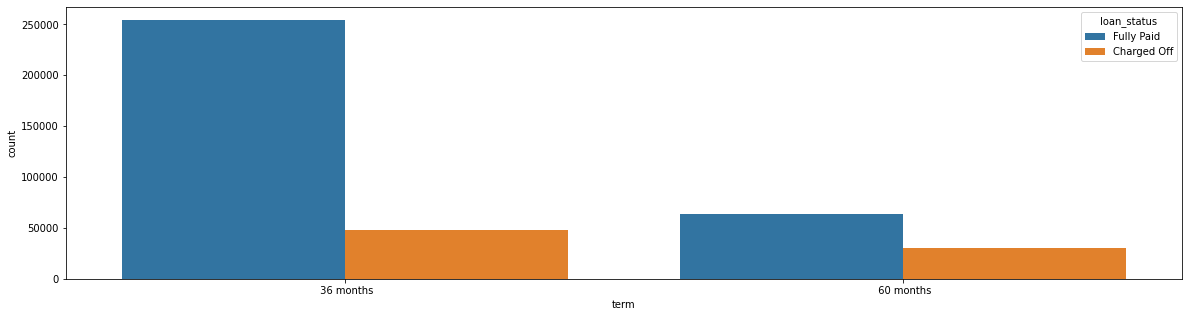


**************************************************



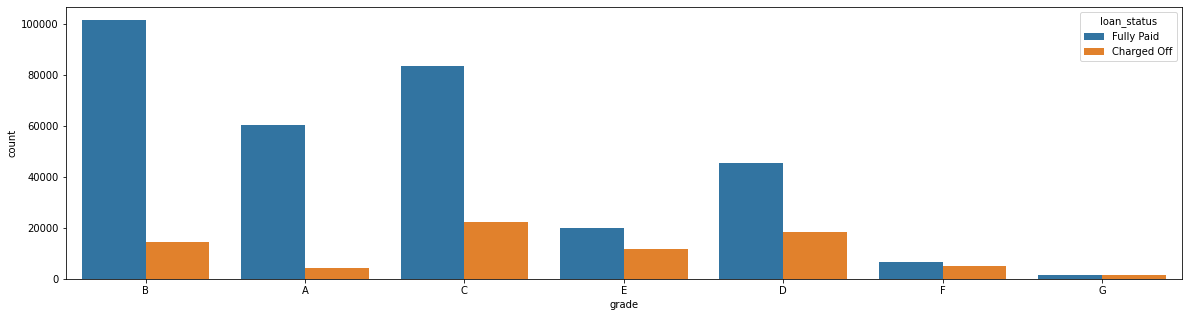


**************************************************



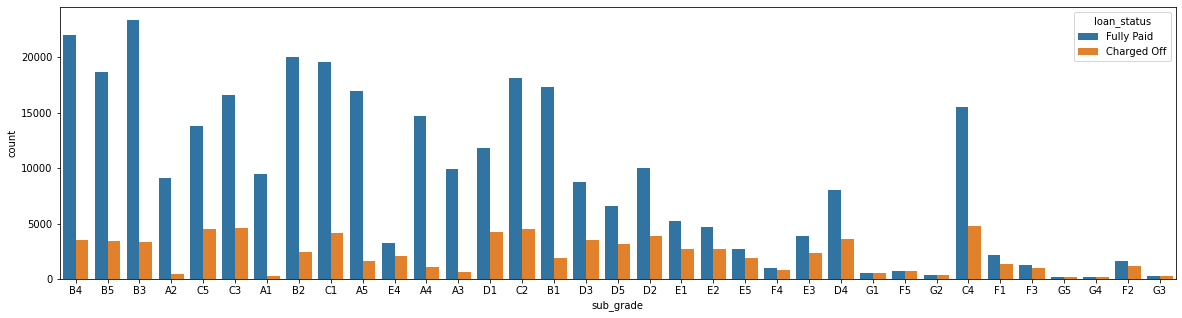


**************************************************



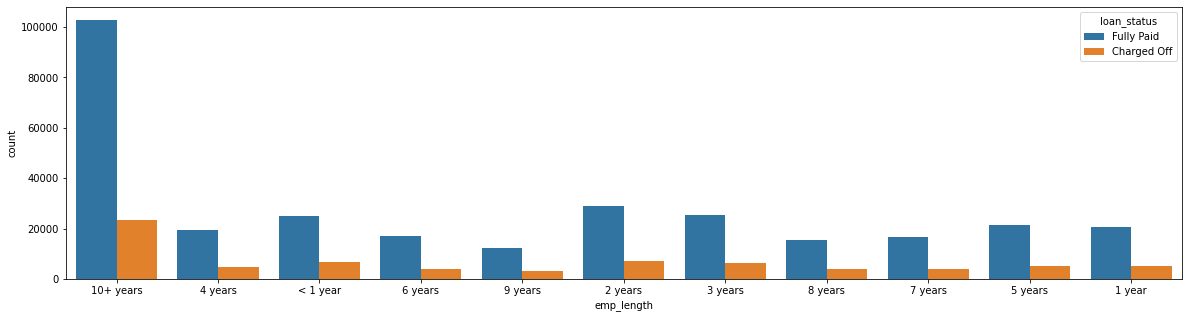


**************************************************



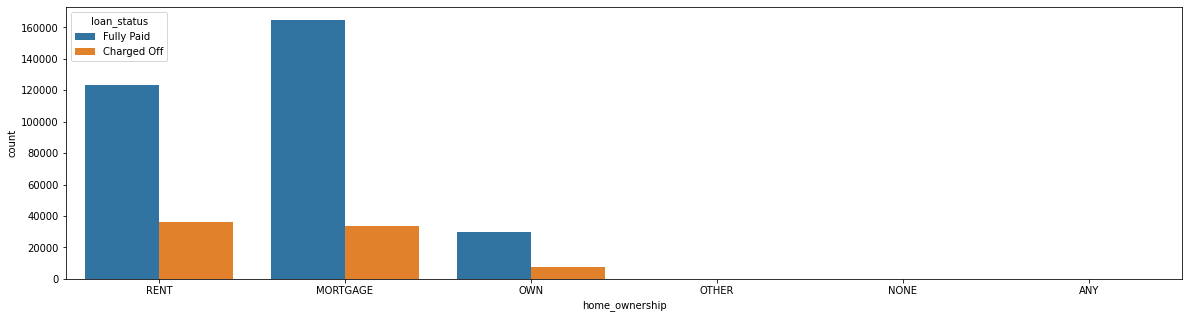


**************************************************



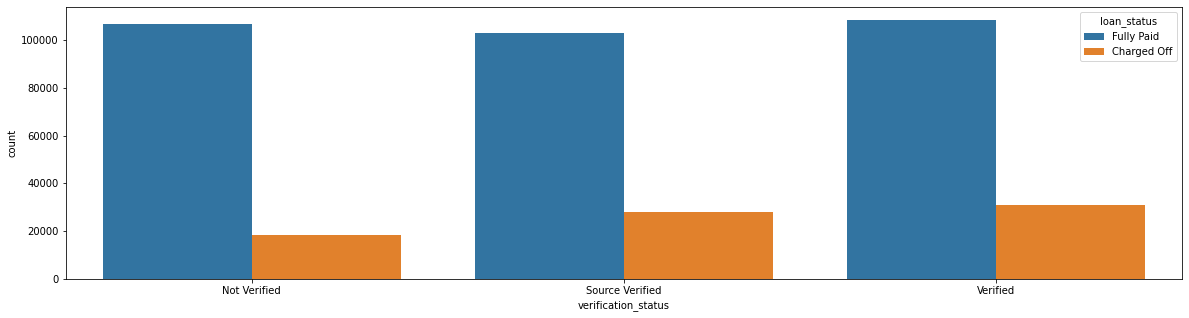


**************************************************



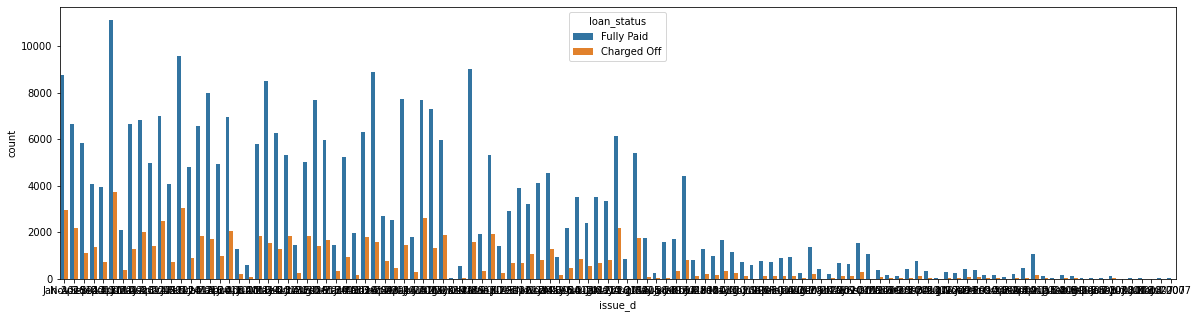


**************************************************



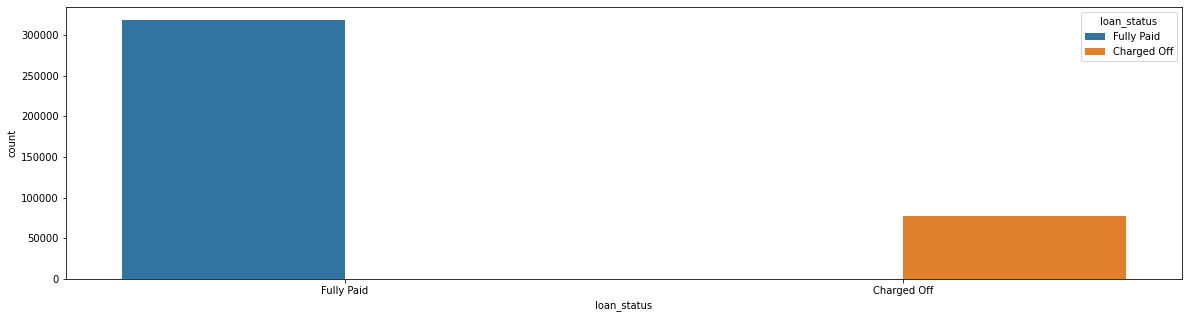


**************************************************



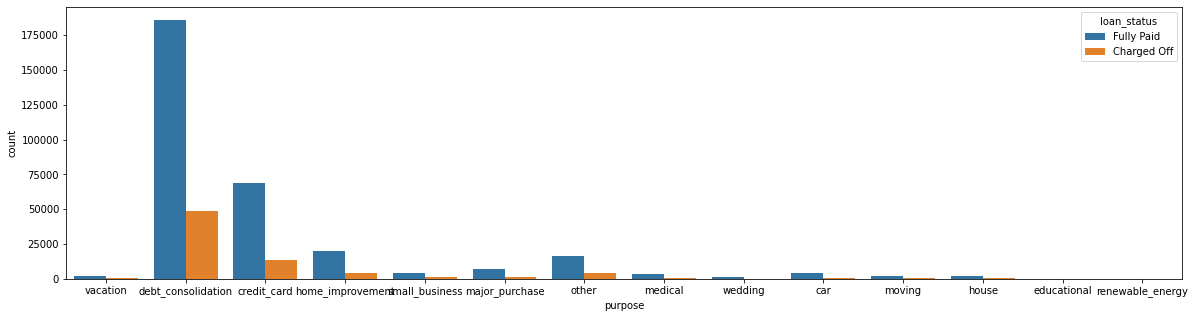


**************************************************



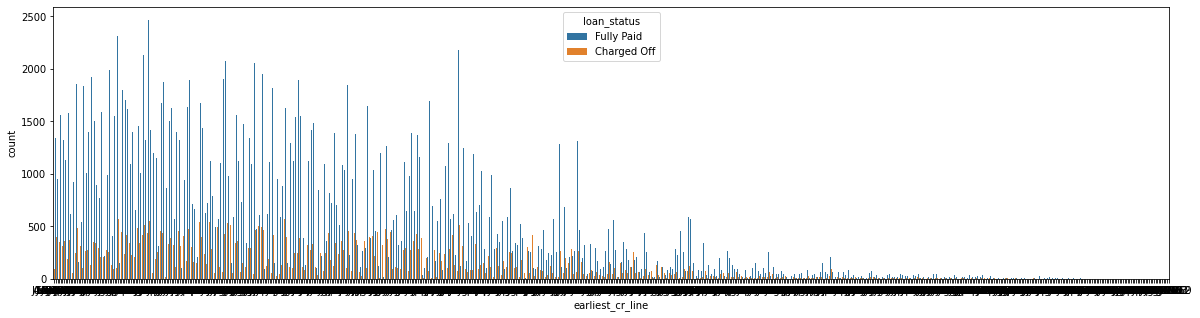


**************************************************



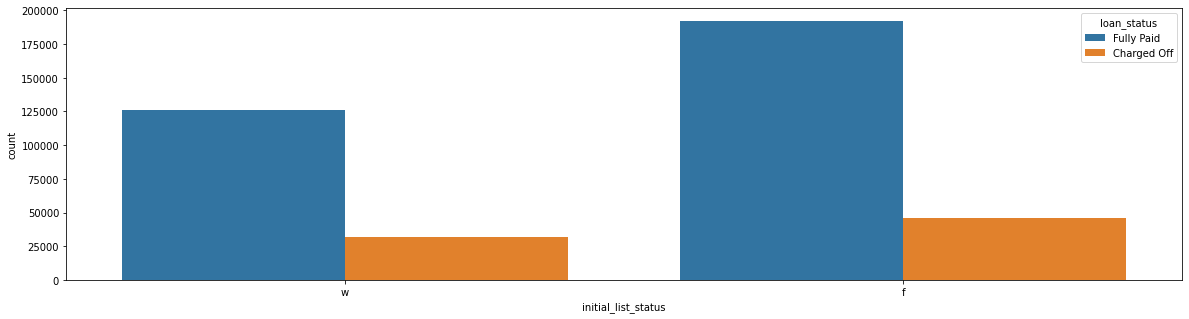


**************************************************



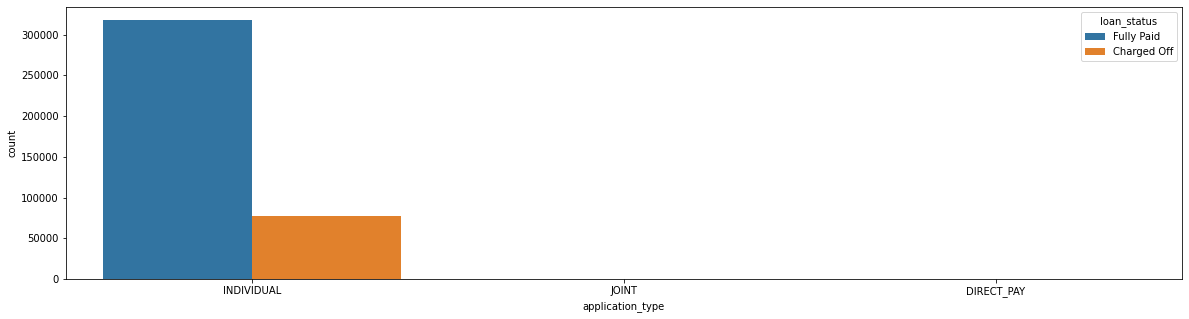


**************************************************



In [ ]:
for i in range (c):

  plt.figure(figsize = (20,5))
  sns.countplot(x=df[cat_col[i]] , hue = "loan_status" , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

# **Range of Attributes**

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  print("MIN :- " , df[num].min())
  print("MAX :- " , df[num].max())
  print("MEAN :- " , df[num].mean())
  print("MEDIAN :-" , df[num].median())
  print("")

loan_amnt
MIN :-  500.0
MAX :-  40000.0
MEAN :-  14113.888089286165
MEDIAN :- 12000.0

int_rate
MIN :-  5.32
MAX :-  30.99
MEAN :-  13.6394000454511
MEDIAN :- 13.33

installment
MIN :-  16.08
MAX :-  1533.81
MEAN :-  431.84969802792716
MEDIAN :- 375.43

annual_inc
MIN :-  0.0
MAX :-  8706582.0
MEAN :-  74203.17579771738
MEDIAN :- 64000.0

dti
MIN :-  0.0
MAX :-  9999.0
MEAN :-  17.379513647955967
MEDIAN :- 16.91

open_acc
MIN :-  0.0
MAX :-  90.0
MEAN :-  11.31115319546499
MEDIAN :- 10.0

pub_rec
MIN :-  0.0
MAX :-  86.0
MEAN :-  0.17819104613286874
MEDIAN :- 0.0

revol_bal
MIN :-  0.0
MAX :-  1743266.0
MEAN :-  15844.539853041437
MEDIAN :- 11181.0

revol_util
MIN :-  0.0
MAX :-  892.3
MEAN :-  53.79174863677942
MEDIAN :- 54.8

total_acc
MIN :-  2.0
MAX :-  151.0
MEAN :-  25.41474383253794
MEDIAN :- 24.0

mort_acc
MIN :-  0.0
MAX :-  34.0
MEAN :-  1.8139908160844138
MEDIAN :- 1.0

pub_rec_bankruptcies
MIN :-  0.0
MAX :-  8.0
MEAN :-  0.12164755559488742
MEDIAN :- 0.0



# **Feature Engineering**

In [ ]:
df["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [ ]:
df1["term"] = df1["term"].str.extract("(\d*\.?\d+)", expand=True)

In [ ]:
df1["term"].value_counts()

36    302005
60     94025
Name: term, dtype: int64

### **Pub_rec**

In [ ]:
df["pub_rec"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec, Length: 396030, dtype: float64

In [ ]:
df["pub_rec"].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [ ]:
df.loc[df["pub_rec"] == 0.0 ,"pub_rec"] = 0

In [ ]:
df.loc[df["pub_rec"] >= 1.0 , "pub_rec"] = 1

In [ ]:
df["pub_rec"].value_counts()

0.0    338272
1.0     57758
Name: pub_rec, dtype: int64

### **Mort_acc**

In [ ]:
df["mort_acc"]

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [ ]:
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.loc[df["mort_acc"] == 0.0 ,"mort_acc"] = 0

In [ ]:
df.loc[df["mort_acc"] >= 1.0 ,"mort_acc"] = 1

In [ ]:
df["mort_acc"].value_counts()

1.0    218458
0.0    139777
Name: mort_acc, dtype: int64

### **Pub_rec_bankruptcies**

In [ ]:
df["pub_rec_bankruptcies"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

In [ ]:
df["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
df.loc[df["pub_rec_bankruptcies"] == 0.0 ,"pub_rec_bankruptcies"] = 0

In [ ]:
df.loc[df["pub_rec_bankruptcies"] >= 1.0 , "pub_rec_bankruptcies"] = 1

In [ ]:
df["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     45115
Name: pub_rec_bankruptcies, dtype: int64

# **Outliers**

loan_amnt


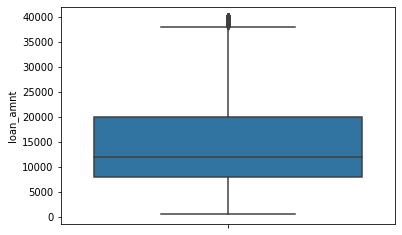

******************************************************************************************************************************************************
int_rate


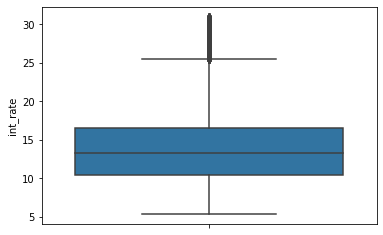

******************************************************************************************************************************************************
installment


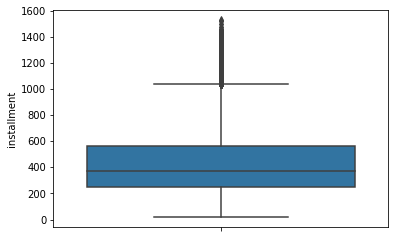

******************************************************************************************************************************************************
annual_inc


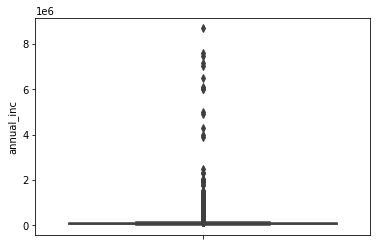

******************************************************************************************************************************************************
dti


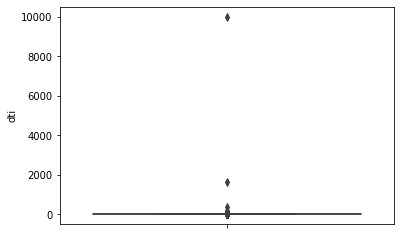

******************************************************************************************************************************************************
open_acc


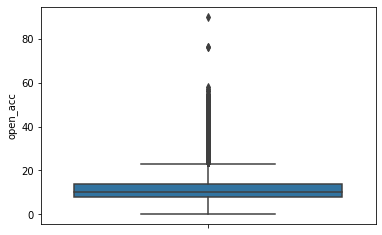

******************************************************************************************************************************************************
pub_rec


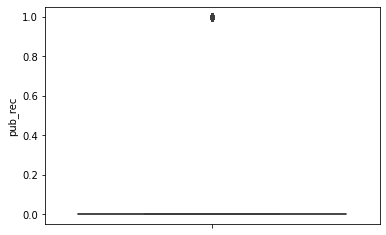

******************************************************************************************************************************************************
revol_bal


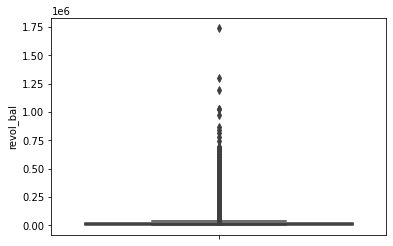

******************************************************************************************************************************************************
revol_util


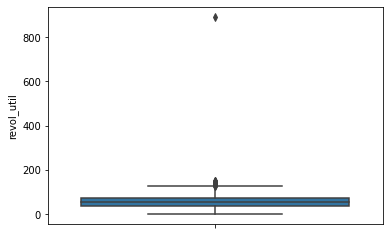

******************************************************************************************************************************************************
total_acc


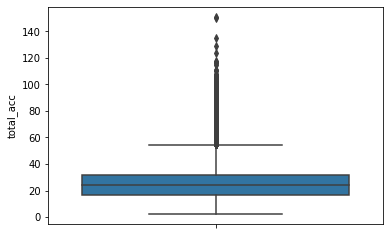

******************************************************************************************************************************************************
mort_acc


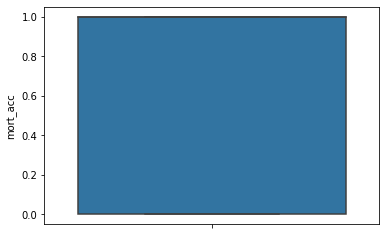

******************************************************************************************************************************************************
pub_rec_bankruptcies


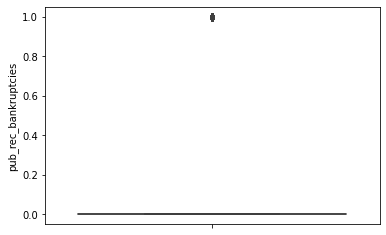

******************************************************************************************************************************************************


In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  sns.boxplot(y = num , data = df )
  plt.show()
  print("*"*150)

# **Ouliers Treatment**

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col


['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
l = len(num_col)

outliers = 191
no_outliers = 395839

percent_outliers = 0.04822866954523647


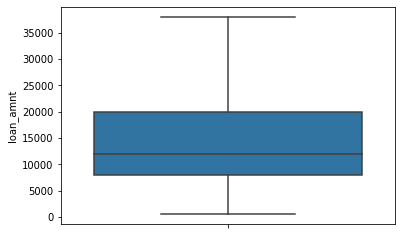


******************************************************************************************************************************************************
outliers = 3777
no_outliers = 392253

percent_outliers = 0.9537156276039694


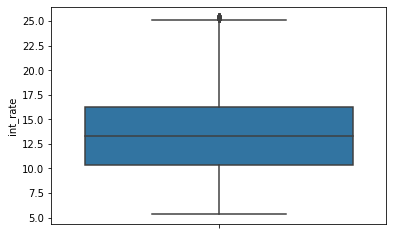


******************************************************************************************************************************************************
outliers = 11250
no_outliers = 384780

percent_outliers = 2.8406938868267555


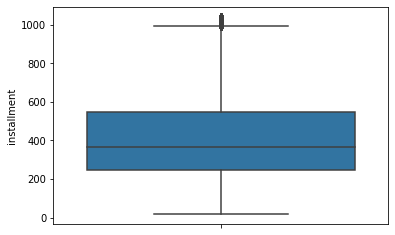


******************************************************************************************************************************************************
outliers = 16700
no_outliers = 379330

percent_outliers = 4.216852258667273


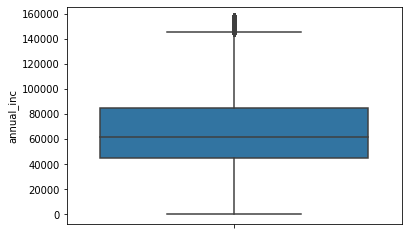


******************************************************************************************************************************************************
outliers = 275
no_outliers = 395755

percent_outliers = 0.06943918390020958


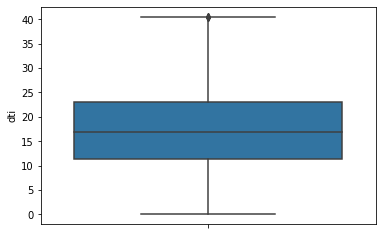


******************************************************************************************************************************************************
outliers = 10307
no_outliers = 385723

percent_outliers = 2.602580612579855


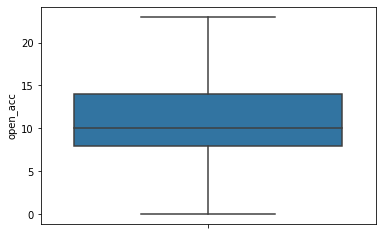


******************************************************************************************************************************************************
outliers = 57758
no_outliers = 338272

percent_outliers = 14.5842486680302


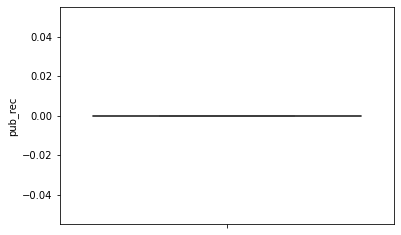


******************************************************************************************************************************************************
outliers = 21259
no_outliers = 374771

percent_outliers = 5.368027674671111


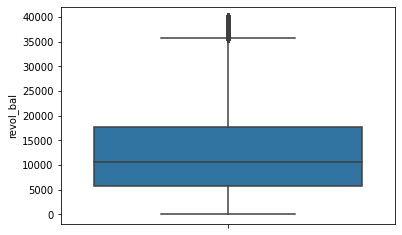


******************************************************************************************************************************************************
outliers = 0
no_outliers = 0

percent_outliers = 0.0


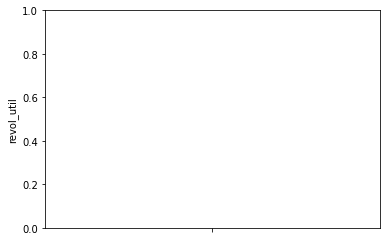


******************************************************************************************************************************************************
outliers = 8499
no_outliers = 387531

percent_outliers = 2.1460495417013865


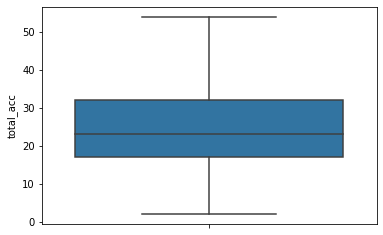


******************************************************************************************************************************************************
outliers = 0
no_outliers = 0

percent_outliers = 0.0


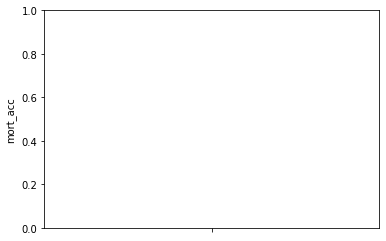


******************************************************************************************************************************************************
outliers = 0
no_outliers = 0

percent_outliers = 0.0


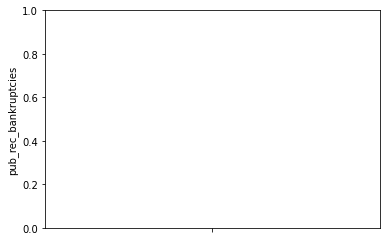


******************************************************************************************************************************************************


In [ ]:
for i in (num_col):
  a = np.percentile(df[i] , 25)
  b = np.percentile(df[i] , 50)
  c = np.percentile(df[i] , 75)

  iqr = c-a

  lower = max((a-1.5*iqr) , 0)
  upper = (c + 1.5*iqr)

  outliers = df[(df[i] < lower) | (df[i] > upper)]
  no_outliers = df[(df[i] >= lower) & (df[i] <= upper)]

  print("outliers =" ,len(outliers))
  print("no_outliers =" ,len(no_outliers))
  print()
  print("percent_outliers =" ,(len(outliers)/len(df))*100)


  sns.boxplot(data = no_outliers , y = i)
  plt.show()

  print()
  print("*"*150)

# **Duplicate Value Check**

In [ ]:
df.duplicated().sum()

0

# **Missing Value**

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
percent_missing = (df.isnull().sum()/len(df))*100
percent_missing

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

In [ ]:
type(percent_missing)

pandas.core.series.Series

In [ ]:
miss = ["emp_length" , "revol_util"  , "mort_acc" , "pub_rec_bankruptcies"]
miss

['emp_length', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']

In [ ]:
num = []
cat = []

for i in miss:
  if (df[i].dtype != "object"):
    num.append(i) 
  else:
    cat.append(i)

### **NUM**

In [ ]:
num

['revol_util', 'mort_acc', 'pub_rec_bankruptcies']

revol_util 1226

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64



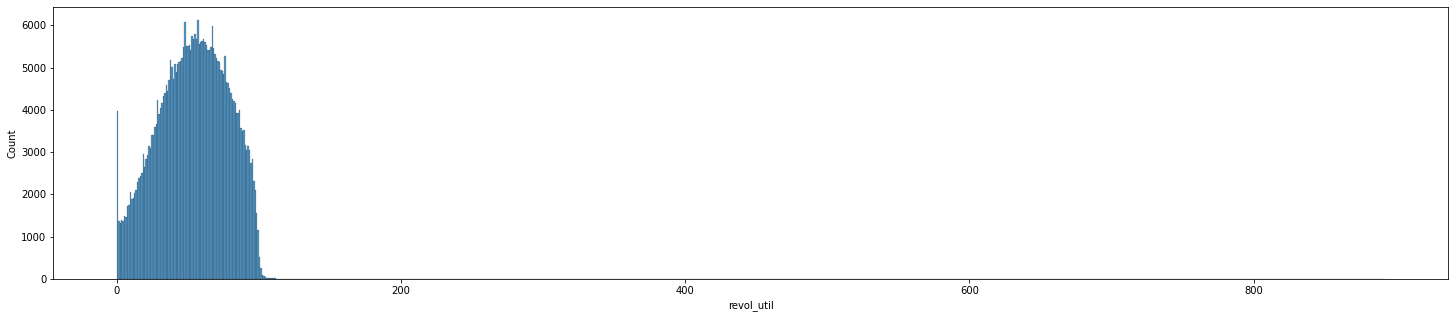

Mean :-  53.79174863677942
Median :-  54.8
******************************************************************************************************************************************************
mort_acc 2

1.0    218458
0.0    139777
Name: mort_acc, dtype: int64



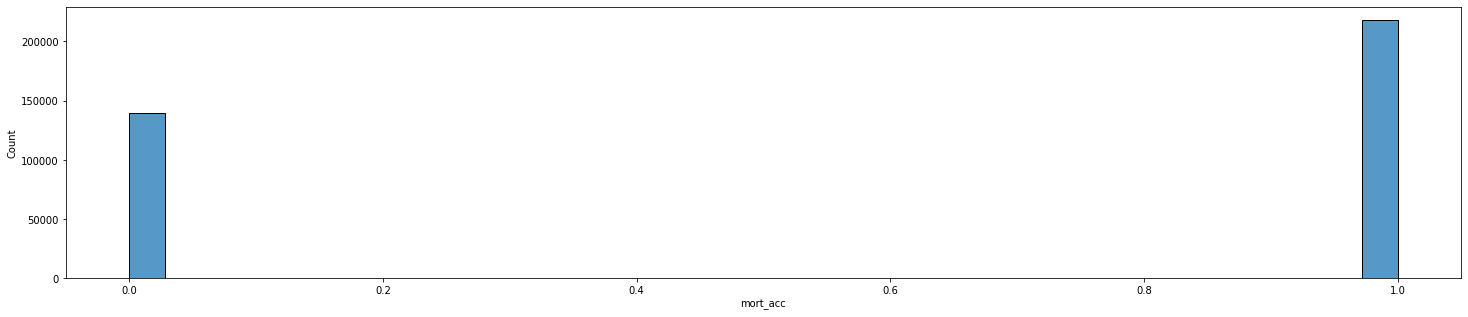

Mean :-  0.609817577846944
Median :-  1.0
******************************************************************************************************************************************************
pub_rec_bankruptcies 2

0.0    350380
1.0     45115
Name: pub_rec_bankruptcies, dtype: int64



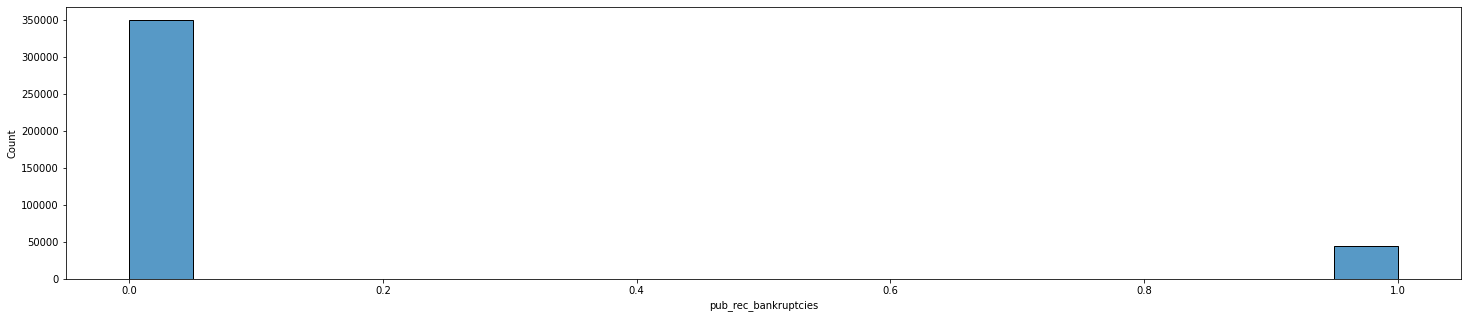

Mean :-  0.11407223858708707
Median :-  0.0
******************************************************************************************************************************************************


In [ ]:
for i in num:
  print(i , df[i].nunique())
  print()
  print(df[i].value_counts())
  print()
  plt.figure(figsize = (25,5))
  sns.histplot(x = i , data =df)
  plt.show()
  print("Mean :- " , df[i].mean())
  print("Median :- " ,df[i].median())
  print("*"*150)

### **CAT**

In [ ]:
cat

['emp_length']

emp_length 11

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64



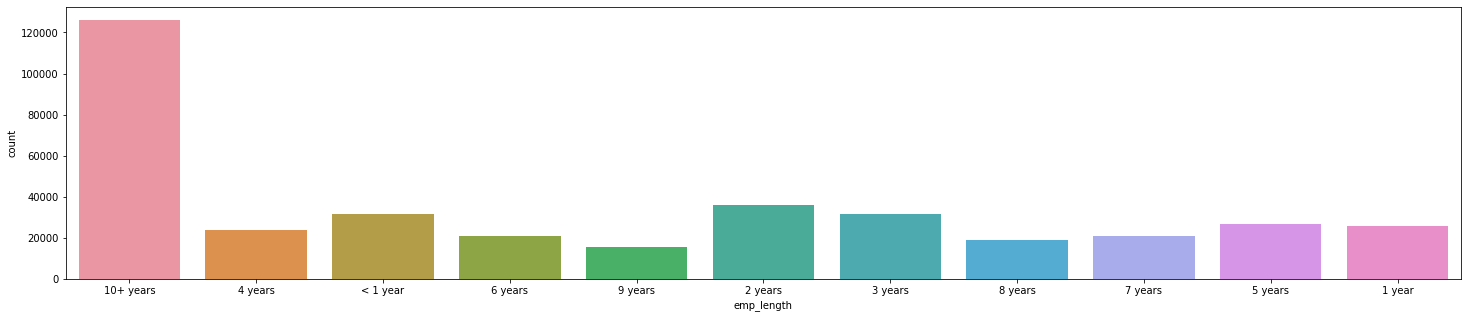

******************************************************************************************************************************************************


In [ ]:
for i in cat:
  print(i , df[i].nunique())
  print()
  print(df[i].value_counts())
  print()
  plt.figure(figsize = (25,5))
  sns.countplot(x = i , data =df)
  plt.show()
  print("*"*150)

# **Missing Value Imputation**

In [ ]:
miss

['emp_length', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']

In [ ]:
df[["emp_length"]] = SimpleImputer(strategy='most_frequent').fit_transform(df[["emp_length"]])

In [ ]:
df[["revol_util"]] = SimpleImputer(strategy='mean').fit_transform(df[["revol_util"]])

In [ ]:
df[["mort_acc"]] = SimpleImputer(strategy='most_frequent').fit_transform(df[["mort_acc"]])

In [ ]:
df[["pub_rec_bankruptcies"]] = SimpleImputer(strategy='most_frequent').fit_transform(df[["pub_rec_bankruptcies"]])

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

# **Standard Scaling**

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
scaler = StandardScaler()

In [ ]:
ss = scaler.fit_transform(df[num_col])

In [ ]:
ss = pd.DataFrame(ss , columns = df[num_col].columns)

In [ ]:
ss.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.492243,-0.491799,-0.408291,0.694330,0.491728,0.912646,-0.413212,0.996729,-0.490588,-0.034891,-1.353994,-0.358558
1,-0.731551,-0.368816,-0.662750,-0.149311,0.259197,1.107287,-0.413212,0.208163,-0.020118,0.133361,0.738556,-0.358558
2,0.177819,-0.704225,0.299609,-0.505312,-0.254703,0.328720,-0.413212,-0.187334,1.571298,0.049235,-1.353994,-0.358558
3,-0.827274,-1.598649,-0.842348,-0.327774,-0.820215,-1.033772,-0.413212,-0.503722,-1.321070,-1.044399,-1.353994,-0.358558
4,1.227783,0.811824,0.707861,-0.311550,0.919608,0.328720,-0.413212,0.424414,0.654905,1.479372,0.738556,-0.358558


In [ ]:
ss.mean()

loan_amnt              -6.279574e-20
int_rate                2.750633e-16
installment             6.668907e-17
annual_inc             -6.375472e-16
dti                    -2.429836e-16
open_acc               -1.621207e-16
pub_rec                 5.547555e-17
revol_bal              -3.401735e-17
revol_util              7.337951e-16
total_acc              -9.138574e-17
mort_acc                1.126376e-16
pub_rec_bankruptcies   -4.518602e-17
dtype: float64

In [ ]:
ss.std()

loan_amnt               1.000001
int_rate                1.000001
installment             1.000001
annual_inc              1.000001
dti                     1.000001
open_acc                1.000001
pub_rec                 1.000001
revol_bal               1.000001
revol_util              1.000001
total_acc               1.000001
mort_acc                1.000001
pub_rec_bankruptcies    1.000001
dtype: float64

# **MinMax Scaling**

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
mm = scaler.fit_transform(df[num_col])

In [ ]:
mm = pd.DataFrame(mm , columns = df[num_col].columns)

In [ ]:
mm.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,0.240506,0.238411,0.206493,0.013438,0.002624,0.177778,0.0,0.020863,0.046845,0.154362,0.0,0.0
1,0.189873,0.259836,0.164456,0.007466,0.002205,0.188889,0.0,0.011548,0.059733,0.167785,1.0,0.0
2,0.382278,0.201402,0.323437,0.004945,0.001279,0.144444,0.0,0.006876,0.103328,0.161074,0.0,0.0
3,0.169620,0.045578,0.134787,0.006202,0.000260,0.066667,0.0,0.003139,0.024095,0.073826,0.0,0.0
4,0.604430,0.465524,0.390880,0.006317,0.003395,0.144444,0.0,0.014102,0.078225,0.275168,1.0,0.0


In [ ]:
mm.mean()

loan_amnt               0.344655
int_rate                0.324090
installment             0.273942
annual_inc              0.008523
dti                     0.001738
open_acc                0.125679
pub_rec                 0.145842
revol_bal               0.009089
revol_util              0.060284
total_acc               0.157146
mort_acc                0.647055
pub_rec_bankruptcies    0.113918
dtype: float64

In [ ]:
mm.std()

loan_amnt               0.211581
int_rate                0.174217
installment             0.165199
annual_inc              0.007079
dti                     0.001802
open_acc                0.057085
pub_rec                 0.352949
revol_bal               0.011812
revol_util              0.027394
total_acc               0.079778
mort_acc                0.477887
pub_rec_bankruptcies    0.317712
dtype: float64

# **Model Modelling**

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [ ]:
df_cat = pd.DataFrame(df[cat_col])

In [ ]:
df_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type
0,36 months,B,B4,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL
2,36 months,B,B3,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL
3,36 months,A,A2,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL
4,60 months,C,C5,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL


In [ ]:
df_cat = df_cat.drop(["loan_status" , "issue_d" , "earliest_cr_line" ] , axis = 1)

In [ ]:
df_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,36 months,B,B4,10+ years,RENT,Not Verified,vacation,w,INDIVIDUAL
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,debt_consolidation,f,INDIVIDUAL
2,36 months,B,B3,< 1 year,RENT,Source Verified,credit_card,f,INDIVIDUAL
3,36 months,A,A2,6 years,RENT,Not Verified,credit_card,f,INDIVIDUAL
4,60 months,C,C5,9 years,MORTGAGE,Verified,credit_card,f,INDIVIDUAL


In [ ]:
df_cat_dum = pd.get_dummies(df_cat, drop_first=True)

In [ ]:
df_cat_dum.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
ss.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.492243,-0.491799,-0.408291,0.694330,0.491728,0.912646,-0.413212,0.996729,-0.490588,-0.034891,-1.353994,-0.358558
1,-0.731551,-0.368816,-0.662750,-0.149311,0.259197,1.107287,-0.413212,0.208163,-0.020118,0.133361,0.738556,-0.358558
2,0.177819,-0.704225,0.299609,-0.505312,-0.254703,0.328720,-0.413212,-0.187334,1.571298,0.049235,-1.353994,-0.358558
3,-0.827274,-1.598649,-0.842348,-0.327774,-0.820215,-1.033772,-0.413212,-0.503722,-1.321070,-1.044399,-1.353994,-0.358558
4,1.227783,0.811824,0.707861,-0.311550,0.919608,0.328720,-0.413212,0.424414,0.654905,1.479372,0.738556,-0.358558


In [ ]:
df_new = pd.concat([df_cat_dum , ss] , axis=1)
df_new.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,0,1,0,0,0,0,0,0,0,0,...,-0.408291,0.694330,0.491728,0.912646,-0.413212,0.996729,-0.490588,-0.034891,-1.353994,-0.358558
1,0,1,0,0,0,0,0,0,0,0,...,-0.662750,-0.149311,0.259197,1.107287,-0.413212,0.208163,-0.020118,0.133361,0.738556,-0.358558
2,0,1,0,0,0,0,0,0,0,0,...,0.299609,-0.505312,-0.254703,0.328720,-0.413212,-0.187334,1.571298,0.049235,-1.353994,-0.358558
3,0,0,0,0,0,0,0,1,0,0,...,-0.842348,-0.327774,-0.820215,-1.033772,-0.413212,-0.503722,-1.321070,-1.044399,-1.353994,-0.358558
4,1,0,1,0,0,0,0,0,0,0,...,0.707861,-0.311550,0.919608,0.328720,-0.413212,0.424414,0.654905,1.479372,0.738556,-0.358558


In [ ]:
x = df_new
x

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,0,1,0,0,0,0,0,0,0,0,...,-0.408291,0.694330,0.491728,0.912646,-0.413212,0.996729,-0.490588,-0.034891,-1.353994,-0.358558
1,0,1,0,0,0,0,0,0,0,0,...,-0.662750,-0.149311,0.259197,1.107287,-0.413212,0.208163,-0.020118,0.133361,0.738556,-0.358558
2,0,1,0,0,0,0,0,0,0,0,...,0.299609,-0.505312,-0.254703,0.328720,-0.413212,-0.187334,1.571298,0.049235,-1.353994,-0.358558
3,0,0,0,0,0,0,0,1,0,0,...,-0.842348,-0.327774,-0.820215,-1.033772,-0.413212,-0.503722,-1.321070,-1.044399,-1.353994,-0.358558
4,1,0,1,0,0,0,0,0,0,0,...,0.707861,-0.311550,0.919608,0.328720,-0.413212,0.424414,0.654905,1.479372,0.738556,-0.358558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,1,0,0,0,0,0,0,0,0,...,-0.855390,-0.554908,-0.097092,-1.033772,-0.413212,-0.672818,-0.797416,-0.203142,-1.353994,-0.358558
396026,0,0,1,0,0,0,0,0,0,0,...,1.071164,0.580763,0.225899,-1.033772,-0.413212,1.331523,1.714485,-1.465027,0.738556,-0.358558
396027,0,1,0,0,0,0,0,0,0,0,...,-1.078979,-0.287214,0.010016,0.718004,-0.413212,0.818746,0.536264,-0.203142,-1.353994,-0.358558
396028,1,0,1,0,0,0,0,0,0,0,...,0.283855,-0.165535,-0.083218,-0.449847,-0.413212,-0.006825,0.000338,-0.455519,0.738556,-0.358558


In [ ]:
label_encoder = LabelEncoder()
df["loan_status"] = label_encoder.fit_transform(df["loan_status"])
df["loan_status"].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [ ]:
y = df["loan_status"]
y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.20 , random_state =1) 

In [ ]:
x_train.shape

(316824, 86)

In [ ]:
y_train.shape

(316824,)

In [ ]:
x_test.shape

(79206, 86)

In [ ]:
y_test.shape

(79206,)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train , y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.coef_

array([[-0.57138478, -1.21390339, -1.83581123, -2.29319373, -2.68937972,
        -3.02109204, -3.23429821, -0.29155413, -0.53158289, -0.73059055,
        -0.95808487,  0.08499934, -0.08217416, -0.24344565, -0.40048724,
        -0.57279567, -0.08077747, -0.25254309, -0.41289733, -0.49288722,
        -0.59670612, -0.28856055, -0.4010063 , -0.44582899, -0.5640054 ,
        -0.59379249, -0.33075748, -0.47795892, -0.53702365, -0.64171729,
        -0.70192239, -0.38299632, -0.52163026, -0.61060422, -0.70242346,
        -0.80343778, -0.49745586, -0.59882642, -0.82267892, -0.66391609,
        -0.65142092, -0.03046389,  0.02891566,  0.03364298,  0.03666255,
         0.02571536,  0.02322675,  0.01033165, -0.02815208, -0.00602727,
        -0.03603361,  0.92089505,  0.08276628,  0.4383967 ,  0.7996235 ,
         0.70232487, -0.13360701, -0.10471491, -0.00709232, -0.04074376,
        -0.08610441, -0.12967234,  0.09296522, -0.03614091, -0.18295367,
        -0.14349634, -0.04946671, -0.3279864 , -0.4

In [ ]:
model.intercept_

array([3.07674896])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
len(y_pred)

79206

In [ ]:
y_test = np.array(y_test)
y_test

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
len(y_test)

79206

In [ ]:
df_new.columns

Index(['term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',


# **Score**

In [ ]:
print("Accuracy of Logistic Regression = " , accuracy_score(y_test , y_pred))

Accuracy of Logistic Regression =  0.8046612630356286


In [ ]:
print("ROC_AUC_score of Logistic Regression = " , roc_auc_score(y_test , y_pred))

ROC_AUC_score of Logistic Regression =  0.5222070184589295


In [ ]:
print("Precision Score = " , precision_score(y_test , y_pred))

Precision Score =  0.8095961677140208


In [ ]:
print("Recall Score = " , recall_score(y_test , y_pred))

Recall Score =  0.9892063691862295


In [ ]:
print("F1 Score = " , f1_score(y_test , y_pred))

F1 Score =  0.8904342407160865


# **ROC_AUC Curve**

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

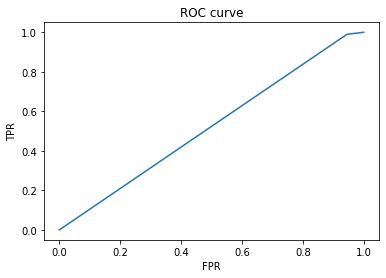

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.5222070184589295

# **Precision_Recall Curve**

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, y_pred)

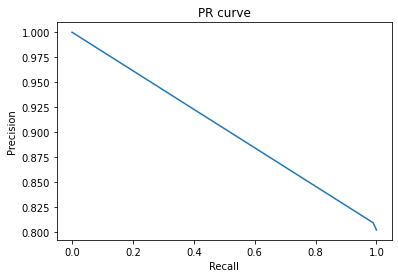

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.9037317484642655

# **Confusion Matrix**

In [ ]:
pd.DataFrame(confusion_matrix(y_test , y_pred) , columns = list(range(0,2)))

,0,1
0,864,14786
1,686,62870


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[  864, 14786],
       [  686, 62870]])

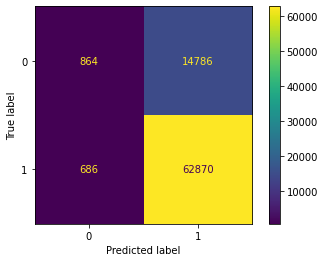

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
(np.diag(conf_matrix).sum() / conf_matrix.sum())*100

80.46612630356286

# **Classification Report**

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.56      0.06      0.10     15650
           1       0.81      0.99      0.89     63556

    accuracy                           0.80     79206
   macro avg       0.68      0.52      0.50     79206
weighted avg       0.76      0.80      0.73     79206



# **Insights**

**From describe function we can check unique value prents in categorical variables:-**

*   Purpose for loan has 14 unique category out of which "debt_consolidation" category is on top.
*   application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers. maximum loan applicant are Individuals

*   Address is unique for all the customer.
*   emp_length,title has large number of unique values.
*   The number of payments on the loan is maximum for 36 months
*   Maximum customer are from teacher profession who apply for loan.
emp_length unique value are 11 outoff which 10+length are maximum in number.
*   home_ownership is MORTGAGE for maximum customers.

*   Verification_status it has 3 unique value and maximum custome has their verfication_status as verified.
*   Loan_status Target variable has 2 unique value and maximum loan_status fall under Fully paid which is good sign of bussiness.















## **Questionnare**

### **1.**

In [ ]:
df["loan_status"].value_counts(normalize = True)

1    0.803871
0    0.196129
Name: loan_status, dtype: float64

**Note -**  80.39% of customers have fully paid their Loan Amount

### **2.**

In [ ]:
df["loan_amnt"].corr(df["installment"])

0.9539289082616194

**Note -** The correlation between Loan Amount and Installment features is Positive Cor-relation i.e. 95.4%

### **3.**

In [ ]:
df["home_ownership"].value_counts(normalize= True)

MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: home_ownership, dtype: float64

**Note -** The majority of people have home ownership as MORTGAGE

### **4.**

In [ ]:
df1 = df1[df1["loan_status"] == "Fully Paid"]

In [ ]:
df1["grade"].value_counts(normalize = True)

B    0.318608
C    0.262404
A    0.188942
D    0.141935
E    0.061952
F    0.021155
G    0.005004
Name: grade, dtype: float64

**Note -** People with grades ‘B’ are more likely to fully pay their loan

### **5.**

In [ ]:
df["emp_title"].value_counts(normalize = True)

Teacher                    0.011764
Manager                    0.011391
Registered Nurse           0.004974
RN                         0.004948
Supervisor                 0.004905
                             ...   
Postman                    0.000003
McCarthy & Holthus, LLC    0.000003
jp flooring                0.000003
Histology Technologist     0.000003
Gracon Services, Inc       0.000003
Name: emp_title, Length: 173105, dtype: float64

**Note -** The top 2 afforded job titles as :- Teacher and Manager

### **6.**

In [ ]:
print("ROC_AUC_score = " , roc_auc_score(y_test , y_pred))
print("Precision Score = " , precision_score(y_test , y_pred))
print("Recall Score = " , recall_score(y_test , y_pred))
print("F1 Score = " , f1_score(y_test , y_pred))

ROC_AUC_score =  0.5222070184589295
Precision Score =  0.8095961677140208
Recall Score =  0.9892063691862295
F1 Score =  0.8904342407160865


**Note -** We should focus on Recall Score 

### **7.**

In [ ]:
print("Precision Score = " , precision_score(y_test , y_pred))
print("Recall Score = " , recall_score(y_test , y_pred))

Precision Score =  0.8095961677140208
Recall Score =  0.9892063691862295


**Note -** The gap in precision and recall affect the bank at high rate

### **8.**

**Note -** Mostly all the features are heavily affected the outcome except title , emp_title , address

### **9.**

**Note -** No, the results will not be affected by geographical location.

# **Recommendation**

**Visual represntation of objective datatype variables and insights:-**

*   verification_status (Indicates if income was verified by LoanTap, not verified, or if the income source was verified) Maximum loan applicant status has varified but there is not as such much difference in the verified and non_verified loan applicant.
*   **loan_status (Current status of the loan - Target Variable) Fully Paid count is more than the charged off**.
*   initial_list_status (The initial listing status of the loan. Possible values are – W, F) initial_list_status is maximum for F than W.
*   application_type (Indicates whether the loan is an individual application or a joint application with two co-borrowers) maximum application_type is from individual category.


*   From count plot we can say 36 months tearm demand is more than 60 months term (term:-The number of payments on the loan. Values are in months and can be either 36 or 60)
*   grade(LoanTap assigned loan grade) maximum people count are from grade B and C.
*   sub_grade(LoanTap assigned loan subgrade) it is assign to each customer hence gives us complete sub_grade visualisation on count plot.
*   emp_length(Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years) maximum employee length is +10 years.
*   **home_ownership (The home ownership status provided by the borrower during registration or obtained from the credit report) The majority of people have home ownership as MORTGAGE**.









